In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ast import literal_eval
from collections import defaultdict

In [2]:
def get_results(interest_parameter, nmf_method):
    with open(f'Results/Register_{nmf_method}.txt', 'r', encoding='utf8') as file:
        # Definición de los diccionarios que ordenarán los resultados para cada 
        # parámetro 
        temp_corr_dict = defaultdict(list)
        spec_corr_dict = defaultdict(list)
        mse_dict = defaultdict(list)
        sdr_dict = defaultdict(list)

        for line in file:
            # Obteniendo el diccionario de interés
            dict_to_rev = literal_eval(line.strip())
            
            if not dict_to_rev['filter_parameters']['bool']:
                # Añadiendo información a los diccionarios en base a los criterios
                temp_corr_dict[dict_to_rev[interest_parameter]].extend(dict_to_rev['Temp'])
                spec_corr_dict[dict_to_rev[interest_parameter]].extend(dict_to_rev['Spec'])
                mse_dict[dict_to_rev[interest_parameter]].extend(dict_to_rev['MSE'])
                sdr_dict[dict_to_rev[interest_parameter]].extend(dict_to_rev['SDR'])
            
    return temp_corr_dict, spec_corr_dict, mse_dict, sdr_dict


def get_noverlap_results(nmf_method):
    # Tipos de noverlap
    nov_types = (0.5, 0.75, 0.9)
    
    with open(f'Results/Register_{nmf_method}.txt', 'r', encoding='utf8') as file:
        # Definición de los diccionarios que ordenarán los resultados para cada 
        # parámetro 
        temp_corr_dict = defaultdict(list)
        spec_corr_dict = defaultdict(list)
        mse_dict = defaultdict(list)
        sdr_dict = defaultdict(list)

        for line in file:
            # Obteniendo el diccionario de interés
            dict_to_rev = literal_eval(line.strip())
            
            # Obtención de la razón noverlap de esta simulación
            nov_i = dict_to_rev['noverlap'] / dict_to_rev['N']
            
            # Obteniendo el tipo de noverlap
            index = np.argmin([abs(nov_i - i) for i in nov_types])
            
            # Definiendo el tipo de noverlap usado
            used_nov = nov_types[index]
            
            if not dict_to_rev['filter_parameters']['bool']:
                # Añadiendo información a los diccionarios en base a los criterios
                temp_corr_dict[used_nov].extend(dict_to_rev['Temp'])
                spec_corr_dict[used_nov].extend(dict_to_rev['Spec'])
                mse_dict[used_nov].extend(dict_to_rev['MSE'])
                sdr_dict[used_nov].extend(dict_to_rev['SDR'])
            
    return temp_corr_dict, spec_corr_dict, mse_dict, sdr_dict


def get_filter_params_results(nmf_method):
    with open(f'Results/Register_{nmf_method}.txt', 'r', encoding='utf8') as file:
        # Definición de los diccionarios que ordenarán los resultados para cada 
        # parámetro 
        temp_corr_dict = defaultdict(list)
        spec_corr_dict = defaultdict(list)
        mse_dict = defaultdict(list)
        sdr_dict = defaultdict(list)

        for line in file:
            # Obteniendo el diccionario de interés
            dict_to_rev = literal_eval(line.strip())
            
            # Lectura del booleano de interés
            filter_params_i = dict_to_rev[interest_parameter]

            # Añadiendo información a los diccionarios en base a los criterios
            temp_corr_dict[filter_params_i['bool']].extend(dict_to_rev['Temp'])
            spec_corr_dict[filter_params_i['bool']].extend(dict_to_rev['Spec'])
            mse_dict[filter_params_i['bool']].extend(dict_to_rev['MSE'])
            sdr_dict[filter_params_i['bool']].extend(dict_to_rev['SDR'])
            
    return temp_corr_dict, spec_corr_dict, mse_dict, sdr_dict


def get_table_results(N, nov, dec_criteria, bool_filt, nmf_method):
    with open(f'Results/Register_{nmf_method}.txt', 'r', encoding='utf8') as file:
        # Definición de los diccionarios que ordenarán los resultados para cada 
        # parámetro 
        temp_corr_dict = defaultdict(list)
        spec_corr_dict = defaultdict(list)
        mse_dict = defaultdict(list)
        sdr_dict = defaultdict(list)

        for line in file:
            # Obteniendo el diccionario de interés
            dict_to_rev = literal_eval(line.strip())
            
            # Si es que cumple con la definición del análisis realizado
            if (dict_to_rev['N'] == N and dict_to_rev['noverlap'] == int(nov * N) and
                dict_to_rev['dec_criteria'] == dec_criteria and
                dict_to_rev['filter_parameters']['bool'] == bool_filt):
                # Definir la combinación beta/n_comps para guardar los datos
                index_to = (dict_to_rev['beta'], dict_to_rev['n_components'])
                
                # Añadiendo información a los diccionarios en base a los criterios
                temp_corr_dict[index_to].extend(dict_to_rev['Temp'])
                spec_corr_dict[index_to].extend(dict_to_rev['Spec'])
                mse_dict[index_to].extend(dict_to_rev['MSE'])
                sdr_dict[index_to].extend(dict_to_rev['SDR'])
            
    return temp_corr_dict, spec_corr_dict, mse_dict, sdr_dict

# Gráficos

# Parámetro N

In [3]:
interest_parameter = 'N'

temp_all, spec_all, mse_all, sdr_all = \
        get_results(interest_parameter, nmf_method='to_all')
temp_seg, spec_seg, mse_seg, sdr_seg = \
        get_results(interest_parameter, nmf_method='on_segments')
temp_mask, spec_mask, mse_mask, sdr_mask = \
        get_results(interest_parameter, nmf_method='masked_segments')
temp_repl, spec_repl, mse_repl, sdr_repl = \
        get_results(interest_parameter, nmf_method='replace_segments')

print(len(sdr_mask[512]))

2304


<IPython.core.display.Javascript object>


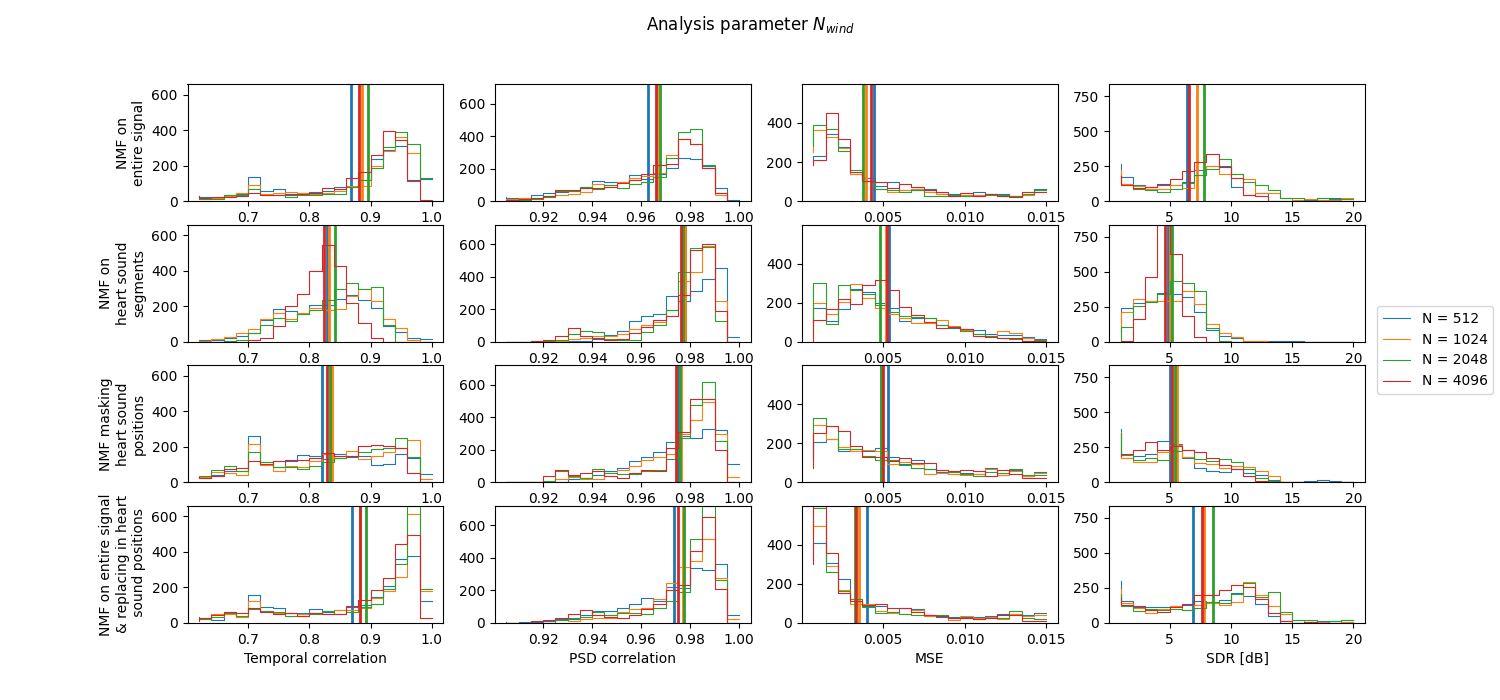

2304
2304
2304
2304


In [4]:
%matplotlib notebook
def hist_plots_N():
    fig, ax = plt.subplots(4,1, figsize=(9,7), sharex=False)

    # Temporal correlation
    sns.histplot(temp_all[512], bins=np.arange(0, 1.05, 0.025), color='green', 
                 edgecolor='green', fill=True, alpha=0.05, ax=ax[0], label=r'$N = 512$')
    sns.histplot(temp_all[1024], bins=np.arange(0, 1.05, 0.025), color='blue', 
                 edgecolor='blue', fill=True, alpha=0.05, ax=ax[0], label=r'$N = 1024$')
    sns.histplot(temp_all[2048], bins=np.arange(0, 1.05, 0.025), color='red', 
                 edgecolor='red', fill=True, alpha=0.05, ax=ax[0], label=r'$N = 2048$')
    sns.histplot(temp_all[4096], bins=np.arange(0, 1.05, 0.025), color='cyan', 
                 edgecolor='cyan', fill=True, alpha=0.05, ax=ax[0], label=r'$N = 4096$')

    sns.histplot(spec_all[512], bins=np.arange(0, 1.05, 0.025), color='green', 
                 edgecolor='green', fill=True, alpha=0.05, ax=ax[1], label=r'$N = 512$')
    sns.histplot(spec_all[1024], bins=np.arange(0, 1.05, 0.025), color='blue', 
                 edgecolor='blue', fill=True, alpha=0.05, ax=ax[1], label=r'$N = 1024$')
    sns.histplot(spec_all[2048], bins=np.arange(0, 1.05, 0.025), color='red', 
                 edgecolor='red', fill=True, alpha=0.05, ax=ax[1], label=r'$N = 2048$')
    sns.histplot(spec_all[4096], bins=np.arange(0, 1.05, 0.025), color='cyan', 
                 edgecolor='cyan', fill=True, alpha=0.05, ax=ax[1], label=r'$N = 4096$')

    sns.histplot(mse_all[512], bins=np.linspace(0, 0.03, 20), color='green', 
                 edgecolor='green', fill=True, alpha=0.05, ax=ax[2], label=r'$N = 512$')
    sns.histplot(mse_all[1024], bins=np.linspace(0, 0.03, 20), color='blue', 
                 edgecolor='blue', fill=True, alpha=0.05, ax=ax[2], label=r'$N = 1024$')
    sns.histplot(mse_all[2048], bins=np.linspace(0, 0.03, 20), color='red', 
                 edgecolor='red', fill=True, alpha=0.05, ax=ax[2], label=r'$N = 2048$')
    sns.histplot(mse_all[4096], bins=np.linspace(0, 0.03, 20), color='cyan', 
                 edgecolor='cyan', fill=True, alpha=0.05, ax=ax[2], label=r'$N = 4096$')

    sns.histplot(sdr_all[512], bins=20, color='green', 
                 edgecolor='green', fill=True, alpha=0.05, ax=ax[3], label=r'$N = 512$')
    sns.histplot(sdr_all[1024], bins=20, color='blue', 
                 edgecolor='blue', fill=True, alpha=0.05, ax=ax[3], label=r'$N = 1024$')
    sns.histplot(sdr_all[2048], bins=20, color='red', 
                 edgecolor='red', fill=True, alpha=0.05, ax=ax[3], label=r'$N = 2048$')
    sns.histplot(sdr_all[4096], bins=20, color='cyan', 
                 edgecolor='cyan', fill=True, alpha=0.05, ax=ax[3], label=r'$N = 4096$')

    # Seteando los ylabel
    ax[0].set_ylabel('Temporal\ncorrelation')
    ax[1].set_ylabel('Spectral\ncorrelation')
    ax[2].set_ylabel('MSE')
    ax[3].set_ylabel('SDR')

    # Seteando las leyendas
    ax[0].legend(loc='upper left')
    ax[1].legend(loc='upper left')
    ax[2].legend(loc='upper right')
    ax[3].legend(loc='upper right')


    # Ajustando las etiquetas del eje
    fig.align_ylabels(ax[:])
    # Quitando el espacio entre gráficos
    # fig.subplots_adjust(wspace=0.1, hspace=0)
    plt.show()
    

def density_plots_N():
    fig, ax = plt.subplots(3, 4, figsize=(15,7), sharex=False)

    #### NMF BASE ####
    sns.kdeplot(temp_all[512], color='C0', label=r'$N = 512$',
                 edgecolor='C0', fill=True, alpha=0.05, ax=ax[0][0])
    sns.kdeplot(temp_all[1024], color='C1', label=r'$N = 1024$',
                 edgecolor='C1', fill=True, alpha=0.05, ax=ax[0][0])
    sns.kdeplot(temp_all[2048], color='C2', label=r'$N = 2048$',
                 edgecolor='C2', fill=True, alpha=0.05, ax=ax[0][0])
    sns.kdeplot(temp_all[4096], color='C3', label=r'$N = 4096$',
                 edgecolor='C3', fill=True, alpha=0.05, ax=ax[0][0])

    sns.kdeplot(spec_all[512], color='C0', 
                 edgecolor='C0', fill=True, alpha=0.05, ax=ax[0][1])
    sns.kdeplot(spec_all[1024], color='C1',
                 edgecolor='C1', fill=True, alpha=0.05, ax=ax[0][1])
    sns.kdeplot(spec_all[2048], color='C2',
                 edgecolor='C2', fill=True, alpha=0.05, ax=ax[0][1])
    sns.kdeplot(spec_all[4096], color='C3',
                 edgecolor='C3', fill=True, alpha=0.05, ax=ax[0][1])

    sns.kdeplot(mse_all[512], color='C0', 
                 edgecolor='C0', fill=True, alpha=0.05, ax=ax[0][2])
    sns.kdeplot(mse_all[1024], color='C1',
                 edgecolor='C1', fill=True, alpha=0.05, ax=ax[0][2])
    sns.kdeplot(mse_all[2048], color='C2',
                 edgecolor='C2', fill=True, alpha=0.05, ax=ax[0][2])
    sns.kdeplot(mse_all[4096], color='C3',
                 edgecolor='C3', fill=True, alpha=0.05, ax=ax[0][2])

    sns.kdeplot(sdr_all[512], color='C0', 
                 edgecolor='C0', fill=True, alpha=0.05, ax=ax[0][3])
    sns.kdeplot(sdr_all[1024], color='C1',
                 edgecolor='C1', fill=True, alpha=0.05, ax=ax[0][3])
    sns.kdeplot(sdr_all[2048], color='C2',
                 edgecolor='C2', fill=True, alpha=0.05, ax=ax[0][3])
    sns.kdeplot(sdr_all[4096], color='C3',
                 edgecolor='C3', fill=True, alpha=0.05, ax=ax[0][3])

    #### NMF on segments ####
    sns.kdeplot(temp_seg[512], color='C0', 
                 edgecolor='C0', fill=True, alpha=0.05, ax=ax[1][0])
    sns.kdeplot(temp_seg[1024], color='C1',
                 edgecolor='C1', fill=True, alpha=0.05, ax=ax[1][0])
    sns.kdeplot(temp_seg[2048], color='C2',
                 edgecolor='C2', fill=True, alpha=0.05, ax=ax[1][0])
    sns.kdeplot(temp_seg[4096], color='C3',
                 edgecolor='C3', fill=True, alpha=0.05, ax=ax[1][0])

    sns.kdeplot(spec_seg[512], color='C0', 
                 edgecolor='C0', fill=True, alpha=0.05, ax=ax[1][1])
    sns.kdeplot(spec_seg[1024], color='C1',
                 edgecolor='C1', fill=True, alpha=0.05, ax=ax[1][1])
    sns.kdeplot(spec_seg[2048], color='C2',
                 edgecolor='C2', fill=True, alpha=0.05, ax=ax[1][1])
    sns.kdeplot(spec_seg[4096], color='C3',
                 edgecolor='C3', fill=True, alpha=0.05, ax=ax[1][1])

    sns.kdeplot(mse_seg[512], color='C0', 
                 edgecolor='C0', fill=True, alpha=0.05, ax=ax[1][2])
    sns.kdeplot(mse_seg[1024], color='C1',
                 edgecolor='C1', fill=True, alpha=0.05, ax=ax[1][2])
    sns.kdeplot(mse_seg[2048], color='C2',
                 edgecolor='C2', fill=True, alpha=0.05, ax=ax[1][2])
    sns.kdeplot(mse_seg[4096], color='C3',
                 edgecolor='C3', fill=True, alpha=0.05, ax=ax[1][2])

    sns.kdeplot(sdr_seg[512], color='C0', 
                 edgecolor='C0', fill=True, alpha=0.05, ax=ax[1][3])
    sns.kdeplot(sdr_seg[1024], color='C1',
                 edgecolor='C1', fill=True, alpha=0.05, ax=ax[1][3])
    sns.kdeplot(sdr_seg[2048], color='C2',
                 edgecolor='C2', fill=True, alpha=0.05, ax=ax[1][3])
    sns.kdeplot(sdr_seg[4096], color='C3',
                 edgecolor='C3', fill=True, alpha=0.05, ax=ax[1][3])

    #### NMF masked segments ####
    sns.kdeplot(temp_mask[512], color='C0', 
                 edgecolor='C0', fill=True, alpha=0.05, ax=ax[2][0])
    sns.kdeplot(temp_mask[1024], color='C1',
                 edgecolor='C1', fill=True, alpha=0.05, ax=ax[2][0])
    sns.kdeplot(temp_mask[2048], color='C2',
                 edgecolor='C2', fill=True, alpha=0.05, ax=ax[2][0])
    sns.kdeplot(temp_mask[4096], color='C3',
                 edgecolor='C3', fill=True, alpha=0.05, ax=ax[2][0])

    sns.kdeplot(spec_mask[512], color='C0', 
                 edgecolor='C0', fill=True, alpha=0.05, ax=ax[2][1])
    sns.kdeplot(spec_mask[1024], color='C1',
                 edgecolor='C1', fill=True, alpha=0.05, ax=ax[2][1])
    sns.kdeplot(spec_mask[2048], color='C2',
                 edgecolor='C2', fill=True, alpha=0.05, ax=ax[2][1])
    sns.kdeplot(spec_mask[4096], color='C3',
                 edgecolor='C3', fill=True, alpha=0.05, ax=ax[2][1])

    sns.kdeplot(mse_mask[512], color='C0', 
                 edgecolor='C0', fill=True, alpha=0.05, ax=ax[2][2])
    sns.kdeplot(mse_mask[1024], color='C1',
                 edgecolor='C1', fill=True, alpha=0.05, ax=ax[2][2])
    sns.kdeplot(mse_mask[2048], color='C2',
                 edgecolor='C2', fill=True, alpha=0.05, ax=ax[2][2])
    sns.kdeplot(mse_mask[4096], color='C3',
                 edgecolor='C3', fill=True, alpha=0.05, ax=ax[2][2])

    sns.kdeplot(sdr_mask[512], color='C0', 
                 edgecolor='C0', fill=True, alpha=0.05, ax=ax[2][3])
    sns.kdeplot(sdr_mask[1024], color='C1',
                 edgecolor='C1', fill=True, alpha=0.05, ax=ax[2][3])
    sns.kdeplot(sdr_mask[2048], color='C2',
                 edgecolor='C2', fill=True, alpha=0.05, ax=ax[2][3])
    sns.kdeplot(sdr_mask[4096], color='C3',
                 edgecolor='C3', fill=True, alpha=0.05, ax=ax[2][3])



    # Seteando los ylabel
    ax[0][0].set_ylabel('NMF\nbase')
    ax[0][1].set_ylabel('')
    ax[0][2].set_ylabel('')
    ax[0][3].set_ylabel('')
    ax[1][0].set_ylabel('NMF on\nsegments')
    ax[1][1].set_ylabel('')
    ax[1][2].set_ylabel('')
    ax[1][3].set_ylabel('')
    ax[2][0].set_ylabel('NMF masked\nsegments')
    ax[2][1].set_ylabel('')
    ax[2][2].set_ylabel('')
    ax[2][3].set_ylabel('')

    # Seteando los títulos
    ax[2][0].set_xlabel('Temporal\ncorrelation')
    ax[2][1].set_xlabel('Spectral\ncorrelation')
    ax[2][2].set_xlabel('MSE')
    ax[2][3].set_xlabel('SDR')

    # Seteando las leyendas
    fig.legend(loc='center right')

    # Ajustando los límites
    ax[0][0].set_xlim([0.3, 1.1])
    ax[1][0].set_xlim([0.3, 1.1])
    ax[2][0].set_xlim([0.3, 1.1])

    ax[0][1].set_xlim([0.7, 1.03])
    ax[1][1].set_xlim([0.7, 1.03])
    ax[2][1].set_xlim([0.7, 1.03])

    ax[0][2].set_xlim([-0.006, 0.035])
    ax[1][2].set_xlim([-0.006, 0.035])
    ax[2][2].set_xlim([-0.006, 0.035])

    ax[0][3].set_xlim([-5, 25])
    ax[1][3].set_xlim([-5, 25])
    ax[2][3].set_xlim([-5, 25])

    # Ajustando las etiquetas del eje
    fig.align_ylabels(ax[:])
    fig.subplots_adjust(right=0.85)
    # Quitando el espacio entre gráficos
#     fig.subplots_adjust(wspace=0.1, hspace=0.1)
    plt.show()


def density_plots_N_nofill():
    fig, ax = plt.subplots(3, 4, figsize=(9,7), sharex=False)

    #### NMF BASE ####
    sns.kdeplot(temp_all[512], color='C0', label=r'$N = 512$',
                fill=False, alpha=0.05, ax=ax[0][0])
    sns.kdeplot(temp_all[1024], color='C1', label=r'$N = 1024$',
                fill=False, alpha=0.05, ax=ax[0][0])
    sns.kdeplot(temp_all[2048], color='C2', label=r'$N = 2048$',
                fill=False, alpha=0.05, ax=ax[0][0])
    sns.kdeplot(temp_all[4096], color='C3', label=r'$N = 4096$',
                fill=False, alpha=0.05, ax=ax[0][0])

    sns.kdeplot(spec_all[512], color='C0', 
                fill=False, alpha=0.05, ax=ax[0][1])
    sns.kdeplot(spec_all[1024], color='C1',
                fill=False, alpha=0.05, ax=ax[0][1])
    sns.kdeplot(spec_all[2048], color='C2',
                fill=False, alpha=0.05, ax=ax[0][1])
    sns.kdeplot(spec_all[4096], color='C3',
                fill=False, alpha=0.05, ax=ax[0][1])

    sns.kdeplot(mse_all[512], color='C0', 
                fill=False, alpha=0.05, ax=ax[0][2])
    sns.kdeplot(mse_all[1024], color='C1',
                fill=False, alpha=0.05, ax=ax[0][2])
    sns.kdeplot(mse_all[2048], color='C2',
                fill=False, alpha=0.05, ax=ax[0][2])
    sns.kdeplot(mse_all[4096], color='C3',
                fill=False, alpha=0.05, ax=ax[0][2])

    sns.kdeplot(sdr_all[512], color='C0', 
                fill=False, alpha=0.05, ax=ax[0][3])
    sns.kdeplot(sdr_all[1024], color='C1',
                fill=False, alpha=0.05, ax=ax[0][3])
    sns.kdeplot(sdr_all[2048], color='C2',
                fill=False, alpha=0.05, ax=ax[0][3])
    sns.kdeplot(sdr_all[4096], color='C3',
                fill=False, alpha=0.05, ax=ax[0][3])

    #### NMF on segments ####
    sns.kdeplot(temp_seg[512], color='C0', 
                fill=False, alpha=0.05, ax=ax[1][0])
    sns.kdeplot(temp_seg[1024], color='C1',
                fill=False, alpha=0.05, ax=ax[1][0])
    sns.kdeplot(temp_seg[2048], color='C2',
                fill=False, alpha=0.05, ax=ax[1][0])
    sns.kdeplot(temp_seg[4096], color='C3',
                fill=False, alpha=0.05, ax=ax[1][0])

    sns.kdeplot(spec_seg[512], color='C0', 
                fill=False, alpha=0.05, ax=ax[1][1])
    sns.kdeplot(spec_seg[1024], color='C1',
                fill=False, alpha=0.05, ax=ax[1][1])
    sns.kdeplot(spec_seg[2048], color='C2',
                fill=False, alpha=0.05, ax=ax[1][1])
    sns.kdeplot(spec_seg[4096], color='C3',
                fill=False, alpha=0.05, ax=ax[1][1])

    sns.kdeplot(mse_seg[512], color='C0', 
                fill=False, alpha=0.05, ax=ax[1][2])
    sns.kdeplot(mse_seg[1024], color='C1',
                fill=False, alpha=0.05, ax=ax[1][2])
    sns.kdeplot(mse_seg[2048], color='C2',
                fill=False, alpha=0.05, ax=ax[1][2])
    sns.kdeplot(mse_seg[4096], color='C3',
                fill=False, alpha=0.05, ax=ax[1][2])

    sns.kdeplot(sdr_seg[512], color='C0', 
                fill=False, alpha=0.05, ax=ax[1][3])
    sns.kdeplot(sdr_seg[1024], color='C1',
                fill=False, alpha=0.05, ax=ax[1][3])
    sns.kdeplot(sdr_seg[2048], color='C2',
                fill=False, alpha=0.05, ax=ax[1][3])
    sns.kdeplot(sdr_seg[4096], color='C3',
                fill=False, alpha=0.05, ax=ax[1][3])

    #### NMF masked segments ####
    sns.kdeplot(temp_mask[512], color='C0', 
                fill=False, alpha=0.05, ax=ax[2][0])
    sns.kdeplot(temp_mask[1024], color='C1',
                fill=False, alpha=0.05, ax=ax[2][0])
    sns.kdeplot(temp_mask[2048], color='C2',
                fill=False, alpha=0.05, ax=ax[2][0])
    sns.kdeplot(temp_mask[4096], color='C3',
                fill=False, alpha=0.05, ax=ax[2][0])

    sns.kdeplot(spec_mask[512], color='C0', 
                fill=False, alpha=0.05, ax=ax[2][1])
    sns.kdeplot(spec_mask[1024], color='C1',
                fill=False, alpha=0.05, ax=ax[2][1])
    sns.kdeplot(spec_mask[2048], color='C2',
                fill=False, alpha=0.05, ax=ax[2][1])
    sns.kdeplot(spec_mask[4096], color='C3',
                fill=False, alpha=0.05, ax=ax[2][1])

    sns.kdeplot(mse_mask[512], color='C0', 
                fill=False, alpha=0.05, ax=ax[2][2])
    sns.kdeplot(mse_mask[1024], color='C1',
                fill=False, alpha=0.05, ax=ax[2][2])
    sns.kdeplot(mse_mask[2048], color='C2',
                fill=False, alpha=0.05, ax=ax[2][2])
    sns.kdeplot(mse_mask[4096], color='C3',
                fill=False, alpha=0.05, ax=ax[2][2])

    sns.kdeplot(sdr_mask[512], color='C0', 
                fill=False, alpha=0.05, ax=ax[2][3])
    sns.kdeplot(sdr_mask[1024], color='C1',
                fill=False, alpha=0.05, ax=ax[2][3])
    sns.kdeplot(sdr_mask[2048], color='C2',
                fill=False, alpha=0.05, ax=ax[2][3])
    sns.kdeplot(sdr_mask[4096], color='C3',
                fill=False, alpha=0.05, ax=ax[2][3])



    # Seteando los ylabel
    ax[0][0].set_ylabel('NMF\nbase')
    ax[0][1].set_ylabel('')
    ax[0][2].set_ylabel('')
    ax[0][3].set_ylabel('')
    ax[1][0].set_ylabel('NMF on\nsegments')
    ax[1][1].set_ylabel('')
    ax[1][2].set_ylabel('')
    ax[1][3].set_ylabel('')
    ax[2][0].set_ylabel('NMF masked\nsegments')
    ax[2][1].set_ylabel('')
    ax[2][2].set_ylabel('')
    ax[2][3].set_ylabel('')

    # Seteando los títulos
    ax[2][0].set_xlabel('Temporal\ncorrelation')
    ax[2][1].set_xlabel('Spectral\ncorrelation')
    ax[2][2].set_xlabel('MSE')
    ax[2][3].set_xlabel('SDR')

    # Seteando las leyendas
    fig.legend(loc='center right')

    # Ajustando los límites
    ax[0][0].set_xlim([0.3, 1.1])
    ax[1][0].set_xlim([0.3, 1.1])
    ax[2][0].set_xlim([0.3, 1.1])
    ax[0][0].set_ylim([0, 12])
    ax[1][0].set_ylim([0, 12])
    ax[2][0].set_ylim([0, 12])

    ax[0][1].set_xlim([0.7, 1.03])
    ax[1][1].set_xlim([0.7, 1.03])
    ax[2][1].set_xlim([0.7, 1.03])
    ax[0][1].set_ylim([0, 50])
    ax[1][1].set_ylim([0, 50])
    ax[2][1].set_ylim([0, 50])

    ax[0][2].set_xlim([-0.006, 0.035])
    ax[1][2].set_xlim([-0.006, 0.035])
    ax[2][2].set_xlim([-0.006, 0.035])
    ax[0][2].set_ylim([0, 170])
    ax[1][2].set_ylim([0, 170])
    ax[2][2].set_ylim([0, 170])

    ax[0][3].set_xlim([-5, 25])
    ax[1][3].set_xlim([-5, 25])
    ax[2][3].set_xlim([-5, 25])
    ax[0][3].set_ylim([0, 0.4])
    ax[1][3].set_ylim([0, 0.4])
    ax[2][3].set_ylim([0, 0.4])

    # Ajustando las etiquetas del eje
    fig.align_ylabels(ax[:])
    fig.subplots_adjust(right=0.91)
    fig.suptitle(r'Análisis de métricas parámetro $N_{wind}$')
    
#     plt.savefig('Images/N_analysis.pdf', transparent=True)
    plt.show()
    

def hist_plots_N(fig, ax, bins=40, linewidth=1):
    def _plot_hist(num, input_array, bins, axs, interval=None, label=None):
        hist, bin_edges = np.histogram(a=input_array, bins=bins, range=interval)
        bins_plot = [np.mean(bin_edges[i:i+2]) for i in range(len(bin_edges) - 1)]
        
        if label is None:
            axs.plot(bins_plot, hist, color=f'C{num}', linewidth=linewidth)
        else:
            axs.plot(bins_plot, hist, color=f'C{num}', label=label, linewidth=linewidth)
        
        return hist
    
    # Definición de las posibilidades de N
    N_list = (512, 1024, 2048, 4096)
    
    # Definición del límite máximo x para MSE y SDR
    max_mse_x_list = list()
    max_sdr_x_list = list()
    
    for N in N_list:
        max_mse_x_list.append(max(mse_all[N]))
        max_mse_x_list.append(max(mse_seg[N]))
        max_mse_x_list.append(max(mse_mask[N]))
        max_mse_x_list.append(max(mse_repl[N]))
        
        max_sdr_x_list.append(max(sdr_all[N]))
        max_sdr_x_list.append(max(sdr_seg[N]))
        max_sdr_x_list.append(max(sdr_mask[N]))
        max_sdr_x_list.append(max(sdr_repl[N]))
    
    max_mse_x = max(max_mse_x_list)
    max_sdr_x = max(max_sdr_x_list)
    
    # Definición del límite máximo y
    max_temp_y = 0
    max_spec_y = 0
    max_mse_y = 0
    max_sdr_y = 0
    
    # Lista para cada uno de los histogramas a realizar
    hist_dict = defaultdict(list)
    
    # Temporal correlation
    for num, N in enumerate(N_list):
        ####      Obtener los histogramas      ####
        # to_all
        hist_temp_all = _plot_hist(num, temp_all[N], bins=bins, axs=ax[0][0], interval=(0,1), 
                                   label=f'N = {N}')
        hist_spec_all = _plot_hist(num, spec_all[N], bins=bins, axs=ax[0][1], interval=(0,1))
        hist_mse_all = _plot_hist(num, mse_all[N], bins=bins, axs=ax[0][2], interval=(0, max_mse_x))
        hist_sdr_all = _plot_hist(num, sdr_all[N], bins=bins, axs=ax[0][3], interval=(0, max_sdr_x))
        
        # on_segments
        hist_temp_seg = _plot_hist(num, temp_seg[N], bins=bins, axs=ax[1][0], interval=(0,1))
        hist_spec_seg = _plot_hist(num, spec_seg[N], bins=bins, axs=ax[1][1], interval=(0,1))
        hist_mse_seg = _plot_hist(num, mse_seg[N], bins=bins, axs=ax[1][2], interval=(0, max_mse_x))
        hist_sdr_seg = _plot_hist(num, sdr_seg[N], bins=bins, axs=ax[1][3], interval=(0, max_sdr_x))
        
        # masked_segments
        hist_temp_mask = _plot_hist(num, temp_mask[N], bins=bins, axs=ax[2][0], interval=(0,1))
        hist_spec_mask = _plot_hist(num, spec_mask[N], bins=bins, axs=ax[2][1], interval=(0,1))
        hist_mse_mask = _plot_hist(num, mse_mask[N], bins=bins, axs=ax[2][2], interval=(0, max_mse_x))
        hist_sdr_mask = _plot_hist(num, sdr_mask[N], bins=bins, axs=ax[2][3], interval=(0, max_sdr_x))
        
        # replaced_segments
        hist_temp_repl = _plot_hist(num, temp_repl[N], bins=bins, axs=ax[3][0], interval=(0,1))
        hist_spec_repl = _plot_hist(num, spec_repl[N], bins=bins, axs=ax[3][1], interval=(0,1))
        hist_mse_repl = _plot_hist(num, mse_repl[N], bins=bins, axs=ax[3][2], interval=(0, max_mse_x))
        hist_sdr_repl = _plot_hist(num, sdr_repl[N], bins=bins, axs=ax[3][3], interval=(0, max_sdr_x))
        
        # Máximos para los límites de los ejes y
        max_temp_y = max(max_temp_y, max(hist_temp_all), 
                         max(hist_temp_seg), max(hist_temp_mask),
                         max(hist_temp_repl)) 
        max_spec_y = max(max_spec_y, max(hist_spec_all), 
                         max(hist_spec_seg), max(hist_spec_mask),
                         max(hist_spec_repl))
        max_mse_y = max(max_mse_y, max(hist_mse_all), 
                        max(hist_mse_seg), max(hist_mse_mask),
                        max(hist_mse_repl))
        max_sdr_y = max(max_sdr_y, max(hist_sdr_all), 
                        max(hist_sdr_seg), max(hist_sdr_mask),
                        max(hist_sdr_repl))
        
        # Lista para cada uno de los histogramas a realizar
        hist_dict[(0, 0)].append(hist_temp_all)
        hist_dict[(0, 1)].append(hist_spec_all)
        hist_dict[(0, 2)].append(hist_mse_all)
        hist_dict[(0, 3)].append(hist_sdr_all)
        hist_dict[(1, 0)].append(hist_temp_seg)
        hist_dict[(1, 1)].append(hist_spec_seg)
        hist_dict[(1, 2)].append(hist_mse_seg)
        hist_dict[(1, 3)].append(hist_sdr_seg)
        hist_dict[(2, 0)].append(hist_temp_mask)
        hist_dict[(2, 1)].append(hist_spec_mask)
        hist_dict[(2, 2)].append(hist_mse_mask)
        hist_dict[(2, 3)].append(hist_sdr_mask)
        hist_dict[(3, 0)].append(hist_temp_repl)
        hist_dict[(3, 1)].append(hist_spec_repl)
        hist_dict[(3, 2)].append(hist_mse_repl)
        hist_dict[(3, 3)].append(hist_sdr_repl)
    
    for key in hist_dict.keys():
        # Obtener los índices de los máximos por cada bin
        max_indices = np.argmax(hist_dict[key], axis=0)
        
        # Definición de los bordes de los bins
        if key[1] == 2:
            bin_edges = np.linspace(0, max_mse_x, bins + 1)
        elif key[1] == 3:
            bin_edges = np.linspace(0, max_sdr_x, bins + 1)
        else:
            bin_edges = np.linspace(0, 1, bins + 1)
            
        for i in range(bins):
            ax[key[0], key[1]].axvspan(bin_edges[i], bin_edges[i + 1], 
                                       color=f'C{max_indices[i]}', alpha=0.1)
        
    # Seteando los ylabel
    ax[0][0].set_ylabel('NMF\nbase')
    ax[0][1].set_ylabel('')
    ax[0][2].set_ylabel('')
    ax[0][3].set_ylabel('')
    ax[1][0].set_ylabel('NMF on\nsegments')
    ax[1][1].set_ylabel('')
    ax[1][2].set_ylabel('')
    ax[1][3].set_ylabel('')
    ax[2][0].set_ylabel('NMF masked\nsegments')
    ax[2][1].set_ylabel('')
    ax[2][2].set_ylabel('')
    ax[2][3].set_ylabel('')
    ax[3][0].set_ylabel('NMF replaced\nsegments')
    ax[3][1].set_ylabel('')
    ax[3][2].set_ylabel('')
    ax[3][3].set_ylabel('')

    # Seteando los títulos
    ax[3][0].set_xlabel('Temporal\ncorrelation')
    ax[3][1].set_xlabel('Spectral\ncorrelation')
    ax[3][2].set_xlabel('MSE')
    ax[3][3].set_xlabel('SDR')

    # Seteando las leyendas
    fig.legend(loc='center right')
    
    # Ajustando los límites
    ax[0][0].set_ylim([0, max_temp_y])
    ax[1][0].set_ylim([0, max_temp_y])
    ax[2][0].set_ylim([0, max_temp_y])
    ax[3][0].set_ylim([0, max_temp_y])

    ax[0][1].set_ylim([0, max_spec_y])
    ax[1][1].set_ylim([0, max_spec_y])
    ax[2][1].set_ylim([0, max_spec_y])
    ax[3][1].set_ylim([0, max_spec_y])

    ax[0][2].set_ylim([0, max_mse_y])
    ax[1][2].set_ylim([0, max_mse_y])
    ax[2][2].set_ylim([0, max_mse_y])
    ax[3][2].set_ylim([0, max_mse_y])

    ax[0][3].set_ylim([0, max_sdr_y])
    ax[1][3].set_ylim([0, max_sdr_y])
    ax[2][3].set_ylim([0, max_sdr_y])
    ax[3][3].set_ylim([0, max_sdr_y])

    # Ajustando las etiquetas del eje
    fig.align_ylabels(ax[:])
    fig.subplots_adjust(right=0.91)
    fig.suptitle(r'Analysis parameter $N_{wind}$')
    
    plt.savefig('Images/N_analysis.pdf', transparent=True)
    plt.show()


def hist_plots_N_spa(fig, ax, bins=40, linewidth=1):
    def _plot_hist(num, input_array, bins, axs, interval=None, label=None):
        hist, bin_edges = np.histogram(a=input_array, bins=bins, range=interval)
        bins_plot = [np.mean(bin_edges[i:i+2]) for i in range(len(bin_edges) - 1)]
        
        if label is None:
            axs.plot(bins_plot, hist, color=f'C{num}', linewidth=linewidth)
        else:
            axs.plot(bins_plot, hist, color=f'C{num}', label=label, linewidth=linewidth)
        
        return hist

    
    # Definición de las posibilidades de N
    N_list = (512, 1024, 2048, 4096)
    
    # Definición del límite máximo x para MSE y SDR
    max_mse_x_list = list()
    max_sdr_x_list = list()
    
    for N in N_list:
        max_mse_x_list.append(max(mse_all[N]))
        max_mse_x_list.append(max(mse_seg[N]))
        max_mse_x_list.append(max(mse_mask[N]))
        max_mse_x_list.append(max(mse_repl[N]))
        
        max_sdr_x_list.append(max(sdr_all[N]))
        max_sdr_x_list.append(max(sdr_seg[N]))
        max_sdr_x_list.append(max(sdr_mask[N]))
        max_sdr_x_list.append(max(sdr_repl[N]))
    
    max_mse_x = max(max_mse_x_list)
    max_sdr_x = max(max_sdr_x_list)
    
    # Definición del límite máximo y
    max_temp_y = 0
    max_spec_y = 0
    max_mse_y = 0
    max_sdr_y = 0
    
    # Lista para cada uno de los histogramas a realizar
    hist_dict = defaultdict(list)
    
    # Temporal correlation
    for num, N in enumerate(N_list):
        ####      Obtener los histogramas      ####
        # to_all
        hist_temp_all = _plot_hist(num, temp_all[N], bins=bins, axs=ax[0][0], interval=(0,1), 
                                   label=f'N = {N}')
        hist_spec_all = _plot_hist(num, spec_all[N], bins=bins, axs=ax[0][1], interval=(0,1))
        hist_mse_all = _plot_hist(num, mse_all[N], bins=bins, axs=ax[0][2], interval=(0, max_mse_x))
        hist_sdr_all = _plot_hist(num, sdr_all[N], bins=bins, axs=ax[0][3], interval=(0, max_sdr_x))
        
        # on_segments
        hist_temp_seg = _plot_hist(num, temp_seg[N], bins=bins, axs=ax[1][0], interval=(0,1))
        hist_spec_seg = _plot_hist(num, spec_seg[N], bins=bins, axs=ax[1][1], interval=(0,1))
        hist_mse_seg = _plot_hist(num, mse_seg[N], bins=bins, axs=ax[1][2], interval=(0, max_mse_x))
        hist_sdr_seg = _plot_hist(num, sdr_seg[N], bins=bins, axs=ax[1][3], interval=(0, max_sdr_x))
        
        # masked_segments
        hist_temp_mask = _plot_hist(num, temp_mask[N], bins=bins, axs=ax[2][0], interval=(0,1))
        hist_spec_mask = _plot_hist(num, spec_mask[N], bins=bins, axs=ax[2][1], interval=(0,1))
        hist_mse_mask = _plot_hist(num, mse_mask[N], bins=bins, axs=ax[2][2], interval=(0, max_mse_x))
        hist_sdr_mask = _plot_hist(num, sdr_mask[N], bins=bins, axs=ax[2][3], interval=(0, max_sdr_x))
        
        # replaced_segments
        hist_temp_repl = _plot_hist(num, temp_repl[N], bins=bins, axs=ax[3][0], interval=(0,1))
        hist_spec_repl = _plot_hist(num, spec_repl[N], bins=bins, axs=ax[3][1], interval=(0,1))
        hist_mse_repl = _plot_hist(num, mse_repl[N], bins=bins, axs=ax[3][2], interval=(0, max_mse_x))
        hist_sdr_repl = _plot_hist(num, sdr_repl[N], bins=bins, axs=ax[3][3], interval=(0, max_sdr_x))
        
        # Máximos para los límites de los ejes y
        max_temp_y = max(max_temp_y, max(hist_temp_all), 
                         max(hist_temp_seg), max(hist_temp_mask),
                         max(hist_temp_repl)) 
        max_spec_y = max(max_spec_y, max(hist_spec_all), 
                         max(hist_spec_seg), max(hist_spec_mask),
                         max(hist_spec_repl))
        max_mse_y = max(max_mse_y, max(hist_mse_all), 
                        max(hist_mse_seg), max(hist_mse_mask),
                        max(hist_mse_repl))
        max_sdr_y = max(max_sdr_y, max(hist_sdr_all), 
                        max(hist_sdr_seg), max(hist_sdr_mask),
                        max(hist_sdr_repl))
        
        # Lista para cada uno de los histogramas a realizar
        hist_dict[(0, 0)].append(hist_temp_all)
        hist_dict[(0, 1)].append(hist_spec_all)
        hist_dict[(0, 2)].append(hist_mse_all)
        hist_dict[(0, 3)].append(hist_sdr_all)
        hist_dict[(1, 0)].append(hist_temp_seg)
        hist_dict[(1, 1)].append(hist_spec_seg)
        hist_dict[(1, 2)].append(hist_mse_seg)
        hist_dict[(1, 3)].append(hist_sdr_seg)
        hist_dict[(2, 0)].append(hist_temp_mask)
        hist_dict[(2, 1)].append(hist_spec_mask)
        hist_dict[(2, 2)].append(hist_mse_mask)
        hist_dict[(2, 3)].append(hist_sdr_mask)
        hist_dict[(3, 0)].append(hist_temp_repl)
        hist_dict[(3, 1)].append(hist_spec_repl)
        hist_dict[(3, 2)].append(hist_mse_repl)
        hist_dict[(3, 3)].append(hist_sdr_repl)
    
    for key in hist_dict.keys():
        # Obtener los índices de los máximos por cada bin
        max_indices = np.argmax(hist_dict[key], axis=0)
        
        # Definición de los bordes de los bins
        if key[1] == 2:
            bin_edges = np.linspace(0, max_mse_x, bins + 1)
        elif key[1] == 3:
            bin_edges = np.linspace(0, max_sdr_x, bins + 1)
        else:
            bin_edges = np.linspace(0, 1, bins + 1)
            
        for i in range(bins):
            ax[key[0], key[1]].axvspan(bin_edges[i], bin_edges[i + 1], 
                                       color=f'C{max_indices[i]}', alpha=0.1)
        
    # Seteando los ylabel
    ax[0][0].set_ylabel('NMF\nbase')
    ax[0][1].set_ylabel('')
    ax[0][2].set_ylabel('')
    ax[0][3].set_ylabel('')
    ax[1][0].set_ylabel('NMF sobre\nsegmentos')
    ax[1][1].set_ylabel('')
    ax[1][2].set_ylabel('')
    ax[1][3].set_ylabel('')
    ax[2][0].set_ylabel('NMF sobre\nseñal enmascarada')
    ax[2][1].set_ylabel('')
    ax[2][2].set_ylabel('')
    ax[2][3].set_ylabel('')
    ax[3][0].set_ylabel('NMF reemplazando\nsegmentos')
    ax[3][1].set_ylabel('')
    ax[3][2].set_ylabel('')
    ax[3][3].set_ylabel('')

    # Seteando los títulos
    ax[3][0].set_xlabel('Correlación\ntemporal')
    ax[3][1].set_xlabel('Correlación\nespectral')
    ax[3][2].set_xlabel('MSE')
    ax[3][3].set_xlabel('SDR')

    # Seteando las leyendas
    fig.legend(loc='center right')
    
    # Ajustando los límites
    ax[0][0].set_ylim([0, max_temp_y])
    ax[1][0].set_ylim([0, max_temp_y])
    ax[2][0].set_ylim([0, max_temp_y])
    ax[3][0].set_ylim([0, max_temp_y])

    ax[0][1].set_ylim([0, max_spec_y])
    ax[1][1].set_ylim([0, max_spec_y])
    ax[2][1].set_ylim([0, max_spec_y])
    ax[3][1].set_ylim([0, max_spec_y])

    ax[0][2].set_ylim([0, max_mse_y])
    ax[1][2].set_ylim([0, max_mse_y])
    ax[2][2].set_ylim([0, max_mse_y])
    ax[3][2].set_ylim([0, max_mse_y])

    ax[0][3].set_ylim([0, max_sdr_y])
    ax[1][3].set_ylim([0, max_sdr_y])
    ax[2][3].set_ylim([0, max_sdr_y])
    ax[3][3].set_ylim([0, max_sdr_y])

    # Ajustando las etiquetas del eje
    fig.align_ylabels(ax[:])
    fig.subplots_adjust(right=0.91)
    fig.suptitle(r'Análisis parámetro $N_{wind}$')
    
    plt.savefig('Images/N_analysis_SPA.pdf', transparent=True)
    plt.show() 
    
    
def boxplots_N(fig, ax):
    def _plot_hist(num, input_array, bins, axs, interval=None, label=None):
        hist, bin_edges = np.histogram(a=input_array, bins=bins, range=interval)
        bins_plot = [np.mean(bin_edges[i:i+2]) for i in range(len(bin_edges) - 1)]
        
        if label is None:
            axs.plot(bins_plot, hist, color=f'C{num}')
        else:
            axs.plot(bins_plot, hist, color=f'C{num}', label=label)
        
        return hist
    
    # Definición de las posibilidades de N
    N_list = (512, 1024, 2048, 4096)
    
    # Definición del límite máximo x para MSE y SDR
#     max_mse_x_list = list()
#     max_sdr_x_list = list()
    
#     for N in N_list:
#         max_mse_x_list.append(max(mse_all[N]))
#         max_mse_x_list.append(max(mse_seg[N]))
#         max_mse_x_list.append(max(mse_mask[N]))
#         max_mse_x_list.append(max(mse_repl[N]))
        
#         max_sdr_x_list.append(max(sdr_all[N]))
#         max_sdr_x_list.append(max(sdr_seg[N]))
#         max_sdr_x_list.append(max(sdr_mask[N]))
#         max_sdr_x_list.append(max(sdr_repl[N]))
    
#     max_mse_x = max(max_mse_x_list)
#     max_sdr_x = max(max_sdr_x_list)
    
    # Definición del límite máximo y
    max_temp_y = 0
    max_spec_y = 0
    max_mse_y = 0
    max_sdr_y = 0
    
    colors = ['C0', 'C1', 'C2', 'C3']
    
    
    # to_all
    bplot_00 = ax[0][0].boxplot([temp_all[N] for N in N_list], patch_artist=True, 
                                meanline=True, showmeans=True)
    bplot_01 = ax[0][1].boxplot([spec_all[N] for N in N_list], patch_artist=True, 
                                meanline=True, showmeans=True)
    bplot_02 = ax[0][2].boxplot([mse_all[N] for N in N_list], patch_artist=True, 
                                meanline=True, showmeans=True)
    bplot_03 = ax[0][3].boxplot([sdr_all[N] for N in N_list], patch_artist=True, 
                                meanline=True, showmeans=True)
    
    # on_segments
    bplot_10 = ax[1][0].boxplot([temp_seg[N] for N in N_list], patch_artist=True, 
                                meanline=True, showmeans=True)
    bplot_11 = ax[1][1].boxplot([spec_seg[N] for N in N_list], patch_artist=True, 
                                meanline=True, showmeans=True)
    bplot_12 = ax[1][2].boxplot([mse_seg[N] for N in N_list], patch_artist=True, 
                                meanline=True, showmeans=True)
    bplot_13 = ax[1][3].boxplot([sdr_seg[N] for N in N_list], patch_artist=True, 
                                meanline=True, showmeans=True)
    
    # masked_segments
    bplot_20 = ax[2][0].boxplot([temp_mask[N] for N in N_list], patch_artist=True, 
                                meanline=True, showmeans=True)
    bplot_21 = ax[2][1].boxplot([spec_mask[N] for N in N_list], patch_artist=True, 
                                meanline=True, showmeans=True)
    bplot_22 = ax[2][2].boxplot([mse_mask[N] for N in N_list], patch_artist=True, 
                                meanline=True, showmeans=True)
    bplot_23 = ax[2][3].boxplot([sdr_mask[N] for N in N_list], patch_artist=True, 
                                meanline=True, showmeans=True)
    
    # replaced_segments
    bplot_30 = ax[3][0].boxplot([temp_repl[N] for N in N_list], patch_artist=True, 
                                meanline=True, showmeans=True)
    bplot_31 = ax[3][1].boxplot([spec_repl[N] for N in N_list], patch_artist=True, 
                                meanline=True, showmeans=True)
    bplot_32 = ax[3][2].boxplot([mse_repl[N] for N in N_list], patch_artist=True, 
                                meanline=True, showmeans=True)
    bplot_33 = ax[3][3].boxplot([sdr_repl[N] for N in N_list], patch_artist=True, 
                                meanline=True, showmeans=True)
    
    
    print(bplot_00['medians'])
    
    for bplot in (bplot_00, bplot_01, bplot_02, bplot_03,
                  bplot_10, bplot_11, bplot_12, bplot_13,
                  bplot_20, bplot_21, bplot_22, bplot_23,
                  bplot_30, bplot_31, bplot_32, bplot_33):
        for patch, median, color in zip(bplot['boxes'], bplot['medians'], colors):
            patch.set_facecolor('white')
            patch.set_edgecolor(color)
            median.set_color('black')

                                   
#             label=f'N = {N}')
#         hist_spec_all = _plot_hist(num, spec_all[N], bins=bins, axs=ax[0][1], interval=(0,1))
#         hist_mse_all = _plot_hist(num, mse_all[N], bins=bins, axs=ax[0][2], interval=(0, max_mse_x))
#         hist_sdr_all = _plot_hist(num, sdr_all[N], bins=bins, axs=ax[0][3], interval=(0, max_sdr_x))
        
        # on_segments
#         hist_temp_seg = _plot_hist(num, temp_seg[N], bins=bins, axs=ax[1][0], interval=(0,1))
#         hist_spec_seg = _plot_hist(num, spec_seg[N], bins=bins, axs=ax[1][1], interval=(0,1))
#         hist_mse_seg = _plot_hist(num, mse_seg[N], bins=bins, axs=ax[1][2], interval=(0, max_mse_x))
#         hist_sdr_seg = _plot_hist(num, sdr_seg[N], bins=bins, axs=ax[1][3], interval=(0, max_sdr_x))
        
#         # masked_segments
#         hist_temp_mask = _plot_hist(num, temp_mask[N], bins=bins, axs=ax[2][0], interval=(0,1))
#         hist_spec_mask = _plot_hist(num, spec_mask[N], bins=bins, axs=ax[2][1], interval=(0,1))
#         hist_mse_mask = _plot_hist(num, mse_mask[N], bins=bins, axs=ax[2][2], interval=(0, max_mse_x))
#         hist_sdr_mask = _plot_hist(num, sdr_mask[N], bins=bins, axs=ax[2][3], interval=(0, max_sdr_x))
        
#         # replaced_segments
#         hist_temp_repl = _plot_hist(num, temp_repl[N], bins=bins, axs=ax[3][0], interval=(0,1))
#         hist_spec_repl = _plot_hist(num, spec_repl[N], bins=bins, axs=ax[3][1], interval=(0,1))
#         hist_mse_repl = _plot_hist(num, mse_repl[N], bins=bins, axs=ax[3][2], interval=(0, max_mse_x))
#         hist_sdr_repl = _plot_hist(num, sdr_repl[N], bins=bins, axs=ax[3][3], interval=(0, max_sdr_x))
        
        # Máximos para los límites de los ejes y
#         max_temp_y = max(max_temp_y, max(hist_temp_all), 
#                          max(hist_temp_seg), max(hist_temp_mask),
#                          max(hist_temp_repl)) 
#         max_spec_y = max(max_spec_y, max(hist_spec_all), 
#                          max(hist_spec_seg), max(hist_spec_mask),
#                          max(hist_spec_repl))
#         max_mse_y = max(max_mse_y, max(hist_mse_all), 
#                         max(hist_mse_seg), max(hist_mse_mask),
#                         max(hist_mse_repl))
#         max_sdr_y = max(max_sdr_y, max(hist_sdr_all), 
#                         max(hist_sdr_seg), max(hist_sdr_mask),
#                         max(hist_sdr_repl))
        
    # Seteando los ylabel
    ax[0][0].set_ylabel('NMF\nbase')
    ax[0][1].set_ylabel('')
    ax[0][2].set_ylabel('')
    ax[0][3].set_ylabel('')
    ax[1][0].set_ylabel('NMF on\nsegments')
    ax[1][1].set_ylabel('')
    ax[1][2].set_ylabel('')
    ax[1][3].set_ylabel('')
    ax[2][0].set_ylabel('NMF masked\nsegments')
    ax[2][1].set_ylabel('')
    ax[2][2].set_ylabel('')
    ax[2][3].set_ylabel('')
    ax[3][0].set_ylabel('NMF replaced\nsegments')
    ax[3][1].set_ylabel('')
    ax[3][2].set_ylabel('')
    ax[3][3].set_ylabel('')

    # Seteando los títulos
    ax[3][0].set_xlabel('Temporal\ncorrelation')
    ax[3][1].set_xlabel('Spectral\ncorrelation')
    ax[3][2].set_xlabel('MSE')
    ax[3][3].set_xlabel('SDR')

    # Seteando las leyendas
    fig.legend(loc='center right')
    
    # Ajustando los límites
#     ax[0][0].set_ylim([0, max_temp_y])
#     ax[1][0].set_ylim([0, max_temp_y])
#     ax[2][0].set_ylim([0, max_temp_y])
#     ax[3][0].set_ylim([0, max_temp_y])

#     ax[0][1].set_ylim([0, max_spec_y])
#     ax[1][1].set_ylim([0, max_spec_y])
#     ax[2][1].set_ylim([0, max_spec_y])
#     ax[3][1].set_ylim([0, max_spec_y])

#     ax[0][2].set_ylim([0, max_mse_y])
#     ax[1][2].set_ylim([0, max_mse_y])
#     ax[2][2].set_ylim([0, max_mse_y])
#     ax[3][2].set_ylim([0, max_mse_y])

#     ax[0][3].set_ylim([0, max_sdr_y])
#     ax[1][3].set_ylim([0, max_sdr_y])
#     ax[2][3].set_ylim([0, max_sdr_y])
#     ax[3][3].set_ylim([0, max_sdr_y])

    # Ajustando las etiquetas del eje
    fig.align_ylabels(ax[:])
    fig.subplots_adjust(right=0.91)
    fig.suptitle(r'Análisis de métricas parámetro $N_{wind}$')
    
    plt.savefig('Images/N_analysis_box.pdf', transparent=True)
    plt.show()

    
def hist_plots_N_v2(fig, ax, bins=20, linewidth=1, corr_interval=(0.6, 1),
                    mse_interval=(0, 0.015), sdr_interval=(0,20)):
    def _plot_hist(num, input_array, bins, axs, interval=None, label=None):
        hist, bin_edges = np.histogram(a=input_array, bins=bins, range=interval)
        bins_plot = [np.mean(bin_edges[i:i+2]) for i in range(len(bin_edges) - 1)]
        
        if label is None:
            axs.step(bin_edges[1:], hist, color=f'C{num}', linewidth=linewidth)
        else:
            axs.step(bin_edges[1:], hist, color=f'C{num}', label=label, linewidth=linewidth)
        
        return hist
    
    # Definición de las posibilidades de N
    N_list = (512, 1024, 2048, 4096)
    
    if corr_interval is None:
        corr_interval = (0,1)
    
    if mse_interval is None:
        # Definición del límite máximo x para MSE y SDR
        max_mse_x_list = list()

        for N in N_list:
            max_mse_x_list.append(max(mse_all[N]))
            max_mse_x_list.append(max(mse_seg[N]))
            max_mse_x_list.append(max(mse_mask[N]))
            max_mse_x_list.append(max(mse_repl[N]))

        max_mse_x = max(max_mse_x_list)
        mse_interval = (0, max_mse_x)
        
    if sdr_interval is None:
        # Definición del límite máximo x para SDR
        max_sdr_x_list = list()

        for N in N_list:
            max_sdr_x_list.append(max(sdr_all[N]))
            max_sdr_x_list.append(max(sdr_seg[N]))
            max_sdr_x_list.append(max(sdr_mask[N]))
            max_sdr_x_list.append(max(sdr_repl[N]))

        max_sdr_x = max(max_sdr_x_list)
        sdr_interval = (0, max_sdr_x)
    
    
    # Definición del límite máximo y
    max_temp_y = 0
    max_spec_y = 0
    max_mse_y = 0
    max_sdr_y = 0
        
    
    # Lista para cada uno de los histogramas a realizar
    hist_dict = defaultdict(list)
    
    # Temporal correlation
    for num, N in enumerate(N_list):
        ####      Obtener los histogramas      ####
        # to_all
        hist_temp_all = _plot_hist(num, temp_all[N], bins=bins, axs=ax[0][0], interval=corr_interval, 
                                   label=f'N = {N}')
        hist_spec_all = _plot_hist(num, spec_all[N], bins=bins, axs=ax[0][1], interval=corr_interval)
        hist_mse_all = _plot_hist(num, mse_all[N], bins=bins, axs=ax[0][2], interval=mse_interval)
        hist_sdr_all = _plot_hist(num, sdr_all[N], bins=bins, axs=ax[0][3], interval=sdr_interval)
        
        # on_segments
        hist_temp_seg = _plot_hist(num, temp_seg[N], bins=bins, axs=ax[1][0], interval=corr_interval)
        hist_spec_seg = _plot_hist(num, spec_seg[N], bins=bins, axs=ax[1][1], interval=corr_interval)
        hist_mse_seg = _plot_hist(num, mse_seg[N], bins=bins, axs=ax[1][2], interval=mse_interval)
        hist_sdr_seg = _plot_hist(num, sdr_seg[N], bins=bins, axs=ax[1][3], interval=sdr_interval)
        
        # masked_segments
        hist_temp_mask = _plot_hist(num, temp_mask[N], bins=bins, axs=ax[2][0], interval=corr_interval)
        hist_spec_mask = _plot_hist(num, spec_mask[N], bins=bins, axs=ax[2][1], interval=corr_interval)
        hist_mse_mask = _plot_hist(num, mse_mask[N], bins=bins, axs=ax[2][2], interval=mse_interval)
        hist_sdr_mask = _plot_hist(num, sdr_mask[N], bins=bins, axs=ax[2][3], interval=sdr_interval)
        
        # replaced_segments
        hist_temp_repl = _plot_hist(num, temp_repl[N], bins=bins, axs=ax[3][0], interval=corr_interval)
        hist_spec_repl = _plot_hist(num, spec_repl[N], bins=bins, axs=ax[3][1], interval=corr_interval)
        hist_mse_repl = _plot_hist(num, mse_repl[N], bins=bins, axs=ax[3][2], interval=mse_interval)
        hist_sdr_repl = _plot_hist(num, sdr_repl[N], bins=bins, axs=ax[3][3], interval=sdr_interval)
        
        # Máximos para los límites de los ejes y
        max_temp_y = max(max_temp_y, max(hist_temp_all), 
                         max(hist_temp_seg), max(hist_temp_mask),
                         max(hist_temp_repl)) 
        max_spec_y = max(max_spec_y, max(hist_spec_all), 
                         max(hist_spec_seg), max(hist_spec_mask),
                         max(hist_spec_repl))
        max_mse_y = max(max_mse_y, max(hist_mse_all), 
                        max(hist_mse_seg), max(hist_mse_mask),
                        max(hist_mse_repl))
        max_sdr_y = max(max_sdr_y, max(hist_sdr_all), 
                        max(hist_sdr_seg), max(hist_sdr_mask),
                        max(hist_sdr_repl))
        
        # Lista para cada uno de los histogramas a realizar
        hist_dict[(0, 0)].append(hist_temp_all)
        hist_dict[(0, 1)].append(hist_spec_all)
        hist_dict[(0, 2)].append(hist_mse_all)
        hist_dict[(0, 3)].append(hist_sdr_all)
        hist_dict[(1, 0)].append(hist_temp_seg)
        hist_dict[(1, 1)].append(hist_spec_seg)
        hist_dict[(1, 2)].append(hist_mse_seg)
        hist_dict[(1, 3)].append(hist_sdr_seg)
        hist_dict[(2, 0)].append(hist_temp_mask)
        hist_dict[(2, 1)].append(hist_spec_mask)
        hist_dict[(2, 2)].append(hist_mse_mask)
        hist_dict[(2, 3)].append(hist_sdr_mask)
        hist_dict[(3, 0)].append(hist_temp_repl)
        hist_dict[(3, 1)].append(hist_spec_repl)
        hist_dict[(3, 2)].append(hist_mse_repl)
        hist_dict[(3, 3)].append(hist_sdr_repl)
    
#     for key in hist_dict.keys():
#         # Obtener los índices de los máximos por cada bin
#         max_indices = np.argmax(hist_dict[key], axis=0)
        
#         # Definición de los bordes de los bins
#         if key[1] == 2:
#             bin_edges = np.linspace(0, max_mse_x, bins + 1)
#         elif key[1] == 3:
#             bin_edges = np.linspace(0, max_sdr_x, bins + 1)
#         else:
#             bin_edges = np.linspace(0, 1, bins + 1)
            
#         for i in range(bins):
#             ax[key[0], key[1]].axvspan(bin_edges[i], bin_edges[i + 1], 
#                                        color=f'C{max_indices[i]}', alpha=0.1)
        
    # Seteando los ylabel
    ax[0][0].set_ylabel('NMF on\nentire signal')
    ax[0][1].set_ylabel('')
    ax[0][2].set_ylabel('')
    ax[0][3].set_ylabel('')
    ax[1][0].set_ylabel('NMF on\nheart sound\nsegments')
    ax[1][1].set_ylabel('')
    ax[1][2].set_ylabel('')
    ax[1][3].set_ylabel('')
    ax[2][0].set_ylabel('NMF masking\nheart sound\npositions')
    ax[2][1].set_ylabel('')
    ax[2][2].set_ylabel('')
    ax[2][3].set_ylabel('')
    ax[3][0].set_ylabel('NMF on entire signal\n& replacing in heart\n sound positions')
    ax[3][1].set_ylabel('')
    ax[3][2].set_ylabel('')
    ax[3][3].set_ylabel('')

    # Seteando los títulos
    ax[3][0].set_xlabel('Temporal correlation')
    ax[3][1].set_xlabel('PSD correlation')
    ax[3][2].set_xlabel('MSE')
    ax[3][3].set_xlabel('SDR [dB]')

    # Seteando las leyendas
    fig.legend(loc='center right')
    
    # Ajustando los límites
    ax[0][0].set_ylim([0, max_temp_y])
    ax[1][0].set_ylim([0, max_temp_y])
    ax[2][0].set_ylim([0, max_temp_y])
    ax[3][0].set_ylim([0, max_temp_y])

    ax[0][1].set_ylim([0, max_spec_y])
    ax[1][1].set_ylim([0, max_spec_y])
    ax[2][1].set_ylim([0, max_spec_y])
    ax[3][1].set_ylim([0, max_spec_y])

    ax[0][2].set_ylim([0, max_mse_y])
    ax[1][2].set_ylim([0, max_mse_y])
    ax[2][2].set_ylim([0, max_mse_y])
    ax[3][2].set_ylim([0, max_mse_y])

    ax[0][3].set_ylim([0, max_sdr_y])
    ax[1][3].set_ylim([0, max_sdr_y])
    ax[2][3].set_ylim([0, max_sdr_y])
    ax[3][3].set_ylim([0, max_sdr_y])
    
    
    # Ajustando los límites del eje x
    ax[0][0].set_xlim([0.6, 1])
    ax[1][0].set_xlim([0.6, 1])
    ax[2][0].set_xlim([0.6, 1])
    ax[3][0].set_xlim([0.6, 1])

    ax[0][1].set_xlim([0.6, 1])
    ax[1][1].set_xlim([0.6, 1])
    ax[2][1].set_xlim([0.6, 1])
    ax[3][1].set_xlim([0.6, 1])

#     ax[0][2].set_xlim([0.6, max_mse_y])
#     ax[1][2].set_xlim([0.6, max_mse_y])
#     ax[2][2].set_xlim([0.6, max_mse_y])
#     ax[3][2].set_xlim([0.6, max_mse_y])

#     ax[0][3].set_xlim([0.6, max_sdr_y])
#     ax[1][3].set_xlim([0.6, max_sdr_y])
#     ax[2][3].set_xlim([0.6, max_sdr_y])
#     ax[3][3].set_xlim([0.6, max_sdr_y])

    
    # Ajustando las etiquetas del eje
    fig.align_ylabels(ax[:])
    fig.subplots_adjust(right=0.91)
    fig.suptitle(r'Analysis parameter $N_{wind}$')
    
    plt.savefig('Images/N_analysis_v2.pdf', transparent=True)
    plt.show()


def hist_plots_N_v3(fig, ax, bins=20, linewidth=1, corr_interval=(0.6, 1),
                    psd_interval=(0.6, 1), mse_interval=(0, 0.015), 
                    sdr_interval=(0,20)):
    def _plot_hist(num, input_array, bins, axs, interval=None, label=None):
        hist, bin_edges = np.histogram(a=input_array, bins=bins, range=interval)
        bins_plot = [np.mean(bin_edges[i:i+2]) for i in range(len(bin_edges) - 1)]
        
        # Definición de las líneas de centro de masa
        mean_line = np.average(bins_plot, weights=hist)

        if label is None:
            axs.step(bin_edges[1:], hist, color=f'C{num}', linewidth=linewidth)
            axs.axvline(mean_line, color=f'C{num}', linewidth=2)
        else:
            axs.step(bin_edges[1:], hist, color=f'C{num}', label=label, linewidth=linewidth)
            axs.axvline(mean_line, color=f'C{num}', linewidth=2)
        
        return hist
    
    
    # Definición de las posibilidades de N
    N_list = (512, 1024, 2048, 4096)
    
    if corr_interval is None:
        corr_interval = (0,1)
        
    if psd_interval is None:
        psd_interval = (0,1) 
    
    if mse_interval is None:
        # Definición del límite máximo x para MSE y SDR
        max_mse_x_list = list()

        for N in N_list:
            max_mse_x_list.append(max(mse_all[N]))
            max_mse_x_list.append(max(mse_seg[N]))
            max_mse_x_list.append(max(mse_mask[N]))
            max_mse_x_list.append(max(mse_repl[N]))

        max_mse_x = max(max_mse_x_list)
        mse_interval = (0, max_mse_x)
        
    if sdr_interval is None:
        # Definición del límite máximo x para SDR
        max_sdr_x_list = list()

        for N in N_list:
            max_sdr_x_list.append(max(sdr_all[N]))
            max_sdr_x_list.append(max(sdr_seg[N]))
            max_sdr_x_list.append(max(sdr_mask[N]))
            max_sdr_x_list.append(max(sdr_repl[N]))

        max_sdr_x = max(max_sdr_x_list)
        sdr_interval = (0, max_sdr_x)
    
    
    # Definición del límite máximo y
    max_temp_y = 0
    max_spec_y = 0
    max_mse_y = 0
    max_sdr_y = 0
        
    
    # Lista para cada uno de los histogramas a realizar
    hist_dict = defaultdict(list)
    
    # Temporal correlation
    for num, N in enumerate(N_list):
        ####      Obtener los histogramas      ####
        # to_all
        hist_temp_all = _plot_hist(num, temp_all[N], bins=bins, axs=ax[0][0], interval=corr_interval, 
                                   label=f'N = {N}')
        hist_spec_all = _plot_hist(num, spec_all[N], bins=bins, axs=ax[0][1], interval=psd_interval)
        hist_mse_all = _plot_hist(num, mse_all[N], bins=bins, axs=ax[0][2], interval=mse_interval)
        hist_sdr_all = _plot_hist(num, sdr_all[N], bins=bins, axs=ax[0][3], interval=sdr_interval)
        print(len(temp_all[N]))
        
        # on_segments
        hist_temp_seg = _plot_hist(num, temp_seg[N], bins=bins, axs=ax[1][0], interval=corr_interval)
        hist_spec_seg = _plot_hist(num, spec_seg[N], bins=bins, axs=ax[1][1], interval=psd_interval)
        hist_mse_seg = _plot_hist(num, mse_seg[N], bins=bins, axs=ax[1][2], interval=mse_interval)
        hist_sdr_seg = _plot_hist(num, sdr_seg[N], bins=bins, axs=ax[1][3], interval=sdr_interval)
        
        # masked_segments
        hist_temp_mask = _plot_hist(num, temp_mask[N], bins=bins, axs=ax[2][0], interval=corr_interval)
        hist_spec_mask = _plot_hist(num, spec_mask[N], bins=bins, axs=ax[2][1], interval=psd_interval)
        hist_mse_mask = _plot_hist(num, mse_mask[N], bins=bins, axs=ax[2][2], interval=mse_interval)
        hist_sdr_mask = _plot_hist(num, sdr_mask[N], bins=bins, axs=ax[2][3], interval=sdr_interval)
        
        # replaced_segments
        hist_temp_repl = _plot_hist(num, temp_repl[N], bins=bins, axs=ax[3][0], interval=corr_interval)
        hist_spec_repl = _plot_hist(num, spec_repl[N], bins=bins, axs=ax[3][1], interval=psd_interval)
        hist_mse_repl = _plot_hist(num, mse_repl[N], bins=bins, axs=ax[3][2], interval=mse_interval)
        hist_sdr_repl = _plot_hist(num, sdr_repl[N], bins=bins, axs=ax[3][3], interval=sdr_interval)
        
        # Máximos para los límites de los ejes y
        max_temp_y = max(max_temp_y, max(hist_temp_all), 
                         max(hist_temp_seg), max(hist_temp_mask),
                         max(hist_temp_repl)) 
        max_spec_y = max(max_spec_y, max(hist_spec_all), 
                         max(hist_spec_seg), max(hist_spec_mask),
                         max(hist_spec_repl))
        max_mse_y = max(max_mse_y, max(hist_mse_all), 
                        max(hist_mse_seg), max(hist_mse_mask),
                        max(hist_mse_repl))
        max_sdr_y = max(max_sdr_y, max(hist_sdr_all), 
                        max(hist_sdr_seg), max(hist_sdr_mask),
                        max(hist_sdr_repl))
        
        # Lista para cada uno de los histogramas a realizar
        hist_dict[(0, 0)].append(hist_temp_all)
        hist_dict[(0, 1)].append(hist_spec_all)
        hist_dict[(0, 2)].append(hist_mse_all)
        hist_dict[(0, 3)].append(hist_sdr_all)
        hist_dict[(1, 0)].append(hist_temp_seg)
        hist_dict[(1, 1)].append(hist_spec_seg)
        hist_dict[(1, 2)].append(hist_mse_seg)
        hist_dict[(1, 3)].append(hist_sdr_seg)
        hist_dict[(2, 0)].append(hist_temp_mask)
        hist_dict[(2, 1)].append(hist_spec_mask)
        hist_dict[(2, 2)].append(hist_mse_mask)
        hist_dict[(2, 3)].append(hist_sdr_mask)
        hist_dict[(3, 0)].append(hist_temp_repl)
        hist_dict[(3, 1)].append(hist_spec_repl)
        hist_dict[(3, 2)].append(hist_mse_repl)
        hist_dict[(3, 3)].append(hist_sdr_repl)
    
#     for key in hist_dict.keys():
#         # Obtener los índices de los máximos por cada bin
#         max_indices = np.argmax(hist_dict[key], axis=0)
        
#         # Definición de los bordes de los bins
#         if key[1] == 2:
#             bin_edges = np.linspace(0, max_mse_x, bins + 1)
#         elif key[1] == 3:
#             bin_edges = np.linspace(0, max_sdr_x, bins + 1)
#         else:
#             bin_edges = np.linspace(0, 1, bins + 1)
            
#         for i in range(bins):
#             ax[key[0], key[1]].axvspan(bin_edges[i], bin_edges[i + 1], 
#                                        color=f'C{max_indices[i]}', alpha=0.1)
        
    # Seteando los ylabel
    ax[0][0].set_ylabel('NMF on\nentire signal')
    ax[0][1].set_ylabel('')
    ax[0][2].set_ylabel('')
    ax[0][3].set_ylabel('')
    ax[1][0].set_ylabel('NMF on\nheart sound\nsegments')
    ax[1][1].set_ylabel('')
    ax[1][2].set_ylabel('')
    ax[1][3].set_ylabel('')
    ax[2][0].set_ylabel('NMF masking\nheart sound\npositions')
    ax[2][1].set_ylabel('')
    ax[2][2].set_ylabel('')
    ax[2][3].set_ylabel('')
    ax[3][0].set_ylabel('NMF on entire signal\n& replacing in heart\n sound positions')
    ax[3][1].set_ylabel('')
    ax[3][2].set_ylabel('')
    ax[3][3].set_ylabel('')

    # Seteando los títulos
    ax[3][0].set_xlabel('Temporal correlation')
    ax[3][1].set_xlabel('PSD correlation')
    ax[3][2].set_xlabel('MSE')
    ax[3][3].set_xlabel('SDR [dB]')

    # Seteando las leyendas
    fig.legend(loc='center right')
    
    # Ajustando los límites
    ax[0][0].set_ylim([0, max_temp_y])
    ax[1][0].set_ylim([0, max_temp_y])
    ax[2][0].set_ylim([0, max_temp_y])
    ax[3][0].set_ylim([0, max_temp_y])

    ax[0][1].set_ylim([0, max_spec_y])
    ax[1][1].set_ylim([0, max_spec_y])
    ax[2][1].set_ylim([0, max_spec_y])
    ax[3][1].set_ylim([0, max_spec_y])

    ax[0][2].set_ylim([0, max_mse_y])
    ax[1][2].set_ylim([0, max_mse_y])
    ax[2][2].set_ylim([0, max_mse_y])
    ax[3][2].set_ylim([0, max_mse_y])

    ax[0][3].set_ylim([0, max_sdr_y])
    ax[1][3].set_ylim([0, max_sdr_y])
    ax[2][3].set_ylim([0, max_sdr_y])
    ax[3][3].set_ylim([0, max_sdr_y])
    
    
    # Ajustando los límites del eje x
#     ax[0][0].set_xlim([0.6, 1])
#     ax[1][0].set_xlim([0.6, 1])
#     ax[2][0].set_xlim([0.6, 1])
#     ax[3][0].set_xlim([0.6, 1])

#     ax[0][1].set_xlim([0.6, 1])
#     ax[1][1].set_xlim([0.6, 1])
#     ax[2][1].set_xlim([0.6, 1])
#     ax[3][1].set_xlim([0.6, 1])

#     ax[0][2].set_xlim([0.6, max_mse_y])
#     ax[1][2].set_xlim([0.6, max_mse_y])
#     ax[2][2].set_xlim([0.6, max_mse_y])
#     ax[3][2].set_xlim([0.6, max_mse_y])

#     ax[0][3].set_xlim([0.6, max_sdr_y])
#     ax[1][3].set_xlim([0.6, max_sdr_y])
#     ax[2][3].set_xlim([0.6, max_sdr_y])
#     ax[3][3].set_xlim([0.6, max_sdr_y])

    
    # Ajustando las etiquetas del eje
    fig.align_ylabels(ax[:])
    fig.subplots_adjust(right=0.91)
    fig.suptitle(r'Analysis parameter $N_{wind}$')
    
    plt.savefig('Images/N_analysis_v3.pdf', transparent=True, bbox_inches='tight')
    plt.show()


# Función a ejecutar
fig, ax = plt.subplots(4, 4, figsize=(15,7), sharex=False)
# hist_plots_N(fig, ax, bins=50, linewidth=0.8)
# hist_plots_N_v2(fig, ax, bins=20, linewidth=0.8, corr_interval=(0.6, 1),
#                     mse_interval=(0, 0.015), sdr_interval=(0,20))
hist_plots_N_v3(fig, ax, bins=20, linewidth=0.8, corr_interval=(0.6, 1),
                psd_interval=(0.9, 1), mse_interval=(0, 0.015), 
                sdr_interval=(0,20))
# hist_plots_N_spa(fig, ax, bins=50, linewidth=0.7)
# boxplots_N(fig, ax, bins=40)
# density_plots_N_nofill()

## Parámetro noverlap

In [5]:
temp_all, spec_all, mse_all, sdr_all = \
        get_noverlap_results(nmf_method='to_all')
temp_seg, spec_seg, mse_seg, sdr_seg = \
        get_noverlap_results(nmf_method='on_segments')
temp_mask, spec_mask, mse_mask, sdr_mask = \
        get_noverlap_results(nmf_method='masked_segments')
temp_repl, spec_repl, mse_repl, sdr_repl = \
        get_noverlap_results(nmf_method='replace_segments')
print(len(temp_all[0.9]))

3072


<IPython.core.display.Javascript object>


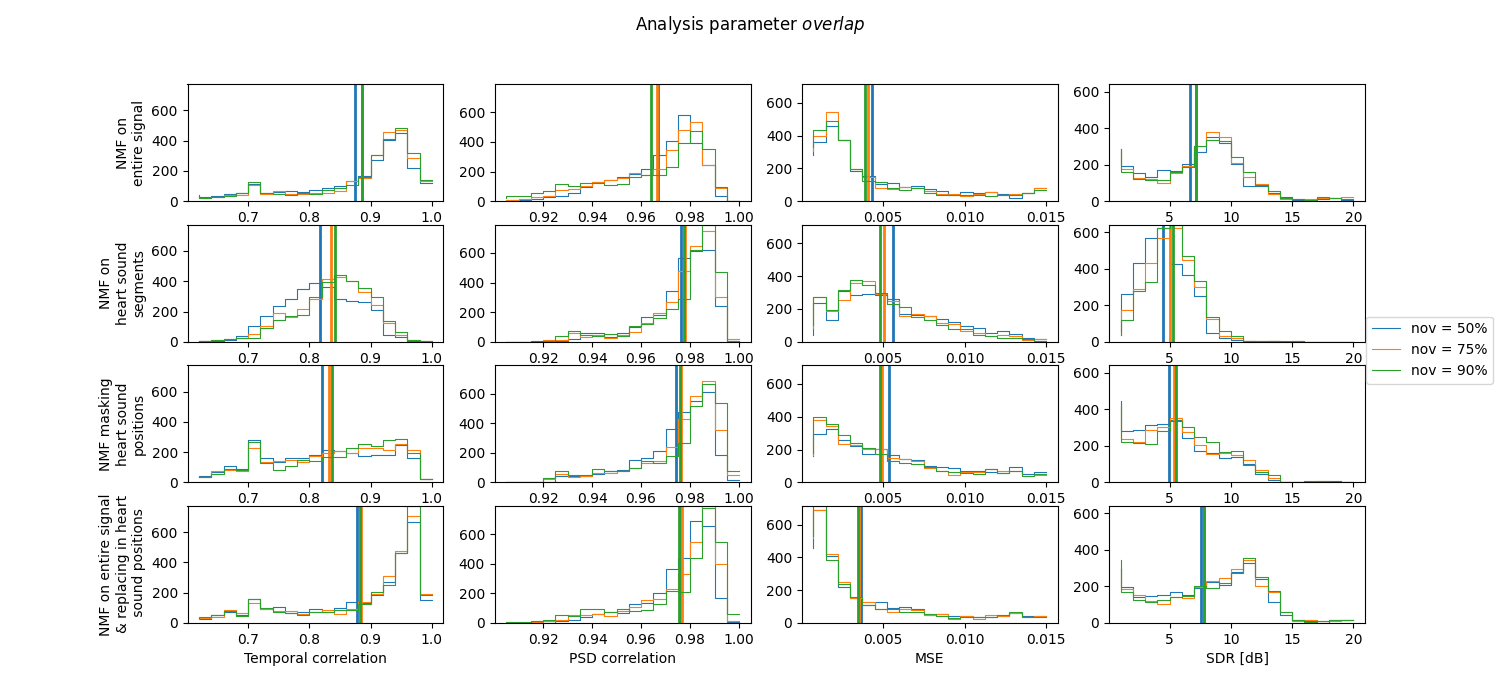

In [6]:
%matplotlib notebook
def density_plots_nov():
    fig, ax = plt.subplots(3, 4, figsize=(9,7), sharex=False)

    #### NMF BASE ####
    sns.kdeplot(temp_all[0.5], color='C0', label=r'$nov = 50\%$',
                edgecolor='C0', fill=True, alpha=0.05, ax=ax[0][0])
    sns.kdeplot(temp_all[0.75], color='C1', label=r'$nov = 75\%$',
                edgecolor='C1', fill=True, alpha=0.05, ax=ax[0][0])
    sns.kdeplot(temp_all[0.9], color='C2', label=r'$nov = 90\%$',
                edgecolor='C2', fill=True, alpha=0.05, ax=ax[0][0])
    
    sns.kdeplot(spec_all[0.5], color='C0',
                edgecolor='C0', fill=True, alpha=0.05, ax=ax[0][1])
    sns.kdeplot(spec_all[0.75], color='C1',
                edgecolor='C1', fill=True, alpha=0.05, ax=ax[0][1])
    sns.kdeplot(spec_all[0.9], color='C2',
                edgecolor='C2', fill=True, alpha=0.05, ax=ax[0][1])

    sns.kdeplot(mse_all[0.5], color='C0',
                edgecolor='C0', fill=True, alpha=0.05, ax=ax[0][2])
    sns.kdeplot(mse_all[0.75], color='C1',
                edgecolor='C1', fill=True, alpha=0.05, ax=ax[0][2])
    sns.kdeplot(mse_all[0.9], color='C2',
                edgecolor='C2', fill=True, alpha=0.05, ax=ax[0][2])
    
    sns.kdeplot(sdr_all[0.5], color='C0',
                edgecolor='C0', fill=True, alpha=0.05, ax=ax[0][3])
    sns.kdeplot(sdr_all[0.75], color='C1',
                edgecolor='C1', fill=True, alpha=0.05, ax=ax[0][3])
    sns.kdeplot(sdr_all[0.9], color='C2',
                edgecolor='C2', fill=True, alpha=0.05, ax=ax[0][3])
    
    
    #### NMF on segments ####
    sns.kdeplot(temp_seg[0.5], color='C0', 
                edgecolor='C0', fill=True, alpha=0.05, ax=ax[1][0])
    sns.kdeplot(temp_seg[0.75], color='C1',
                edgecolor='C1', fill=True, alpha=0.05, ax=ax[1][0])
    sns.kdeplot(temp_seg[0.9], color='C2', 
                edgecolor='C2', fill=True, alpha=0.05, ax=ax[1][0])
    
    sns.kdeplot(spec_seg[0.5], color='C0',
                edgecolor='C0', fill=True, alpha=0.05, ax=ax[1][1])
    sns.kdeplot(spec_seg[0.75], color='C1',
                edgecolor='C1', fill=True, alpha=0.05, ax=ax[1][1])
    sns.kdeplot(spec_seg[0.9], color='C2',
                edgecolor='C2', fill=True, alpha=0.05, ax=ax[1][1])

    sns.kdeplot(mse_seg[0.5], color='C0',
                edgecolor='C0', fill=True, alpha=0.05, ax=ax[1][2])
    sns.kdeplot(mse_seg[0.75], color='C1',
                edgecolor='C1', fill=True, alpha=0.05, ax=ax[1][2])
    sns.kdeplot(mse_seg[0.9], color='C2',
                edgecolor='C2', fill=True, alpha=0.05, ax=ax[1][2])
    
    sns.kdeplot(sdr_seg[0.5], color='C0',
                edgecolor='C0', fill=True, alpha=0.05, ax=ax[1][3])
    sns.kdeplot(sdr_seg[0.75], color='C1',
                edgecolor='C1', fill=True, alpha=0.05, ax=ax[1][3])
    sns.kdeplot(sdr_seg[0.9], color='C2',
                edgecolor='C2', fill=True, alpha=0.05, ax=ax[1][3])
    
    
    #### NMF masked segments ####
    sns.kdeplot(temp_mask[0.5], color='C0', 
                edgecolor='C0', fill=True, alpha=0.05, ax=ax[2][0])
    sns.kdeplot(temp_mask[0.75], color='C1',
                edgecolor='C1', fill=True, alpha=0.05, ax=ax[2][0])
    sns.kdeplot(temp_mask[0.9], color='C2', 
                edgecolor='C2', fill=True, alpha=0.05, ax=ax[2][0])
    
    sns.kdeplot(spec_mask[0.5], color='C0',
                edgecolor='C0', fill=True, alpha=0.05, ax=ax[2][1])
    sns.kdeplot(spec_mask[0.75], color='C1',
                edgecolor='C1', fill=True, alpha=0.05, ax=ax[2][1])
    sns.kdeplot(spec_mask[0.9], color='C2',
                edgecolor='C2', fill=True, alpha=0.05, ax=ax[2][1])

    sns.kdeplot(mse_mask[0.5], color='C0',
                edgecolor='C0', fill=True, alpha=0.05, ax=ax[2][2])
    sns.kdeplot(mse_mask[0.75], color='C1',
                edgecolor='C1', fill=True, alpha=0.05, ax=ax[2][2])
    sns.kdeplot(mse_mask[0.9], color='C2',
                edgecolor='C2', fill=True, alpha=0.05, ax=ax[2][2])
    
    sns.kdeplot(sdr_mask[0.5], color='C0',
                edgecolor='C0', fill=True, alpha=0.05, ax=ax[2][3])
    sns.kdeplot(sdr_mask[0.75], color='C1',
                edgecolor='C1', fill=True, alpha=0.05, ax=ax[2][3])
    sns.kdeplot(sdr_mask[0.9], color='C2',
                edgecolor='C2', fill=True, alpha=0.05, ax=ax[2][3])


    # Seteando los ylabel
    ax[0][0].set_ylabel('NMF\nbase')
    ax[0][1].set_ylabel('')
    ax[0][2].set_ylabel('')
    ax[0][3].set_ylabel('')
    ax[1][0].set_ylabel('NMF on\nsegments')
    ax[1][1].set_ylabel('')
    ax[1][2].set_ylabel('')
    ax[1][3].set_ylabel('')
    ax[2][0].set_ylabel('NMF masked\nsegments')
    ax[2][1].set_ylabel('')
    ax[2][2].set_ylabel('')
    ax[2][3].set_ylabel('')

    # Seteando los títulos
    ax[2][0].set_xlabel('Temporal\ncorrelation')
    ax[2][1].set_xlabel('Spectral\ncorrelation')
    ax[2][2].set_xlabel('MSE')
    ax[2][3].set_xlabel('SDR')

    # Seteando las leyendas
    fig.legend(loc='center right')

    # Ajustando los límites
    ax[0][0].set_xlim([0.35, 1.06])
    ax[1][0].set_xlim([0.35, 1.06])
    ax[2][0].set_xlim([0.35, 1.06])

    ax[0][1].set_xlim([0.7, 1.03])
    ax[1][1].set_xlim([0.7, 1.03])
    ax[2][1].set_xlim([0.7, 1.03])

    ax[0][2].set_xlim([-0.006, 0.035])
    ax[1][2].set_xlim([-0.006, 0.035])
    ax[2][2].set_xlim([-0.006, 0.035])

    ax[0][3].set_xlim([-5, 25])
    ax[1][3].set_xlim([-5, 25])
    ax[2][3].set_xlim([-5, 25])

    # Ajustando las etiquetas del eje
    fig.align_ylabels(ax[:])
    fig.subplots_adjust(right=0.85)
    # Quitando el espacio entre gráficos
    # fig.subplots_adjust(wspace=0.1, hspace=0.1)
    plt.show()


def density_plots_nov_nofill():
    fig, ax = plt.subplots(3, 4, figsize=(15,7), sharex=False)

    #### NMF BASE ####
    sns.kdeplot(temp_all[0.5], color='C0', label=r'$nov = 50\%$',
                fill=False, alpha=0.05, ax=ax[0][0])
    sns.kdeplot(temp_all[0.75], color='C1', label=r'$nov = 75\%$',
                fill=False, alpha=0.05, ax=ax[0][0])
    sns.kdeplot(temp_all[0.9], color='C2', label=r'$nov = 90\%$',
                fill=False, alpha=0.05, ax=ax[0][0])
    
    sns.kdeplot(spec_all[0.5], color='C0',
                fill=False, alpha=0.05, ax=ax[0][1])
    sns.kdeplot(spec_all[0.75], color='C1',
                fill=False, alpha=0.05, ax=ax[0][1])
    sns.kdeplot(spec_all[0.9], color='C2',
                fill=False, alpha=0.05, ax=ax[0][1])

    sns.kdeplot(mse_all[0.5], color='C0',
                fill=False, alpha=0.05, ax=ax[0][2])
    sns.kdeplot(mse_all[0.75], color='C1',
                fill=False, alpha=0.05, ax=ax[0][2])
    sns.kdeplot(mse_all[0.9], color='C2',
                fill=False, alpha=0.05, ax=ax[0][2])
    
    sns.kdeplot(sdr_all[0.5], color='C0',
                fill=False, alpha=0.05, ax=ax[0][3])
    sns.kdeplot(sdr_all[0.75], color='C1',
                fill=False, alpha=0.05, ax=ax[0][3])
    sns.kdeplot(sdr_all[0.9], color='C2',
                fill=False, alpha=0.05, ax=ax[0][3])
    
    
    #### NMF on segments ####
    sns.kdeplot(temp_seg[0.5], color='C0', 
                fill=False, alpha=0.05, ax=ax[1][0])
    sns.kdeplot(temp_seg[0.75], color='C1',
                fill=False, alpha=0.05, ax=ax[1][0])
    sns.kdeplot(temp_seg[0.9], color='C2', 
                fill=False, alpha=0.05, ax=ax[1][0])
    
    sns.kdeplot(spec_seg[0.5], color='C0',
                fill=False, alpha=0.05, ax=ax[1][1])
    sns.kdeplot(spec_seg[0.75], color='C1',
                fill=False, alpha=0.05, ax=ax[1][1])
    sns.kdeplot(spec_seg[0.9], color='C2',
                fill=False, alpha=0.05, ax=ax[1][1])

    sns.kdeplot(mse_seg[0.5], color='C0',
                fill=False, alpha=0.05, ax=ax[1][2])
    sns.kdeplot(mse_seg[0.75], color='C1',
                fill=False, alpha=0.05, ax=ax[1][2])
    sns.kdeplot(mse_seg[0.9], color='C2',
                fill=False, alpha=0.05, ax=ax[1][2])
    
    sns.kdeplot(sdr_seg[0.5], color='C0',
                fill=False, alpha=0.05, ax=ax[1][3])
    sns.kdeplot(sdr_seg[0.75], color='C1',
                fill=False, alpha=0.05, ax=ax[1][3])
    sns.kdeplot(sdr_seg[0.9], color='C2',
                fill=False, alpha=0.05, ax=ax[1][3])
    
    
    #### NMF masked segments ####
    sns.kdeplot(temp_mask[0.5], color='C0', 
                fill=False, alpha=0.05, ax=ax[2][0])
    sns.kdeplot(temp_mask[0.75], color='C1',
                fill=False, alpha=0.05, ax=ax[2][0])
    sns.kdeplot(temp_mask[0.9], color='C2', 
                fill=False, alpha=0.05, ax=ax[2][0])
    
    sns.kdeplot(spec_mask[0.5], color='C0',
                fill=False, alpha=0.05, ax=ax[2][1])
    sns.kdeplot(spec_mask[0.75], color='C1',
                fill=False, alpha=0.05, ax=ax[2][1])
    sns.kdeplot(spec_mask[0.9], color='C2',
                fill=False, alpha=0.05, ax=ax[2][1])

    sns.kdeplot(mse_mask[0.5], color='C0',
                fill=False, alpha=0.05, ax=ax[2][2])
    sns.kdeplot(mse_mask[0.75], color='C1',
                fill=False, alpha=0.05, ax=ax[2][2])
    sns.kdeplot(mse_mask[0.9], color='C2',
                fill=False, alpha=0.05, ax=ax[2][2])
    
    sns.kdeplot(sdr_mask[0.5], color='C0',
                fill=False, alpha=0.05, ax=ax[2][3])
    sns.kdeplot(sdr_mask[0.75], color='C1',
                fill=False, alpha=0.05, ax=ax[2][3])
    sns.kdeplot(sdr_mask[0.9], color='C2',
                fill=False, alpha=0.05, ax=ax[2][3])


    # Seteando los ylabel
    ax[0][0].set_ylabel('NMF\nbase')
    ax[0][1].set_ylabel('')
    ax[0][2].set_ylabel('')
    ax[0][3].set_ylabel('')
    ax[1][0].set_ylabel('NMF on\nsegments')
    ax[1][1].set_ylabel('')
    ax[1][2].set_ylabel('')
    ax[1][3].set_ylabel('')
    ax[2][0].set_ylabel('NMF masked\nsegments')
    ax[2][1].set_ylabel('')
    ax[2][2].set_ylabel('')
    ax[2][3].set_ylabel('')

    # Seteando los títulos
    ax[2][0].set_xlabel('Temporal\ncorrelation')
    ax[2][1].set_xlabel('Spectral\ncorrelation')
    ax[2][2].set_xlabel('MSE')
    ax[2][3].set_xlabel('SDR')

    # Seteando las leyendas
    fig.legend(loc='center right')

    # Ajustando los límites
    ax[0][0].set_xlim([0.35, 1.06])
    ax[1][0].set_xlim([0.35, 1.06])
    ax[2][0].set_xlim([0.35, 1.06])
    ax[0][0].set_ylim([0, 8])
    ax[1][0].set_ylim([0, 8])
    ax[2][0].set_ylim([0, 8])

    ax[0][1].set_xlim([0.7, 1.03])
    ax[1][1].set_xlim([0.7, 1.03])
    ax[2][1].set_xlim([0.7, 1.03])
    ax[0][1].set_ylim([0, 48])
    ax[1][1].set_ylim([0, 48])
    ax[2][1].set_ylim([0, 48])

    ax[0][2].set_xlim([-0.006, 0.035])
    ax[1][2].set_xlim([-0.006, 0.035])
    ax[2][2].set_xlim([-0.006, 0.035])
    ax[0][2].set_ylim([0, 160])
    ax[1][2].set_ylim([0, 160])
    ax[2][2].set_ylim([0, 160])

    ax[0][3].set_xlim([-5, 25])
    ax[1][3].set_xlim([-5, 25])
    ax[2][3].set_xlim([-5, 25])
    ax[0][3].set_ylim([0, 0.24])
    ax[1][3].set_ylim([0, 0.24])
    ax[2][3].set_ylim([0, 0.24])
    
    # Ajustando las etiquetas del eje
    fig.align_ylabels(ax[:])
    fig.subplots_adjust(right=0.91)
    fig.suptitle(r'Análisis de métricas parámetro $noverlap$')
    plt.savefig('Images/noverlap_analysis.pdf', transparent=True)
    plt.show()


def hist_plots_nov(fig, ax, bins=40, linewidth=1):
    def _plot_hist(num, input_array, bins, axs, interval=None, label=None):
        hist, bin_edges = np.histogram(a=input_array, bins=bins, range=interval)
        bins_plot = [np.mean(bin_edges[i:i+2]) for i in range(len(bin_edges) - 1)]
        
        if label is None:
            axs.plot(bins_plot, hist, color=f'C{num}', linewidth=linewidth)
        else:
            axs.plot(bins_plot, hist, color=f'C{num}', label=label, linewidth=linewidth)
        
        return hist
    
    # Definición de las posibilidades de N
    nov_list = (0.5, 0.75, 0.9)
    
    # Definición del límite máximo x para MSE y SDR
    max_mse_x_list = list()
    max_sdr_x_list = list()
    
    for nov in nov_list:
        max_mse_x_list.append(max(mse_all[nov]))
        max_mse_x_list.append(max(mse_seg[nov]))
        max_mse_x_list.append(max(mse_mask[nov]))
        max_mse_x_list.append(max(mse_repl[nov]))
        
        max_sdr_x_list.append(max(sdr_all[nov]))
        max_sdr_x_list.append(max(sdr_seg[nov]))
        max_sdr_x_list.append(max(sdr_mask[nov]))
        max_sdr_x_list.append(max(sdr_repl[nov]))
    
    max_mse_x = max(max_mse_x_list)
    max_sdr_x = max(max_sdr_x_list)
    
    # Definición del límite máximo y
    max_temp_y = 0
    max_spec_y = 0
    max_mse_y = 0
    max_sdr_y = 0
    
    # Lista para cada uno de los histogramas a realizar
    hist_dict = defaultdict(list)
    
    # Temporal correlation
    for num, nov in enumerate(nov_list):
        ####      Obtener los histogramas      ####
        # to_all
        hist_temp_all = _plot_hist(num, temp_all[nov], bins=bins, axs=ax[0][0], interval=(0,1), 
                                   label=f'nov = {int(nov * 100)}%')
        hist_spec_all = _plot_hist(num, spec_all[nov], bins=bins, axs=ax[0][1], interval=(0,1))
        hist_mse_all = _plot_hist(num, mse_all[nov], bins=bins, axs=ax[0][2], interval=(0, max_mse_x))
        hist_sdr_all = _plot_hist(num, sdr_all[nov], bins=bins, axs=ax[0][3], interval=(0, max_sdr_x))
        
        # on_segments
        hist_temp_seg = _plot_hist(num, temp_seg[nov], bins=bins, axs=ax[1][0], interval=(0,1))
        hist_spec_seg = _plot_hist(num, spec_seg[nov], bins=bins, axs=ax[1][1], interval=(0,1))
        hist_mse_seg = _plot_hist(num, mse_seg[nov], bins=bins, axs=ax[1][2], interval=(0, max_mse_x))
        hist_sdr_seg = _plot_hist(num, sdr_seg[nov], bins=bins, axs=ax[1][3], interval=(0, max_sdr_x))
        
        # masked_segments
        hist_temp_mask = _plot_hist(num, temp_mask[nov], bins=bins, axs=ax[2][0], interval=(0,1))
        hist_spec_mask = _plot_hist(num, spec_mask[nov], bins=bins, axs=ax[2][1], interval=(0,1))
        hist_mse_mask = _plot_hist(num, mse_mask[nov], bins=bins, axs=ax[2][2], interval=(0, max_mse_x))
        hist_sdr_mask = _plot_hist(num, sdr_mask[nov], bins=bins, axs=ax[2][3], interval=(0, max_sdr_x))
        
        # replaced_segments
        hist_temp_repl = _plot_hist(num, temp_repl[nov], bins=bins, axs=ax[3][0], interval=(0,1))
        hist_spec_repl = _plot_hist(num, spec_repl[nov], bins=bins, axs=ax[3][1], interval=(0,1))
        hist_mse_repl = _plot_hist(num, mse_repl[nov], bins=bins, axs=ax[3][2], interval=(0, max_mse_x))
        hist_sdr_repl = _plot_hist(num, sdr_repl[nov], bins=bins, axs=ax[3][3], interval=(0, max_sdr_x))
        
        # Máximos para los límites de los ejes y
        max_temp_y = max(max_temp_y, max(hist_temp_all), 
                         max(hist_temp_seg), max(hist_temp_mask),
                         max(hist_temp_repl)) 
        max_spec_y = max(max_spec_y, max(hist_spec_all), 
                         max(hist_spec_seg), max(hist_spec_mask),
                         max(hist_spec_repl))
        max_mse_y = max(max_mse_y, max(hist_mse_all), 
                        max(hist_mse_seg), max(hist_mse_mask),
                        max(hist_mse_repl))
        max_sdr_y = max(max_sdr_y, max(hist_sdr_all), 
                        max(hist_sdr_seg), max(hist_sdr_mask),
                        max(hist_sdr_repl))
        
        # Lista para cada uno de los histogramas a realizar
        hist_dict[(0, 0)].append(hist_temp_all)
        hist_dict[(0, 1)].append(hist_spec_all)
        hist_dict[(0, 2)].append(hist_mse_all)
        hist_dict[(0, 3)].append(hist_sdr_all)
        hist_dict[(1, 0)].append(hist_temp_seg)
        hist_dict[(1, 1)].append(hist_spec_seg)
        hist_dict[(1, 2)].append(hist_mse_seg)
        hist_dict[(1, 3)].append(hist_sdr_seg)
        hist_dict[(2, 0)].append(hist_temp_mask)
        hist_dict[(2, 1)].append(hist_spec_mask)
        hist_dict[(2, 2)].append(hist_mse_mask)
        hist_dict[(2, 3)].append(hist_sdr_mask)
        hist_dict[(3, 0)].append(hist_temp_repl)
        hist_dict[(3, 1)].append(hist_spec_repl)
        hist_dict[(3, 2)].append(hist_mse_repl)
        hist_dict[(3, 3)].append(hist_sdr_repl)
    
    for key in hist_dict.keys():
        # Obtener los índices de los máximos por cada bin
        max_indices = np.argmax(hist_dict[key], axis=0)
        
        # Definición de los bordes de los bins
        if key[1] == 2:
            bin_edges = np.linspace(0, max_mse_x, bins + 1)
        elif key[1] == 3:
            bin_edges = np.linspace(0, max_sdr_x, bins + 1)
        else:
            bin_edges = np.linspace(0, 1, bins + 1)
            
        for i in range(bins):
            ax[key[0], key[1]].axvspan(bin_edges[i], bin_edges[i + 1], 
                                       color=f'C{max_indices[i]}', alpha=0.1)
        
        
    # Seteando los ylabel
    ax[0][0].set_ylabel('NMF\nbase')
    ax[0][1].set_ylabel('')
    ax[0][2].set_ylabel('')
    ax[0][3].set_ylabel('')
    ax[1][0].set_ylabel('NMF on\nsegments')
    ax[1][1].set_ylabel('')
    ax[1][2].set_ylabel('')
    ax[1][3].set_ylabel('')
    ax[2][0].set_ylabel('NMF masked\nsegments')
    ax[2][1].set_ylabel('')
    ax[2][2].set_ylabel('')
    ax[2][3].set_ylabel('')
    ax[3][0].set_ylabel('NMF replaced\nsegments')
    ax[3][1].set_ylabel('')
    ax[3][2].set_ylabel('')
    ax[3][3].set_ylabel('')

    # Seteando los títulos
    ax[3][0].set_xlabel('Temporal\ncorrelation')
    ax[3][1].set_xlabel('Spectral\ncorrelation')
    ax[3][2].set_xlabel('MSE')
    ax[3][3].set_xlabel('SDR')

    # Seteando las leyendas
    fig.legend(loc='center right')
    
    # Ajustando los límites
    ax[0][0].set_ylim([0, max_temp_y])
    ax[1][0].set_ylim([0, max_temp_y])
    ax[2][0].set_ylim([0, max_temp_y])
    ax[3][0].set_ylim([0, max_temp_y])

    ax[0][1].set_ylim([0, max_spec_y])
    ax[1][1].set_ylim([0, max_spec_y])
    ax[2][1].set_ylim([0, max_spec_y])
    ax[3][1].set_ylim([0, max_spec_y])

    ax[0][2].set_ylim([0, max_mse_y])
    ax[1][2].set_ylim([0, max_mse_y])
    ax[2][2].set_ylim([0, max_mse_y])
    ax[3][2].set_ylim([0, max_mse_y])

    ax[0][3].set_ylim([0, max_sdr_y])
    ax[1][3].set_ylim([0, max_sdr_y])
    ax[2][3].set_ylim([0, max_sdr_y])
    ax[3][3].set_ylim([0, max_sdr_y])
    
    # Ajustando las etiquetas del eje
    fig.align_ylabels(ax[:])
    fig.subplots_adjust(right=0.91)
    fig.suptitle(r'Analysis parameter $noverlap$')
    
    plt.savefig('Images/noverlap_analysis.pdf', transparent=True)
    plt.show()


def hist_plots_nov_spa(fig, ax, bins=40, linewidth=1):
    def _plot_hist(num, input_array, bins, axs, interval=None, label=None):
        hist, bin_edges = np.histogram(a=input_array, bins=bins, range=interval)
        bins_plot = [np.mean(bin_edges[i:i+2]) for i in range(len(bin_edges) - 1)]
        
        if label is None:
            axs.plot(bins_plot, hist, color=f'C{num}', linewidth=linewidth)
        else:
            axs.plot(bins_plot, hist, color=f'C{num}', label=label, linewidth=linewidth)
        
        return hist
    
    # Definición de las posibilidades de N
    nov_list = (0.5, 0.75, 0.9)
    
    # Definición del límite máximo x para MSE y SDR
    max_mse_x_list = list()
    max_sdr_x_list = list()
    
    for nov in nov_list:
        max_mse_x_list.append(max(mse_all[nov]))
        max_mse_x_list.append(max(mse_seg[nov]))
        max_mse_x_list.append(max(mse_mask[nov]))
        max_mse_x_list.append(max(mse_repl[nov]))
        
        max_sdr_x_list.append(max(sdr_all[nov]))
        max_sdr_x_list.append(max(sdr_seg[nov]))
        max_sdr_x_list.append(max(sdr_mask[nov]))
        max_sdr_x_list.append(max(sdr_repl[nov]))
    
    max_mse_x = max(max_mse_x_list)
    max_sdr_x = max(max_sdr_x_list)
    
    # Definición del límite máximo y
    max_temp_y = 0
    max_spec_y = 0
    max_mse_y = 0
    max_sdr_y = 0
    
    # Lista para cada uno de los histogramas a realizar
    hist_dict = defaultdict(list)
    
    # Temporal correlation
    for num, nov in enumerate(nov_list):
        ####      Obtener los histogramas      ####
        # to_all
        hist_temp_all = _plot_hist(num, temp_all[nov], bins=bins, axs=ax[0][0], interval=(0,1), 
                                   label=f'nov = {int(nov * 100)}%')
        hist_spec_all = _plot_hist(num, spec_all[nov], bins=bins, axs=ax[0][1], interval=(0,1))
        hist_mse_all = _plot_hist(num, mse_all[nov], bins=bins, axs=ax[0][2], interval=(0, max_mse_x))
        hist_sdr_all = _plot_hist(num, sdr_all[nov], bins=bins, axs=ax[0][3], interval=(0, max_sdr_x))
        
        # on_segments
        hist_temp_seg = _plot_hist(num, temp_seg[nov], bins=bins, axs=ax[1][0], interval=(0,1))
        hist_spec_seg = _plot_hist(num, spec_seg[nov], bins=bins, axs=ax[1][1], interval=(0,1))
        hist_mse_seg = _plot_hist(num, mse_seg[nov], bins=bins, axs=ax[1][2], interval=(0, max_mse_x))
        hist_sdr_seg = _plot_hist(num, sdr_seg[nov], bins=bins, axs=ax[1][3], interval=(0, max_sdr_x))
        
        # masked_segments
        hist_temp_mask = _plot_hist(num, temp_mask[nov], bins=bins, axs=ax[2][0], interval=(0,1))
        hist_spec_mask = _plot_hist(num, spec_mask[nov], bins=bins, axs=ax[2][1], interval=(0,1))
        hist_mse_mask = _plot_hist(num, mse_mask[nov], bins=bins, axs=ax[2][2], interval=(0, max_mse_x))
        hist_sdr_mask = _plot_hist(num, sdr_mask[nov], bins=bins, axs=ax[2][3], interval=(0, max_sdr_x))
        
        # replaced_segments
        hist_temp_repl = _plot_hist(num, temp_repl[nov], bins=bins, axs=ax[3][0], interval=(0,1))
        hist_spec_repl = _plot_hist(num, spec_repl[nov], bins=bins, axs=ax[3][1], interval=(0,1))
        hist_mse_repl = _plot_hist(num, mse_repl[nov], bins=bins, axs=ax[3][2], interval=(0, max_mse_x))
        hist_sdr_repl = _plot_hist(num, sdr_repl[nov], bins=bins, axs=ax[3][3], interval=(0, max_sdr_x))
        
        # Máximos para los límites de los ejes y
        max_temp_y = max(max_temp_y, max(hist_temp_all), 
                         max(hist_temp_seg), max(hist_temp_mask),
                         max(hist_temp_repl)) 
        max_spec_y = max(max_spec_y, max(hist_spec_all), 
                         max(hist_spec_seg), max(hist_spec_mask),
                         max(hist_spec_repl))
        max_mse_y = max(max_mse_y, max(hist_mse_all), 
                        max(hist_mse_seg), max(hist_mse_mask),
                        max(hist_mse_repl))
        max_sdr_y = max(max_sdr_y, max(hist_sdr_all), 
                        max(hist_sdr_seg), max(hist_sdr_mask),
                        max(hist_sdr_repl))
        
        # Lista para cada uno de los histogramas a realizar
        hist_dict[(0, 0)].append(hist_temp_all)
        hist_dict[(0, 1)].append(hist_spec_all)
        hist_dict[(0, 2)].append(hist_mse_all)
        hist_dict[(0, 3)].append(hist_sdr_all)
        hist_dict[(1, 0)].append(hist_temp_seg)
        hist_dict[(1, 1)].append(hist_spec_seg)
        hist_dict[(1, 2)].append(hist_mse_seg)
        hist_dict[(1, 3)].append(hist_sdr_seg)
        hist_dict[(2, 0)].append(hist_temp_mask)
        hist_dict[(2, 1)].append(hist_spec_mask)
        hist_dict[(2, 2)].append(hist_mse_mask)
        hist_dict[(2, 3)].append(hist_sdr_mask)
        hist_dict[(3, 0)].append(hist_temp_repl)
        hist_dict[(3, 1)].append(hist_spec_repl)
        hist_dict[(3, 2)].append(hist_mse_repl)
        hist_dict[(3, 3)].append(hist_sdr_repl)
    
    for key in hist_dict.keys():
        # Obtener los índices de los máximos por cada bin
        max_indices = np.argmax(hist_dict[key], axis=0)
        
        # Definición de los bordes de los bins
        if key[1] == 2:
            bin_edges = np.linspace(0, max_mse_x, bins + 1)
        elif key[1] == 3:
            bin_edges = np.linspace(0, max_sdr_x, bins + 1)
        else:
            bin_edges = np.linspace(0, 1, bins + 1)
            
        for i in range(bins):
            ax[key[0], key[1]].axvspan(bin_edges[i], bin_edges[i + 1], 
                                       color=f'C{max_indices[i]}', alpha=0.1)
        
        
    # Seteando los ylabel
    ax[0][0].set_ylabel('NMF\nbase')
    ax[0][1].set_ylabel('')
    ax[0][2].set_ylabel('')
    ax[0][3].set_ylabel('')
    ax[1][0].set_ylabel('NMF sobre\nsegmentos')
    ax[1][1].set_ylabel('')
    ax[1][2].set_ylabel('')
    ax[1][3].set_ylabel('')
    ax[2][0].set_ylabel('NMF sobre\nseñal enmascarada')
    ax[2][1].set_ylabel('')
    ax[2][2].set_ylabel('')
    ax[2][3].set_ylabel('')
    ax[3][0].set_ylabel('NMF reemplazando\nsegmentos')
    ax[3][1].set_ylabel('')
    ax[3][2].set_ylabel('')
    ax[3][3].set_ylabel('')

    # Seteando los títulos
    ax[3][0].set_xlabel('Correlación\ntemporal')
    ax[3][1].set_xlabel('Correlación\nespectral')
    ax[3][2].set_xlabel('MSE')
    ax[3][3].set_xlabel('SDR')

    # Seteando las leyendas
    fig.legend(loc='center right')
    
    # Ajustando los límites
    ax[0][0].set_ylim([0, max_temp_y])
    ax[1][0].set_ylim([0, max_temp_y])
    ax[2][0].set_ylim([0, max_temp_y])
    ax[3][0].set_ylim([0, max_temp_y])

    ax[0][1].set_ylim([0, max_spec_y])
    ax[1][1].set_ylim([0, max_spec_y])
    ax[2][1].set_ylim([0, max_spec_y])
    ax[3][1].set_ylim([0, max_spec_y])

    ax[0][2].set_ylim([0, max_mse_y])
    ax[1][2].set_ylim([0, max_mse_y])
    ax[2][2].set_ylim([0, max_mse_y])
    ax[3][2].set_ylim([0, max_mse_y])

    ax[0][3].set_ylim([0, max_sdr_y])
    ax[1][3].set_ylim([0, max_sdr_y])
    ax[2][3].set_ylim([0, max_sdr_y])
    ax[3][3].set_ylim([0, max_sdr_y])
    
    # Ajustando las etiquetas del eje
    fig.align_ylabels(ax[:])
    fig.subplots_adjust(right=0.91)
    fig.suptitle(r'Análisis parámetro $noverlap$')
    
    plt.savefig('Images/noverlap_analysis_SPA.pdf', transparent=True)
    plt.show()

    
def hist_plots_nov_v2(fig, ax, bins=40, linewidth=1, corr_interval=(0.6, 1),
                      mse_interval=(0, 0.015), sdr_interval=(0,20)):
    def _plot_hist(num, input_array, bins, axs, interval=None, label=None):
        hist, bin_edges = np.histogram(a=input_array, bins=bins, range=interval)
        bins_plot = [np.mean(bin_edges[i:i+2]) for i in range(len(bin_edges) - 1)]
        
        if label is None:
            axs.step(bin_edges[1:], hist, color=f'C{num}', linewidth=linewidth)
        else:
            axs.step(bin_edges[1:], hist, color=f'C{num}', label=label, linewidth=linewidth)
        
        return hist
    
    
    # Definición de las posibilidades de N
    nov_list = (0.5, 0.75, 0.9)
    
    if corr_interval is None:
        corr_interval = (0,1)
    
    if mse_interval is None:
        # Definición del límite máximo x para MSE
        max_mse_x_list = list()

        for nov in nov_list:
            max_mse_x_list.append(max(mse_all[nov]))
            max_mse_x_list.append(max(mse_seg[nov]))
            max_mse_x_list.append(max(mse_mask[nov]))
            max_mse_x_list.append(max(mse_repl[nov]))

        max_mse_x = max(max_mse_x_list)
        mse_interval = (0, max_mse_x)
        
    if sdr_interval is None:
        # Definición del límite máximo x para SDR
        max_sdr_x_list = list()

        for nov in nov_list:
            max_sdr_x_list.append(max(sdr_all[nov]))
            max_sdr_x_list.append(max(sdr_seg[nov]))
            max_sdr_x_list.append(max(sdr_mask[nov]))
            max_sdr_x_list.append(max(sdr_repl[nov]))

        max_sdr_x = max(max_sdr_x_list)
        sdr_interval = (0, max_sdr_x)
    
    
    # Definición del límite máximo y
    max_temp_y = 0
    max_spec_y = 0
    max_mse_y = 0
    max_sdr_y = 0
    
    # Lista para cada uno de los histogramas a realizar
    hist_dict = defaultdict(list)
    
    # Temporal correlation
    for num, nov in enumerate(nov_list):
        ####      Obtener los histogramas      ####
        # to_all
        hist_temp_all = _plot_hist(num, temp_all[nov], bins=bins, axs=ax[0][0], interval=corr_interval, 
                                   label=f'nov = {int(nov * 100)}%')
        hist_spec_all = _plot_hist(num, spec_all[nov], bins=bins, axs=ax[0][1], interval=corr_interval)
        hist_mse_all = _plot_hist(num, mse_all[nov], bins=bins, axs=ax[0][2], interval=mse_interval)
        hist_sdr_all = _plot_hist(num, sdr_all[nov], bins=bins, axs=ax[0][3], interval=sdr_interval)
        
        # on_segments
        hist_temp_seg = _plot_hist(num, temp_seg[nov], bins=bins, axs=ax[1][0], interval=corr_interval)
        hist_spec_seg = _plot_hist(num, spec_seg[nov], bins=bins, axs=ax[1][1], interval=corr_interval)
        hist_mse_seg = _plot_hist(num, mse_seg[nov], bins=bins, axs=ax[1][2], interval=mse_interval)
        hist_sdr_seg = _plot_hist(num, sdr_seg[nov], bins=bins, axs=ax[1][3], interval=sdr_interval)
        
        # masked_segments
        hist_temp_mask = _plot_hist(num, temp_mask[nov], bins=bins, axs=ax[2][0], interval=corr_interval)
        hist_spec_mask = _plot_hist(num, spec_mask[nov], bins=bins, axs=ax[2][1], interval=corr_interval)
        hist_mse_mask = _plot_hist(num, mse_mask[nov], bins=bins, axs=ax[2][2], interval=mse_interval)
        hist_sdr_mask = _plot_hist(num, sdr_mask[nov], bins=bins, axs=ax[2][3], interval=sdr_interval)
        
        # replaced_segments
        hist_temp_repl = _plot_hist(num, temp_repl[nov], bins=bins, axs=ax[3][0], interval=corr_interval)
        hist_spec_repl = _plot_hist(num, spec_repl[nov], bins=bins, axs=ax[3][1], interval=corr_interval)
        hist_mse_repl = _plot_hist(num, mse_repl[nov], bins=bins, axs=ax[3][2], interval=mse_interval)
        hist_sdr_repl = _plot_hist(num, sdr_repl[nov], bins=bins, axs=ax[3][3], interval=sdr_interval)
        
        # Máximos para los límites de los ejes y
        max_temp_y = max(max_temp_y, max(hist_temp_all), 
                         max(hist_temp_seg), max(hist_temp_mask),
                         max(hist_temp_repl)) 
        max_spec_y = max(max_spec_y, max(hist_spec_all), 
                         max(hist_spec_seg), max(hist_spec_mask),
                         max(hist_spec_repl))
        max_mse_y = max(max_mse_y, max(hist_mse_all), 
                        max(hist_mse_seg), max(hist_mse_mask),
                        max(hist_mse_repl))
        max_sdr_y = max(max_sdr_y, max(hist_sdr_all), 
                        max(hist_sdr_seg), max(hist_sdr_mask),
                        max(hist_sdr_repl))
        
        # Lista para cada uno de los histogramas a realizar
        hist_dict[(0, 0)].append(hist_temp_all)
        hist_dict[(0, 1)].append(hist_spec_all)
        hist_dict[(0, 2)].append(hist_mse_all)
        hist_dict[(0, 3)].append(hist_sdr_all)
        hist_dict[(1, 0)].append(hist_temp_seg)
        hist_dict[(1, 1)].append(hist_spec_seg)
        hist_dict[(1, 2)].append(hist_mse_seg)
        hist_dict[(1, 3)].append(hist_sdr_seg)
        hist_dict[(2, 0)].append(hist_temp_mask)
        hist_dict[(2, 1)].append(hist_spec_mask)
        hist_dict[(2, 2)].append(hist_mse_mask)
        hist_dict[(2, 3)].append(hist_sdr_mask)
        hist_dict[(3, 0)].append(hist_temp_repl)
        hist_dict[(3, 1)].append(hist_spec_repl)
        hist_dict[(3, 2)].append(hist_mse_repl)
        hist_dict[(3, 3)].append(hist_sdr_repl)
    
#     for key in hist_dict.keys():
#         # Obtener los índices de los máximos por cada bin
#         max_indices = np.argmax(hist_dict[key], axis=0)
        
#         # Definición de los bordes de los bins
#         if key[1] == 2:
#             bin_edges = np.linspace(0, max_mse_x, bins + 1)
#         elif key[1] == 3:
#             bin_edges = np.linspace(0, max_sdr_x, bins + 1)
#         else:
#             bin_edges = np.linspace(0, 1, bins + 1)
            
#         for i in range(bins):
#             ax[key[0], key[1]].axvspan(bin_edges[i], bin_edges[i + 1], 
#                                        color=f'C{max_indices[i]}', alpha=0.1)
        
        
    # Seteando los ylabel
    ax[0][0].set_ylabel('NMF on\nentire signal')
    ax[0][1].set_ylabel('')
    ax[0][2].set_ylabel('')
    ax[0][3].set_ylabel('')
    ax[1][0].set_ylabel('NMF on\nheart sound\nsegments')
    ax[1][1].set_ylabel('')
    ax[1][2].set_ylabel('')
    ax[1][3].set_ylabel('')
    ax[2][0].set_ylabel('NMF masking\nheart sound\npositions')
    ax[2][1].set_ylabel('')
    ax[2][2].set_ylabel('')
    ax[2][3].set_ylabel('')
    ax[3][0].set_ylabel('NMF on entire signal\n& replacing in heart\n sound positions')
    ax[3][1].set_ylabel('')
    ax[3][2].set_ylabel('')
    ax[3][3].set_ylabel('')

    # Seteando los títulos
    ax[3][0].set_xlabel('Temporal correlation')
    ax[3][1].set_xlabel('PSD correlation')
    ax[3][2].set_xlabel('MSE')
    ax[3][3].set_xlabel('SDR [dB]')

    # Seteando las leyendas
    fig.legend(loc='center right')
    
    # Ajustando los límites
    ax[0][0].set_ylim([0, max_temp_y])
    ax[1][0].set_ylim([0, max_temp_y])
    ax[2][0].set_ylim([0, max_temp_y])
    ax[3][0].set_ylim([0, max_temp_y])

    ax[0][1].set_ylim([0, max_spec_y])
    ax[1][1].set_ylim([0, max_spec_y])
    ax[2][1].set_ylim([0, max_spec_y])
    ax[3][1].set_ylim([0, max_spec_y])

    ax[0][2].set_ylim([0, max_mse_y])
    ax[1][2].set_ylim([0, max_mse_y])
    ax[2][2].set_ylim([0, max_mse_y])
    ax[3][2].set_ylim([0, max_mse_y])

    ax[0][3].set_ylim([0, max_sdr_y])
    ax[1][3].set_ylim([0, max_sdr_y])
    ax[2][3].set_ylim([0, max_sdr_y])
    ax[3][3].set_ylim([0, max_sdr_y])
    
    # Ajustando las etiquetas del eje
    fig.align_ylabels(ax[:])
    fig.subplots_adjust(right=0.91)
    fig.suptitle(r'Analysis parameter $overlap$')
    
    plt.savefig('Images/noverlap_analysis_v2.pdf', transparent=True)
    plt.show()

    
def hist_plots_nov_v3(fig, ax, bins=40, linewidth=1, corr_interval=(0.6, 1),
                      psd_interval=(0.9, 1), mse_interval=(0, 0.015), 
                      sdr_interval=(0,20)):
    def _plot_hist(num, input_array, bins, axs, interval=None, label=None):
        hist, bin_edges = np.histogram(a=input_array, bins=bins, range=interval)
        bins_plot = [np.mean(bin_edges[i:i+2]) for i in range(len(bin_edges) - 1)]
        
        # Definición de las líneas de centro de masa
        mean_line = np.average(bins_plot, weights=hist)
        
        if label is None:
            axs.step(bin_edges[1:], hist, color=f'C{num}', linewidth=linewidth)
            axs.axvline(mean_line, color=f'C{num}', linewidth=2)
        else:
            axs.step(bin_edges[1:], hist, color=f'C{num}', label=label, linewidth=linewidth)
            axs.axvline(mean_line, color=f'C{num}', linewidth=2)
        
        return hist
    
    
    # Definición de las posibilidades de N
    nov_list = (0.5, 0.75, 0.9)
    
    if corr_interval is None:
        corr_interval = (0,1)
        
    if psd_interval is None:
        psd_interval = (0,1)
    
    if mse_interval is None:
        # Definición del límite máximo x para MSE
        max_mse_x_list = list()

        for nov in nov_list:
            max_mse_x_list.append(max(mse_all[nov]))
            max_mse_x_list.append(max(mse_seg[nov]))
            max_mse_x_list.append(max(mse_mask[nov]))
            max_mse_x_list.append(max(mse_repl[nov]))

        max_mse_x = max(max_mse_x_list)
        mse_interval = (0, max_mse_x)
        
    if sdr_interval is None:
        # Definición del límite máximo x para SDR
        max_sdr_x_list = list()

        for nov in nov_list:
            max_sdr_x_list.append(max(sdr_all[nov]))
            max_sdr_x_list.append(max(sdr_seg[nov]))
            max_sdr_x_list.append(max(sdr_mask[nov]))
            max_sdr_x_list.append(max(sdr_repl[nov]))

        max_sdr_x = max(max_sdr_x_list)
        sdr_interval = (0, max_sdr_x)
    
    
    # Definición del límite máximo y
    max_temp_y = 0
    max_spec_y = 0
    max_mse_y = 0
    max_sdr_y = 0
    
    # Lista para cada uno de los histogramas a realizar
    hist_dict = defaultdict(list)
    
    # Temporal correlation
    for num, nov in enumerate(nov_list):
        ####      Obtener los histogramas      ####
        # to_all
        hist_temp_all = _plot_hist(num, temp_all[nov], bins=bins, axs=ax[0][0], interval=corr_interval, 
                                   label=f'nov = {int(nov * 100)}%')
        hist_spec_all = _plot_hist(num, spec_all[nov], bins=bins, axs=ax[0][1], interval=psd_interval)
        hist_mse_all = _plot_hist(num, mse_all[nov], bins=bins, axs=ax[0][2], interval=mse_interval)
        hist_sdr_all = _plot_hist(num, sdr_all[nov], bins=bins, axs=ax[0][3], interval=sdr_interval)
        
        # on_segments
        hist_temp_seg = _plot_hist(num, temp_seg[nov], bins=bins, axs=ax[1][0], interval=corr_interval)
        hist_spec_seg = _plot_hist(num, spec_seg[nov], bins=bins, axs=ax[1][1], interval=psd_interval)
        hist_mse_seg = _plot_hist(num, mse_seg[nov], bins=bins, axs=ax[1][2], interval=mse_interval)
        hist_sdr_seg = _plot_hist(num, sdr_seg[nov], bins=bins, axs=ax[1][3], interval=sdr_interval)
        
        # masked_segments
        hist_temp_mask = _plot_hist(num, temp_mask[nov], bins=bins, axs=ax[2][0], interval=corr_interval)
        hist_spec_mask = _plot_hist(num, spec_mask[nov], bins=bins, axs=ax[2][1], interval=psd_interval)
        hist_mse_mask = _plot_hist(num, mse_mask[nov], bins=bins, axs=ax[2][2], interval=mse_interval)
        hist_sdr_mask = _plot_hist(num, sdr_mask[nov], bins=bins, axs=ax[2][3], interval=sdr_interval)
        
        # replaced_segments
        hist_temp_repl = _plot_hist(num, temp_repl[nov], bins=bins, axs=ax[3][0], interval=corr_interval)
        hist_spec_repl = _plot_hist(num, spec_repl[nov], bins=bins, axs=ax[3][1], interval=psd_interval)
        hist_mse_repl = _plot_hist(num, mse_repl[nov], bins=bins, axs=ax[3][2], interval=mse_interval)
        hist_sdr_repl = _plot_hist(num, sdr_repl[nov], bins=bins, axs=ax[3][3], interval=sdr_interval)
        
        # Máximos para los límites de los ejes y
        max_temp_y = max(max_temp_y, max(hist_temp_all), 
                         max(hist_temp_seg), max(hist_temp_mask),
                         max(hist_temp_repl)) 
        max_spec_y = max(max_spec_y, max(hist_spec_all), 
                         max(hist_spec_seg), max(hist_spec_mask),
                         max(hist_spec_repl))
        max_mse_y = max(max_mse_y, max(hist_mse_all), 
                        max(hist_mse_seg), max(hist_mse_mask),
                        max(hist_mse_repl))
        max_sdr_y = max(max_sdr_y, max(hist_sdr_all), 
                        max(hist_sdr_seg), max(hist_sdr_mask),
                        max(hist_sdr_repl))
        
        # Lista para cada uno de los histogramas a realizar
        hist_dict[(0, 0)].append(hist_temp_all)
        hist_dict[(0, 1)].append(hist_spec_all)
        hist_dict[(0, 2)].append(hist_mse_all)
        hist_dict[(0, 3)].append(hist_sdr_all)
        hist_dict[(1, 0)].append(hist_temp_seg)
        hist_dict[(1, 1)].append(hist_spec_seg)
        hist_dict[(1, 2)].append(hist_mse_seg)
        hist_dict[(1, 3)].append(hist_sdr_seg)
        hist_dict[(2, 0)].append(hist_temp_mask)
        hist_dict[(2, 1)].append(hist_spec_mask)
        hist_dict[(2, 2)].append(hist_mse_mask)
        hist_dict[(2, 3)].append(hist_sdr_mask)
        hist_dict[(3, 0)].append(hist_temp_repl)
        hist_dict[(3, 1)].append(hist_spec_repl)
        hist_dict[(3, 2)].append(hist_mse_repl)
        hist_dict[(3, 3)].append(hist_sdr_repl)
    
#     for key in hist_dict.keys():
#         # Obtener los índices de los máximos por cada bin
#         max_indices = np.argmax(hist_dict[key], axis=0)
        
#         # Definición de los bordes de los bins
#         if key[1] == 2:
#             bin_edges = np.linspace(0, max_mse_x, bins + 1)
#         elif key[1] == 3:
#             bin_edges = np.linspace(0, max_sdr_x, bins + 1)
#         else:
#             bin_edges = np.linspace(0, 1, bins + 1)
            
#         for i in range(bins):
#             ax[key[0], key[1]].axvspan(bin_edges[i], bin_edges[i + 1], 
#                                        color=f'C{max_indices[i]}', alpha=0.1)
        
        
    # Seteando los ylabel
    ax[0][0].set_ylabel('NMF on\nentire signal')
    ax[0][1].set_ylabel('')
    ax[0][2].set_ylabel('')
    ax[0][3].set_ylabel('')
    ax[1][0].set_ylabel('NMF on\nheart sound\nsegments')
    ax[1][1].set_ylabel('')
    ax[1][2].set_ylabel('')
    ax[1][3].set_ylabel('')
    ax[2][0].set_ylabel('NMF masking\nheart sound\npositions')
    ax[2][1].set_ylabel('')
    ax[2][2].set_ylabel('')
    ax[2][3].set_ylabel('')
    ax[3][0].set_ylabel('NMF on entire signal\n& replacing in heart\n sound positions')
    ax[3][1].set_ylabel('')
    ax[3][2].set_ylabel('')
    ax[3][3].set_ylabel('')

    # Seteando los títulos
    ax[3][0].set_xlabel('Temporal correlation')
    ax[3][1].set_xlabel('PSD correlation')
    ax[3][2].set_xlabel('MSE')
    ax[3][3].set_xlabel('SDR [dB]')

    # Seteando las leyendas
    fig.legend(loc='center right')
    
    # Ajustando los límites
    ax[0][0].set_ylim([0, max_temp_y])
    ax[1][0].set_ylim([0, max_temp_y])
    ax[2][0].set_ylim([0, max_temp_y])
    ax[3][0].set_ylim([0, max_temp_y])

    ax[0][1].set_ylim([0, max_spec_y])
    ax[1][1].set_ylim([0, max_spec_y])
    ax[2][1].set_ylim([0, max_spec_y])
    ax[3][1].set_ylim([0, max_spec_y])

    ax[0][2].set_ylim([0, max_mse_y])
    ax[1][2].set_ylim([0, max_mse_y])
    ax[2][2].set_ylim([0, max_mse_y])
    ax[3][2].set_ylim([0, max_mse_y])

    ax[0][3].set_ylim([0, max_sdr_y])
    ax[1][3].set_ylim([0, max_sdr_y])
    ax[2][3].set_ylim([0, max_sdr_y])
    ax[3][3].set_ylim([0, max_sdr_y])
    
    # Ajustando las etiquetas del eje
    fig.align_ylabels(ax[:])
    fig.subplots_adjust(right=0.91)
    fig.suptitle(r'Analysis parameter $overlap$')
    
    plt.savefig('Images/noverlap_analysis_v3.pdf', transparent=True, bbox_inches='tight')
    plt.show()
    

    
    
# Función a ejecutar
# density_plots_nov_nofill()
fig, ax = plt.subplots(4, 4, figsize=(15,7), sharex=False)
# hist_plots_nov(fig, ax, bins=50, linewidth=0.8)
# hist_plots_nov_v2(fig, ax, bins=20, linewidth=0.8, corr_interval=(0.6, 1),
#                   mse_interval=(0, 0.015), sdr_interval=(0,20))
hist_plots_nov_v3(fig, ax, bins=20, linewidth=0.8, corr_interval=(0.6, 1),
                  psd_interval=(0.9, 1), mse_interval=(0, 0.015), 
                  sdr_interval=(0,20))
# hist_plots_nov_spa(fig, ax, bins=50, linewidth=0.8)

## Parámetro criterios

In [13]:
def get_results(interest_parameter, nmf_method):
    with open(f'Results/Register_{nmf_method}.txt', 'r', encoding='utf8') as file:
        # Definición de los diccionarios que ordenarán los resultados para cada 
        # parámetro 
        temp_corr_dict = defaultdict(list)
        spec_corr_dict = defaultdict(list)
        mse_dict = defaultdict(list)
        sdr_dict = defaultdict(list)

        for line in file:
            # Obteniendo el diccionario de interés
            dict_to_rev = literal_eval(line.strip())
            
            if (not dict_to_rev['filter_parameters']['bool'] and
                dict_to_rev['N'] == 2048 and dict_to_rev['noverlap'] == int(0.9 * 2048)):
                # Añadiendo información a los diccionarios en base a los criterios
                temp_corr_dict[dict_to_rev[interest_parameter]].extend(dict_to_rev['Temp'])
                spec_corr_dict[dict_to_rev[interest_parameter]].extend(dict_to_rev['Spec'])
                mse_dict[dict_to_rev[interest_parameter]].extend(dict_to_rev['MSE'])
                sdr_dict[dict_to_rev[interest_parameter]].extend(dict_to_rev['SDR'])
            
    return temp_corr_dict, spec_corr_dict, mse_dict, sdr_dict

In [14]:
interest_parameter = 'dec_criteria'

temp_all, spec_all, mse_all, sdr_all = \
        get_results(interest_parameter, nmf_method='to_all')
temp_seg, spec_seg, mse_seg, sdr_seg = \
        get_results(interest_parameter, nmf_method='on_segments')
temp_mask, spec_mask, mse_mask, sdr_mask = \
        get_results(interest_parameter, nmf_method='masked_segments')
temp_repl, spec_repl, mse_repl, sdr_repl = \
        get_results(interest_parameter, nmf_method='replace_segments')

print(len(temp_all['vote']))

192


<IPython.core.display.Javascript object>


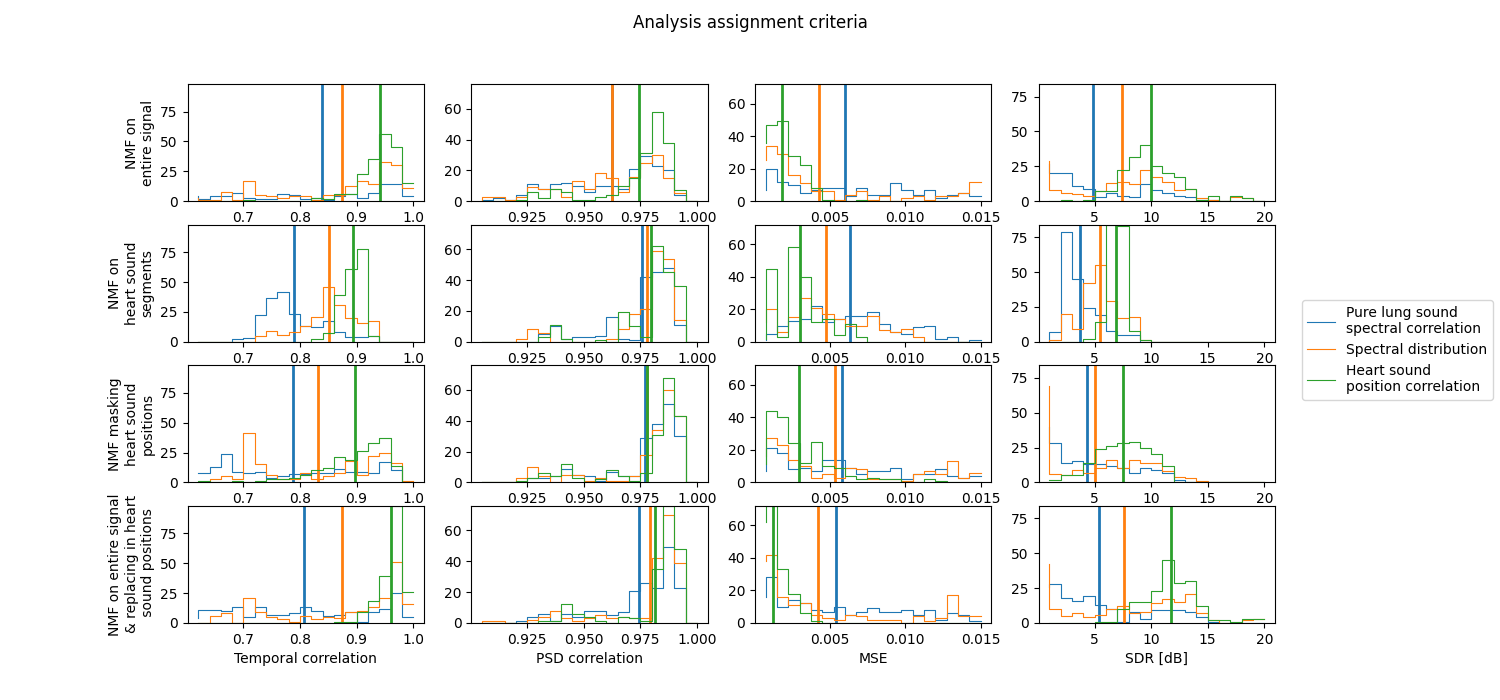

In [15]:
%matplotlib notebook
def hist_plots_decision(fig, ax, bins=40, linewidth=0.8):
    def _plot_hist(num, input_array, bins, axs, interval=None, label=None):
        hist, bin_edges = np.histogram(a=input_array, bins=bins, range=interval)
        bins_plot = [np.mean(bin_edges[i:i+2]) for i in range(len(bin_edges) - 1)]
        
        if label == 'spec_criterion':
            label_to = 'Spectral\ncorrelation'
        elif label == 'energy_criterion':
            label_to = 'Spectral\ndistribution'
        elif label == 'temp_criterion':
            label_to = 'Temporal\ncorrelation'
        elif label == 'vote':
            label_to = 'Voting'
        
        if label is None:
            axs.plot(bins_plot, hist, color=f'C{num}', linewidth=linewidth)
        else:
            axs.plot(bins_plot, hist, color=f'C{num}', label=label_to, linewidth=linewidth)
        
        return hist
    
    # Definición de las posibilidades de N
    dec_list = ('vote', 'spec_criterion', 'energy_criterion', 'temp_criterion')
    
    # Definición del límite máximo x para MSE y SDR
    max_mse_x_list = list()
    max_sdr_x_list = list()
    
    for dec in dec_list:
        max_mse_x_list.append(max(mse_all[dec]))
        max_mse_x_list.append(max(mse_seg[dec]))
        max_mse_x_list.append(max(mse_mask[dec]))
        max_mse_x_list.append(max(mse_repl[dec]))
        
        max_sdr_x_list.append(max(sdr_all[dec]))
        max_sdr_x_list.append(max(sdr_seg[dec]))
        max_sdr_x_list.append(max(sdr_mask[dec]))
        max_sdr_x_list.append(max(sdr_repl[dec]))
    
    max_mse_x = max(max_mse_x_list)
    max_sdr_x = max(max_sdr_x_list)
    
    # Definición del límite máximo y
    max_temp_y = 0
    max_spec_y = 0
    max_mse_y = 0
    max_sdr_y = 0
    
    # Lista para cada uno de los histogramas a realizar
    hist_dict = defaultdict(list)
    
    # Temporal correlation
    for num, dec in enumerate(dec_list):
        ####      Obtener los histogramas      ####
        # to_all
        hist_temp_all = _plot_hist(num, temp_all[dec], bins=bins, axs=ax[0][0], interval=(0,1), 
                                   label=dec)
        hist_spec_all = _plot_hist(num, spec_all[dec], bins=bins, axs=ax[0][1], interval=(0,1))
        hist_mse_all = _plot_hist(num, mse_all[dec], bins=bins, axs=ax[0][2], interval=(0, max_mse_x))
        hist_sdr_all = _plot_hist(num, sdr_all[dec], bins=bins, axs=ax[0][3], interval=(0, max_sdr_x))
        
        # on_segments
        hist_temp_seg = _plot_hist(num, temp_seg[dec], bins=bins, axs=ax[1][0], interval=(0,1))
        hist_spec_seg = _plot_hist(num, spec_seg[dec], bins=bins, axs=ax[1][1], interval=(0,1))
        hist_mse_seg = _plot_hist(num, mse_seg[dec], bins=bins, axs=ax[1][2], interval=(0, max_mse_x))
        hist_sdr_seg = _plot_hist(num, sdr_seg[dec], bins=bins, axs=ax[1][3], interval=(0, max_sdr_x))
        
        # masked_segments
        hist_temp_mask = _plot_hist(num, temp_mask[dec], bins=bins, axs=ax[2][0], interval=(0,1))
        hist_spec_mask = _plot_hist(num, spec_mask[dec], bins=bins, axs=ax[2][1], interval=(0,1))
        hist_mse_mask = _plot_hist(num, mse_mask[dec], bins=bins, axs=ax[2][2], interval=(0, max_mse_x))
        hist_sdr_mask = _plot_hist(num, sdr_mask[dec], bins=bins, axs=ax[2][3], interval=(0, max_sdr_x))
        
        # replaced_segments
        hist_temp_repl = _plot_hist(num, temp_repl[dec], bins=bins, axs=ax[3][0], interval=(0,1))
        hist_spec_repl = _plot_hist(num, spec_repl[dec], bins=bins, axs=ax[3][1], interval=(0,1))
        hist_mse_repl = _plot_hist(num, mse_repl[dec], bins=bins, axs=ax[3][2], interval=(0, max_mse_x))
        hist_sdr_repl = _plot_hist(num, sdr_repl[dec], bins=bins, axs=ax[3][3], interval=(0, max_sdr_x))
        
        # Máximos para los límites de los ejes y
        max_temp_y = max(max_temp_y, max(hist_temp_all), 
                         max(hist_temp_seg), max(hist_temp_mask),
                         max(hist_temp_repl)) 
        max_spec_y = max(max_spec_y, max(hist_spec_all), 
                         max(hist_spec_seg), max(hist_spec_mask),
                         max(hist_spec_repl))
        max_mse_y = max(max_mse_y, max(hist_mse_all), 
                        max(hist_mse_seg), max(hist_mse_mask),
                        max(hist_mse_repl))
        max_sdr_y = max(max_sdr_y, max(hist_sdr_all), 
                        max(hist_sdr_seg), max(hist_sdr_mask),
                        max(hist_sdr_repl))
        
        # Lista para cada uno de los histogramas a realizar
        hist_dict[(0, 0)].append(hist_temp_all)
        hist_dict[(0, 1)].append(hist_spec_all)
        hist_dict[(0, 2)].append(hist_mse_all)
        hist_dict[(0, 3)].append(hist_sdr_all)
        hist_dict[(1, 0)].append(hist_temp_seg)
        hist_dict[(1, 1)].append(hist_spec_seg)
        hist_dict[(1, 2)].append(hist_mse_seg)
        hist_dict[(1, 3)].append(hist_sdr_seg)
        hist_dict[(2, 0)].append(hist_temp_mask)
        hist_dict[(2, 1)].append(hist_spec_mask)
        hist_dict[(2, 2)].append(hist_mse_mask)
        hist_dict[(2, 3)].append(hist_sdr_mask)
        hist_dict[(3, 0)].append(hist_temp_repl)
        hist_dict[(3, 1)].append(hist_spec_repl)
        hist_dict[(3, 2)].append(hist_mse_repl)
        hist_dict[(3, 3)].append(hist_sdr_repl)
    
    for key in hist_dict.keys():
        # Obtener los índices de los máximos por cada bin
        max_indices = np.argmax(hist_dict[key], axis=0)
        
        # Definición de los bordes de los bins
        if key[1] == 2:
            bin_edges = np.linspace(0, max_mse_x, bins + 1)
        elif key[1] == 3:
            bin_edges = np.linspace(0, max_sdr_x, bins + 1)
        else:
            bin_edges = np.linspace(0, 1, bins + 1)
            
        for i in range(bins):
            ax[key[0], key[1]].axvspan(bin_edges[i], bin_edges[i + 1], 
                                       color=f'C{max_indices[i]}', alpha=0.1)
        
        
    # Seteando los ylabel
    ax[0][0].set_ylabel('NMF\nbase')
    ax[0][1].set_ylabel('')
    ax[0][2].set_ylabel('')
    ax[0][3].set_ylabel('')
    ax[1][0].set_ylabel('NMF on\nsegments')
    ax[1][1].set_ylabel('')
    ax[1][2].set_ylabel('')
    ax[1][3].set_ylabel('')
    ax[2][0].set_ylabel('NMF masked\nsegments')
    ax[2][1].set_ylabel('')
    ax[2][2].set_ylabel('')
    ax[2][3].set_ylabel('')
    ax[3][0].set_ylabel('NMF replaced\nsegments')
    ax[3][1].set_ylabel('')
    ax[3][2].set_ylabel('')
    ax[3][3].set_ylabel('')

    # Seteando los títulos
    ax[3][0].set_xlabel('Temporal\ncorrelation')
    ax[3][1].set_xlabel('Spectral\ncorrelation')
    ax[3][2].set_xlabel('MSE')
    ax[3][3].set_xlabel('SDR')

    # Seteando las leyendas
    fig.legend(loc='center right')
    
    # Ajustando los límites
    ax[0][0].set_ylim([0, max_temp_y])
    ax[1][0].set_ylim([0, max_temp_y])
    ax[2][0].set_ylim([0, max_temp_y])
    ax[3][0].set_ylim([0, max_temp_y])

    ax[0][1].set_ylim([0, max_spec_y])
    ax[1][1].set_ylim([0, max_spec_y])
    ax[2][1].set_ylim([0, max_spec_y])
    ax[3][1].set_ylim([0, max_spec_y])

    ax[0][2].set_ylim([0, max_mse_y])
    ax[1][2].set_ylim([0, max_mse_y])
    ax[2][2].set_ylim([0, max_mse_y])
    ax[3][2].set_ylim([0, max_mse_y])

    ax[0][3].set_ylim([0, max_sdr_y])
    ax[1][3].set_ylim([0, max_sdr_y])
    ax[2][3].set_ylim([0, max_sdr_y])
    ax[3][3].set_ylim([0, max_sdr_y])
    # Ajustando las etiquetas del eje
    fig.align_ylabels(ax[:])
    fig.subplots_adjust(right=0.91)
    fig.suptitle(r'Analysis clustering criteria with $N_{wind} = 2048$ and 90% overlap')
    
    plt.savefig('Images/criteria_analysis.pdf', transparent=True)
    plt.show()

    
def hist_plots_decision_spa(fig, ax, bins=40, linewidth=0.8):
    def _plot_hist(num, input_array, bins, axs, interval=None, label=None):
        hist, bin_edges = np.histogram(a=input_array, bins=bins, range=interval)
        bins_plot = [np.mean(bin_edges[i:i+2]) for i in range(len(bin_edges) - 1)]
        
        if label == 'spec_criterion':
            label_to = 'Correlación\nespectral'
        elif label == 'energy_criterion':
            label_to = 'Distribución\nespectral'
        elif label == 'temp_criterion':
            label_to = 'Correlación\ntemporal'
        elif label == 'vote':
            label_to = 'Votación'
        
        if label is None:
            axs.plot(bins_plot, hist, color=f'C{num}', linewidth=linewidth)
        else:
            axs.plot(bins_plot, hist, color=f'C{num}', label=label_to, linewidth=linewidth)
        
        return hist
    
    # Definición de las posibilidades de N
    dec_list = ('vote', 'spec_criterion', 'energy_criterion', 'temp_criterion')
    
    # Definición del límite máximo x para MSE y SDR
    max_mse_x_list = list()
    max_sdr_x_list = list()
    
    for dec in dec_list:
        max_mse_x_list.append(max(mse_all[dec]))
        max_mse_x_list.append(max(mse_seg[dec]))
        max_mse_x_list.append(max(mse_mask[dec]))
        max_mse_x_list.append(max(mse_repl[dec]))
        
        max_sdr_x_list.append(max(sdr_all[dec]))
        max_sdr_x_list.append(max(sdr_seg[dec]))
        max_sdr_x_list.append(max(sdr_mask[dec]))
        max_sdr_x_list.append(max(sdr_repl[dec]))
    
    max_mse_x = max(max_mse_x_list)
    max_sdr_x = max(max_sdr_x_list)
    
    # Definición del límite máximo y
    max_temp_y = 0
    max_spec_y = 0
    max_mse_y = 0
    max_sdr_y = 0
    
    # Lista para cada uno de los histogramas a realizar
    hist_dict = defaultdict(list)
    
    # Temporal correlation
    for num, dec in enumerate(dec_list):
        ####      Obtener los histogramas      ####
        # to_all
        hist_temp_all = _plot_hist(num, temp_all[dec], bins=bins, axs=ax[0][0], interval=(0,1), 
                                   label=dec)
        hist_spec_all = _plot_hist(num, spec_all[dec], bins=bins, axs=ax[0][1], interval=(0,1))
        hist_mse_all = _plot_hist(num, mse_all[dec], bins=bins, axs=ax[0][2], interval=(0, max_mse_x))
        hist_sdr_all = _plot_hist(num, sdr_all[dec], bins=bins, axs=ax[0][3], interval=(0, max_sdr_x))
        
        # on_segments
        hist_temp_seg = _plot_hist(num, temp_seg[dec], bins=bins, axs=ax[1][0], interval=(0,1))
        hist_spec_seg = _plot_hist(num, spec_seg[dec], bins=bins, axs=ax[1][1], interval=(0,1))
        hist_mse_seg = _plot_hist(num, mse_seg[dec], bins=bins, axs=ax[1][2], interval=(0, max_mse_x))
        hist_sdr_seg = _plot_hist(num, sdr_seg[dec], bins=bins, axs=ax[1][3], interval=(0, max_sdr_x))
        
        # masked_segments
        hist_temp_mask = _plot_hist(num, temp_mask[dec], bins=bins, axs=ax[2][0], interval=(0,1))
        hist_spec_mask = _plot_hist(num, spec_mask[dec], bins=bins, axs=ax[2][1], interval=(0,1))
        hist_mse_mask = _plot_hist(num, mse_mask[dec], bins=bins, axs=ax[2][2], interval=(0, max_mse_x))
        hist_sdr_mask = _plot_hist(num, sdr_mask[dec], bins=bins, axs=ax[2][3], interval=(0, max_sdr_x))
        
        # replaced_segments
        hist_temp_repl = _plot_hist(num, temp_repl[dec], bins=bins, axs=ax[3][0], interval=(0,1))
        hist_spec_repl = _plot_hist(num, spec_repl[dec], bins=bins, axs=ax[3][1], interval=(0,1))
        hist_mse_repl = _plot_hist(num, mse_repl[dec], bins=bins, axs=ax[3][2], interval=(0, max_mse_x))
        hist_sdr_repl = _plot_hist(num, sdr_repl[dec], bins=bins, axs=ax[3][3], interval=(0, max_sdr_x))
        
        # Máximos para los límites de los ejes y
        max_temp_y = max(max_temp_y, max(hist_temp_all), 
                         max(hist_temp_seg), max(hist_temp_mask),
                         max(hist_temp_repl)) 
        max_spec_y = max(max_spec_y, max(hist_spec_all), 
                         max(hist_spec_seg), max(hist_spec_mask),
                         max(hist_spec_repl))
        max_mse_y = max(max_mse_y, max(hist_mse_all), 
                        max(hist_mse_seg), max(hist_mse_mask),
                        max(hist_mse_repl))
        max_sdr_y = max(max_sdr_y, max(hist_sdr_all), 
                        max(hist_sdr_seg), max(hist_sdr_mask),
                        max(hist_sdr_repl))
        
        # Lista para cada uno de los histogramas a realizar
        hist_dict[(0, 0)].append(hist_temp_all)
        hist_dict[(0, 1)].append(hist_spec_all)
        hist_dict[(0, 2)].append(hist_mse_all)
        hist_dict[(0, 3)].append(hist_sdr_all)
        hist_dict[(1, 0)].append(hist_temp_seg)
        hist_dict[(1, 1)].append(hist_spec_seg)
        hist_dict[(1, 2)].append(hist_mse_seg)
        hist_dict[(1, 3)].append(hist_sdr_seg)
        hist_dict[(2, 0)].append(hist_temp_mask)
        hist_dict[(2, 1)].append(hist_spec_mask)
        hist_dict[(2, 2)].append(hist_mse_mask)
        hist_dict[(2, 3)].append(hist_sdr_mask)
        hist_dict[(3, 0)].append(hist_temp_repl)
        hist_dict[(3, 1)].append(hist_spec_repl)
        hist_dict[(3, 2)].append(hist_mse_repl)
        hist_dict[(3, 3)].append(hist_sdr_repl)
    
    for key in hist_dict.keys():
        # Obtener los índices de los máximos por cada bin
        max_indices = np.argmax(hist_dict[key], axis=0)
        
        # Definición de los bordes de los bins
        if key[1] == 2:
            bin_edges = np.linspace(0, max_mse_x, bins + 1)
        elif key[1] == 3:
            bin_edges = np.linspace(0, max_sdr_x, bins + 1)
        else:
            bin_edges = np.linspace(0, 1, bins + 1)
            
        for i in range(bins):
            ax[key[0], key[1]].axvspan(bin_edges[i], bin_edges[i + 1], 
                                       color=f'C{max_indices[i]}', alpha=0.1)
        
        
    # Seteando los ylabel
    ax[0][0].set_ylabel('NMF\nbase')
    ax[0][1].set_ylabel('')
    ax[0][2].set_ylabel('')
    ax[0][3].set_ylabel('')
    ax[1][0].set_ylabel('NMF sobre\nsegmentos')
    ax[1][1].set_ylabel('')
    ax[1][2].set_ylabel('')
    ax[1][3].set_ylabel('')
    ax[2][0].set_ylabel('NMF sobre\nseñal enmascarada')
    ax[2][1].set_ylabel('')
    ax[2][2].set_ylabel('')
    ax[2][3].set_ylabel('')
    ax[3][0].set_ylabel('NMF reemplazando\nsegmentos')
    ax[3][1].set_ylabel('')
    ax[3][2].set_ylabel('')
    ax[3][3].set_ylabel('')

    # Seteando los títulos
    ax[3][0].set_xlabel('Correlación\ntemporal')
    ax[3][1].set_xlabel('Correlación\nespectral')
    ax[3][2].set_xlabel('MSE')
    ax[3][3].set_xlabel('SDR')

    # Seteando las leyendas
    fig.legend(loc='center right')
    
    # Ajustando los límites
    ax[0][0].set_ylim([0, max_temp_y])
    ax[1][0].set_ylim([0, max_temp_y])
    ax[2][0].set_ylim([0, max_temp_y])
    ax[3][0].set_ylim([0, max_temp_y])

    ax[0][1].set_ylim([0, max_spec_y])
    ax[1][1].set_ylim([0, max_spec_y])
    ax[2][1].set_ylim([0, max_spec_y])
    ax[3][1].set_ylim([0, max_spec_y])

    ax[0][2].set_ylim([0, max_mse_y])
    ax[1][2].set_ylim([0, max_mse_y])
    ax[2][2].set_ylim([0, max_mse_y])
    ax[3][2].set_ylim([0, max_mse_y])

    ax[0][3].set_ylim([0, max_sdr_y])
    ax[1][3].set_ylim([0, max_sdr_y])
    ax[2][3].set_ylim([0, max_sdr_y])
    ax[3][3].set_ylim([0, max_sdr_y])
    # Ajustando las etiquetas del eje
    fig.align_ylabels(ax[:])
    fig.subplots_adjust(right=0.91)
    fig.suptitle(r'Análisis criterios de clasificación con $N_{wind} = 2048$ y traslape 90%')
    
    plt.savefig('Images/criteria_analysis_SPA.pdf', transparent=True)
    plt.show()


def hist_plots_decision_v2(fig, ax, bins=40, linewidth=0.8, corr_interval=(0.6, 1),
                           mse_interval=(0, 0.015), sdr_interval=(0, 20)):
    def _plot_hist(num, input_array, bins, axs, interval=None, label=None):
        hist, bin_edges = np.histogram(a=input_array, bins=bins, range=interval)
        bins_plot = [np.mean(bin_edges[i:i+2]) for i in range(len(bin_edges) - 1)]
        
        if label == 'spec_criterion':
            label_to = 'Pure lung sound\nspectral correlation'
        elif label == 'energy_criterion':
            label_to = 'Spectral distribution'
        elif label == 'temp_criterion':
            label_to = 'Temporal correlation\nwith heart sound'
        elif label == 'vote':
            label_to = 'Voting'
        
        if label is None:
            axs.step(bin_edges[1:], hist, color=f'C{num}', linewidth=linewidth)
        else:
            axs.step(bin_edges[1:], hist, color=f'C{num}', label=label_to, linewidth=linewidth)
        
        return hist
    
    
    # Definición de las posibilidades de N
    dec_list = ('vote', 'spec_criterion', 'energy_criterion', 'temp_criterion')
    
    if corr_interval is None:
        corr_interval = (0,1)
    
    if mse_interval is None:
        # Definición del límite máximo x para MSE
        max_mse_x_list = list()

        for dec in dec_list:
            max_mse_x_list.append(max(mse_all[dec]))
            max_mse_x_list.append(max(mse_seg[dec]))
            max_mse_x_list.append(max(mse_mask[dec]))
            max_mse_x_list.append(max(mse_repl[dec]))

        max_mse_x = max(max_mse_x_list)
        mse_interval = (0, max_mse_x)
        
    if sdr_interval is None:
        # Definición del límite máximo x para SDR
        max_sdr_x_list = list()

        for dec in dec_list:
            max_sdr_x_list.append(max(sdr_all[dec]))
            max_sdr_x_list.append(max(sdr_seg[dec]))
            max_sdr_x_list.append(max(sdr_mask[dec]))
            max_sdr_x_list.append(max(sdr_repl[dec]))

        max_sdr_x = max(max_sdr_x_list)
        sdr_interval = (0, max_sdr_x)
    
    
    # Definición del límite máximo y
    max_temp_y = 0
    max_spec_y = 0
    max_mse_y = 0
    max_sdr_y = 0
    
    # Lista para cada uno de los histogramas a realizar
    hist_dict = defaultdict(list)
    
    # Temporal correlation
    for num, dec in enumerate(dec_list):
        ####      Obtener los histogramas      ####
        # to_all
        hist_temp_all = _plot_hist(num, temp_all[dec], bins=bins, axs=ax[0][0], interval=corr_interval, 
                                   label=dec)
        hist_spec_all = _plot_hist(num, spec_all[dec], bins=bins, axs=ax[0][1], interval=corr_interval)
        hist_mse_all = _plot_hist(num, mse_all[dec], bins=bins, axs=ax[0][2], interval=mse_interval)
        hist_sdr_all = _plot_hist(num, sdr_all[dec], bins=bins, axs=ax[0][3], interval=sdr_interval)
        
        # on_segments
        hist_temp_seg = _plot_hist(num, temp_seg[dec], bins=bins, axs=ax[1][0], interval=corr_interval)
        hist_spec_seg = _plot_hist(num, spec_seg[dec], bins=bins, axs=ax[1][1], interval=corr_interval)
        hist_mse_seg = _plot_hist(num, mse_seg[dec], bins=bins, axs=ax[1][2], interval=mse_interval)
        hist_sdr_seg = _plot_hist(num, sdr_seg[dec], bins=bins, axs=ax[1][3], interval=sdr_interval)
        
        # masked_segments
        hist_temp_mask = _plot_hist(num, temp_mask[dec], bins=bins, axs=ax[2][0], interval=corr_interval)
        hist_spec_mask = _plot_hist(num, spec_mask[dec], bins=bins, axs=ax[2][1], interval=corr_interval)
        hist_mse_mask = _plot_hist(num, mse_mask[dec], bins=bins, axs=ax[2][2], interval=mse_interval)
        hist_sdr_mask = _plot_hist(num, sdr_mask[dec], bins=bins, axs=ax[2][3], interval=sdr_interval)
        
        # replaced_segments
        hist_temp_repl = _plot_hist(num, temp_repl[dec], bins=bins, axs=ax[3][0], interval=corr_interval)
        hist_spec_repl = _plot_hist(num, spec_repl[dec], bins=bins, axs=ax[3][1], interval=corr_interval)
        hist_mse_repl = _plot_hist(num, mse_repl[dec], bins=bins, axs=ax[3][2], interval=mse_interval)
        hist_sdr_repl = _plot_hist(num, sdr_repl[dec], bins=bins, axs=ax[3][3], interval=sdr_interval)
        
        # Máximos para los límites de los ejes y
        max_temp_y = max(max_temp_y, max(hist_temp_all), 
                         max(hist_temp_seg), max(hist_temp_mask),
                         max(hist_temp_repl)) 
        max_spec_y = max(max_spec_y, max(hist_spec_all), 
                         max(hist_spec_seg), max(hist_spec_mask),
                         max(hist_spec_repl))
        max_mse_y = max(max_mse_y, max(hist_mse_all), 
                        max(hist_mse_seg), max(hist_mse_mask),
                        max(hist_mse_repl))
        max_sdr_y = max(max_sdr_y, max(hist_sdr_all), 
                        max(hist_sdr_seg), max(hist_sdr_mask),
                        max(hist_sdr_repl))
        
        # Lista para cada uno de los histogramas a realizar
        hist_dict[(0, 0)].append(hist_temp_all)
        hist_dict[(0, 1)].append(hist_spec_all)
        hist_dict[(0, 2)].append(hist_mse_all)
        hist_dict[(0, 3)].append(hist_sdr_all)
        hist_dict[(1, 0)].append(hist_temp_seg)
        hist_dict[(1, 1)].append(hist_spec_seg)
        hist_dict[(1, 2)].append(hist_mse_seg)
        hist_dict[(1, 3)].append(hist_sdr_seg)
        hist_dict[(2, 0)].append(hist_temp_mask)
        hist_dict[(2, 1)].append(hist_spec_mask)
        hist_dict[(2, 2)].append(hist_mse_mask)
        hist_dict[(2, 3)].append(hist_sdr_mask)
        hist_dict[(3, 0)].append(hist_temp_repl)
        hist_dict[(3, 1)].append(hist_spec_repl)
        hist_dict[(3, 2)].append(hist_mse_repl)
        hist_dict[(3, 3)].append(hist_sdr_repl)
    
#     for key in hist_dict.keys():
#         # Obtener los índices de los máximos por cada bin
#         max_indices = np.argmax(hist_dict[key], axis=0)
        
#         # Definición de los bordes de los bins
#         if key[1] == 2:
#             bin_edges = np.linspace(0, max_mse_x, bins + 1)
#         elif key[1] == 3:
#             bin_edges = np.linspace(0, max_sdr_x, bins + 1)
#         else:
#             bin_edges = np.linspace(0, 1, bins + 1)
            
#         for i in range(bins):
#             ax[key[0], key[1]].axvspan(bin_edges[i], bin_edges[i + 1], 
#                                        color=f'C{max_indices[i]}', alpha=0.1)
        
        
    # Seteando los ylabel
    ax[0][0].set_ylabel('NMF on\nentire signal')
    ax[0][1].set_ylabel('')
    ax[0][2].set_ylabel('')
    ax[0][3].set_ylabel('')
    ax[1][0].set_ylabel('NMF on\nheart sound\nsegments')
    ax[1][1].set_ylabel('')
    ax[1][2].set_ylabel('')
    ax[1][3].set_ylabel('')
    ax[2][0].set_ylabel('NMF masking\nheart sound\npositions')
    ax[2][1].set_ylabel('')
    ax[2][2].set_ylabel('')
    ax[2][3].set_ylabel('')
    ax[3][0].set_ylabel('NMF on entire signal\n& replacing in heart\n sound positions')
    ax[3][1].set_ylabel('')
    ax[3][2].set_ylabel('')
    ax[3][3].set_ylabel('')

    # Seteando los títulos
    ax[3][0].set_xlabel('Temporal correlation')
    ax[3][1].set_xlabel('PSD correlation')
    ax[3][2].set_xlabel('MSE')
    ax[3][3].set_xlabel('SDR [dB]')

    # Seteando las leyendas
    fig.legend(loc='center right')
    
    # Ajustando los límites
    ax[0][0].set_ylim([0, max_temp_y])
    ax[1][0].set_ylim([0, max_temp_y])
    ax[2][0].set_ylim([0, max_temp_y])
    ax[3][0].set_ylim([0, max_temp_y])

    ax[0][1].set_ylim([0, max_spec_y])
    ax[1][1].set_ylim([0, max_spec_y])
    ax[2][1].set_ylim([0, max_spec_y])
    ax[3][1].set_ylim([0, max_spec_y])

    ax[0][2].set_ylim([0, max_mse_y])
    ax[1][2].set_ylim([0, max_mse_y])
    ax[2][2].set_ylim([0, max_mse_y])
    ax[3][2].set_ylim([0, max_mse_y])

    ax[0][3].set_ylim([0, max_sdr_y])
    ax[1][3].set_ylim([0, max_sdr_y])
    ax[2][3].set_ylim([0, max_sdr_y])
    ax[3][3].set_ylim([0, max_sdr_y])
    # Ajustando las etiquetas del eje
    fig.align_ylabels(ax[:])
    fig.subplots_adjust(right=0.85)
    fig.suptitle(r'Analysis assignment criteria')
    
    plt.savefig('Images/criteria_analysis_v2.pdf', transparent=True)
    plt.show()

    
def hist_plots_decision_v3(fig, ax, bins=40, linewidth=0.8, corr_interval=(0.6, 1),
                           psd_interval=(0.9, 1), mse_interval=(0, 0.015), 
                           sdr_interval=(0, 20)):
    def _plot_hist(num, input_array, bins, axs, interval=None, label=None):
        hist, bin_edges = np.histogram(a=input_array, bins=bins, range=interval)
        bins_plot = [np.mean(bin_edges[i:i+2]) for i in range(len(bin_edges) - 1)]
        
        if label == 'spec_criterion':
            label_to = 'Pure lung sound\nspectral correlation'
        elif label == 'energy_criterion':
            label_to = 'Spectral distribution'
        elif label == 'temp_criterion':
            label_to = 'Heart sound\nposition correlation'
        
        # Definición de las líneas de centro de masa
        mean_line = np.average(bins_plot, weights=hist)
        
        if label is None:
            axs.step(bin_edges[1:], hist, color=f'C{num}', linewidth=linewidth)
            axs.axvline(mean_line, color=f'C{num}', linewidth=2)
        else:
            axs.step(bin_edges[1:], hist, color=f'C{num}', label=label_to, linewidth=linewidth)
            axs.axvline(mean_line, color=f'C{num}', linewidth=2)
        
        return hist
    
    
    # Definición de las posibilidades de N
    dec_list = ('spec_criterion', 'energy_criterion', 'temp_criterion')
    
    if corr_interval is None:
        corr_interval = (0,1)
        
    if psd_interval is None:
        psd_interval = (0,1)
    
    if mse_interval is None:
        # Definición del límite máximo x para MSE
        max_mse_x_list = list()

        for dec in dec_list:
            max_mse_x_list.append(max(mse_all[dec]))
            max_mse_x_list.append(max(mse_seg[dec]))
            max_mse_x_list.append(max(mse_mask[dec]))
            max_mse_x_list.append(max(mse_repl[dec]))

        max_mse_x = max(max_mse_x_list)
        mse_interval = (0, max_mse_x)
        
    if sdr_interval is None:
        # Definición del límite máximo x para SDR
        max_sdr_x_list = list()

        for dec in dec_list:
            max_sdr_x_list.append(max(sdr_all[dec]))
            max_sdr_x_list.append(max(sdr_seg[dec]))
            max_sdr_x_list.append(max(sdr_mask[dec]))
            max_sdr_x_list.append(max(sdr_repl[dec]))

        max_sdr_x = max(max_sdr_x_list)
        sdr_interval = (0, max_sdr_x)
    
    
    # Definición del límite máximo y
    max_temp_y = 0
    max_spec_y = 0
    max_mse_y = 0
    max_sdr_y = 0
    
    # Lista para cada uno de los histogramas a realizar
    hist_dict = defaultdict(list)
    
    # Temporal correlation
    for num, dec in enumerate(dec_list):
        ####      Obtener los histogramas      ####
        # to_all
        hist_temp_all = _plot_hist(num, temp_all[dec], bins=bins, axs=ax[0][0], interval=corr_interval, 
                                   label=dec)
        hist_spec_all = _plot_hist(num, spec_all[dec], bins=bins, axs=ax[0][1], interval=psd_interval)
        hist_mse_all = _plot_hist(num, mse_all[dec], bins=bins, axs=ax[0][2], interval=mse_interval)
        hist_sdr_all = _plot_hist(num, sdr_all[dec], bins=bins, axs=ax[0][3], interval=sdr_interval)
        
        # on_segments
        hist_temp_seg = _plot_hist(num, temp_seg[dec], bins=bins, axs=ax[1][0], interval=corr_interval)
        hist_spec_seg = _plot_hist(num, spec_seg[dec], bins=bins, axs=ax[1][1], interval=psd_interval)
        hist_mse_seg = _plot_hist(num, mse_seg[dec], bins=bins, axs=ax[1][2], interval=mse_interval)
        hist_sdr_seg = _plot_hist(num, sdr_seg[dec], bins=bins, axs=ax[1][3], interval=sdr_interval)
        
        # masked_segments
        hist_temp_mask = _plot_hist(num, temp_mask[dec], bins=bins, axs=ax[2][0], interval=corr_interval)
        hist_spec_mask = _plot_hist(num, spec_mask[dec], bins=bins, axs=ax[2][1], interval=psd_interval)
        hist_mse_mask = _plot_hist(num, mse_mask[dec], bins=bins, axs=ax[2][2], interval=mse_interval)
        hist_sdr_mask = _plot_hist(num, sdr_mask[dec], bins=bins, axs=ax[2][3], interval=sdr_interval)
        
        # replaced_segments
        hist_temp_repl = _plot_hist(num, temp_repl[dec], bins=bins, axs=ax[3][0], interval=corr_interval)
        hist_spec_repl = _plot_hist(num, spec_repl[dec], bins=bins, axs=ax[3][1], interval=psd_interval)
        hist_mse_repl = _plot_hist(num, mse_repl[dec], bins=bins, axs=ax[3][2], interval=mse_interval)
        hist_sdr_repl = _plot_hist(num, sdr_repl[dec], bins=bins, axs=ax[3][3], interval=sdr_interval)
        
        # Máximos para los límites de los ejes y
        max_temp_y = max(max_temp_y, max(hist_temp_all), 
                         max(hist_temp_seg), max(hist_temp_mask),
                         max(hist_temp_repl)) 
        max_spec_y = max(max_spec_y, max(hist_spec_all), 
                         max(hist_spec_seg), max(hist_spec_mask),
                         max(hist_spec_repl))
        max_mse_y = max(max_mse_y, max(hist_mse_all), 
                        max(hist_mse_seg), max(hist_mse_mask),
                        max(hist_mse_repl))
        max_sdr_y = max(max_sdr_y, max(hist_sdr_all), 
                        max(hist_sdr_seg), max(hist_sdr_mask),
                        max(hist_sdr_repl))
        
        # Lista para cada uno de los histogramas a realizar
        hist_dict[(0, 0)].append(hist_temp_all)
        hist_dict[(0, 1)].append(hist_spec_all)
        hist_dict[(0, 2)].append(hist_mse_all)
        hist_dict[(0, 3)].append(hist_sdr_all)
        hist_dict[(1, 0)].append(hist_temp_seg)
        hist_dict[(1, 1)].append(hist_spec_seg)
        hist_dict[(1, 2)].append(hist_mse_seg)
        hist_dict[(1, 3)].append(hist_sdr_seg)
        hist_dict[(2, 0)].append(hist_temp_mask)
        hist_dict[(2, 1)].append(hist_spec_mask)
        hist_dict[(2, 2)].append(hist_mse_mask)
        hist_dict[(2, 3)].append(hist_sdr_mask)
        hist_dict[(3, 0)].append(hist_temp_repl)
        hist_dict[(3, 1)].append(hist_spec_repl)
        hist_dict[(3, 2)].append(hist_mse_repl)
        hist_dict[(3, 3)].append(hist_sdr_repl)
    
#     for key in hist_dict.keys():
#         # Obtener los índices de los máximos por cada bin
#         max_indices = np.argmax(hist_dict[key], axis=0)
        
#         # Definición de los bordes de los bins
#         if key[1] == 2:
#             bin_edges = np.linspace(0, max_mse_x, bins + 1)
#         elif key[1] == 3:
#             bin_edges = np.linspace(0, max_sdr_x, bins + 1)
#         else:
#             bin_edges = np.linspace(0, 1, bins + 1)
            
#         for i in range(bins):
#             ax[key[0], key[1]].axvspan(bin_edges[i], bin_edges[i + 1], 
#                                        color=f'C{max_indices[i]}', alpha=0.1)
        
        
    # Seteando los ylabel
    ax[0][0].set_ylabel('NMF on\nentire signal')
    ax[0][1].set_ylabel('')
    ax[0][2].set_ylabel('')
    ax[0][3].set_ylabel('')
    ax[1][0].set_ylabel('NMF on\nheart sound\nsegments')
    ax[1][1].set_ylabel('')
    ax[1][2].set_ylabel('')
    ax[1][3].set_ylabel('')
    ax[2][0].set_ylabel('NMF masking\nheart sound\npositions')
    ax[2][1].set_ylabel('')
    ax[2][2].set_ylabel('')
    ax[2][3].set_ylabel('')
    ax[3][0].set_ylabel('NMF on entire signal\n& replacing in heart\n sound positions')
    ax[3][1].set_ylabel('')
    ax[3][2].set_ylabel('')
    ax[3][3].set_ylabel('')

    # Seteando los títulos
    ax[3][0].set_xlabel('Temporal correlation')
    ax[3][1].set_xlabel('PSD correlation')
    ax[3][2].set_xlabel('MSE')
    ax[3][3].set_xlabel('SDR [dB]')

    # Seteando las leyendas
    fig.legend(loc='center right')
    
    # Ajustando los límites
    ax[0][0].set_ylim([0, max_temp_y])
    ax[1][0].set_ylim([0, max_temp_y])
    ax[2][0].set_ylim([0, max_temp_y])
    ax[3][0].set_ylim([0, max_temp_y])

    ax[0][1].set_ylim([0, max_spec_y])
    ax[1][1].set_ylim([0, max_spec_y])
    ax[2][1].set_ylim([0, max_spec_y])
    ax[3][1].set_ylim([0, max_spec_y])

    ax[0][2].set_ylim([0, max_mse_y])
    ax[1][2].set_ylim([0, max_mse_y])
    ax[2][2].set_ylim([0, max_mse_y])
    ax[3][2].set_ylim([0, max_mse_y])

    ax[0][3].set_ylim([0, max_sdr_y])
    ax[1][3].set_ylim([0, max_sdr_y])
    ax[2][3].set_ylim([0, max_sdr_y])
    ax[3][3].set_ylim([0, max_sdr_y])
    # Ajustando las etiquetas del eje
    fig.align_ylabels(ax[:])
    fig.subplots_adjust(right=0.85)
    fig.suptitle(r'Analysis assignment criteria')
    
    plt.savefig('Images/criteria_analysis_v3.pdf', transparent=True, bbox_inches='tight')
    plt.show()

    
    
# Función a ejecutar
fig, ax = plt.subplots(4, 4, figsize=(15,7), sharex=False)
# hist_plots_decision(fig, ax, bins=50)
# hist_plots_decision_v2(fig, ax, bins=20, corr_interval=(0.6, 1),
#                        mse_interval=(0, 0.015), sdr_interval=(0, 20))
hist_plots_decision_v3(fig, ax, bins=20, corr_interval=(0.6, 1), psd_interval=(0.9, 1),
                       mse_interval=(0, 0.015), sdr_interval=(0, 20))
# hist_plots_decision_spa(fig, ax, bins=50)

## Parámetro beta

In [62]:
def get_results(interest_parameter, nmf_method):
    with open(f'Results/Register_{nmf_method}.txt', 'r', encoding='utf8') as file:
        # Definición de los diccionarios que ordenarán los resultados para cada 
        # parámetro 
        temp_corr_dict = defaultdict(list)
        spec_corr_dict = defaultdict(list)
        mse_dict = defaultdict(list)
        sdr_dict = defaultdict(list)

        for line in file:
            # Obteniendo el diccionario de interés
            dict_to_rev = literal_eval(line.strip())
            
            if (not dict_to_rev['filter_parameters']['bool'] and
                dict_to_rev['N'] == 2048 and dict_to_rev['noverlap'] == int(0.9 * 2048) and
                dict_to_rev['dec_criteria'] == 'temp_criterion'):
                # Añadiendo información a los diccionarios en base a los criterios
                temp_corr_dict[dict_to_rev[interest_parameter]].extend(dict_to_rev['Temp'])
                spec_corr_dict[dict_to_rev[interest_parameter]].extend(dict_to_rev['Spec'])
                mse_dict[dict_to_rev[interest_parameter]].extend(dict_to_rev['MSE'])
                sdr_dict[dict_to_rev[interest_parameter]].extend(dict_to_rev['SDR'])
            
    return temp_corr_dict, spec_corr_dict, mse_dict, sdr_dict


# def get_results(interest_parameter, nmf_method):
#     with open(f'Results/Register_{nmf_method}.txt', 'r', encoding='utf8') as file:
#         # Definición de los diccionarios que ordenarán los resultados para cada 
#         # parámetro 
#         temp_corr_dict = defaultdict(list)
#         spec_corr_dict = defaultdict(list)
#         mse_dict = defaultdict(list)
#         sdr_dict = defaultdict(list)

#         for line in file:
#             # Obteniendo el diccionario de interés
#             dict_to_rev = literal_eval(line.strip())
            
#             if (not dict_to_rev['filter_parameters']['bool'] and
#                 dict_to_rev['N'] == 2048 and dict_to_rev['noverlap'] == int(0.9 * 2048)):
#                 # Añadiendo información a los diccionarios en base a los criterios
#                 temp_corr_dict[dict_to_rev[interest_parameter]].extend(dict_to_rev['Temp'])
#                 spec_corr_dict[dict_to_rev[interest_parameter]].extend(dict_to_rev['Spec'])
#                 mse_dict[dict_to_rev[interest_parameter]].extend(dict_to_rev['MSE'])
#                 sdr_dict[dict_to_rev[interest_parameter]].extend(dict_to_rev['SDR'])
            
#     return temp_corr_dict, spec_corr_dict, mse_dict, sdr_dict

In [16]:
interest_parameter = 'beta'

temp_all, spec_all, mse_all, sdr_all = \
        get_results(interest_parameter, nmf_method='to_all')
temp_seg, spec_seg, mse_seg, sdr_seg = \
        get_results(interest_parameter, nmf_method='on_segments')
temp_mask, spec_mask, mse_mask, sdr_mask = \
        get_results(interest_parameter, nmf_method='masked_segments')
temp_repl, spec_repl, mse_repl, sdr_repl = \
        get_results(interest_parameter, nmf_method='replace_segments')

print(len(temp_all[1]))

384


<IPython.core.display.Javascript object>


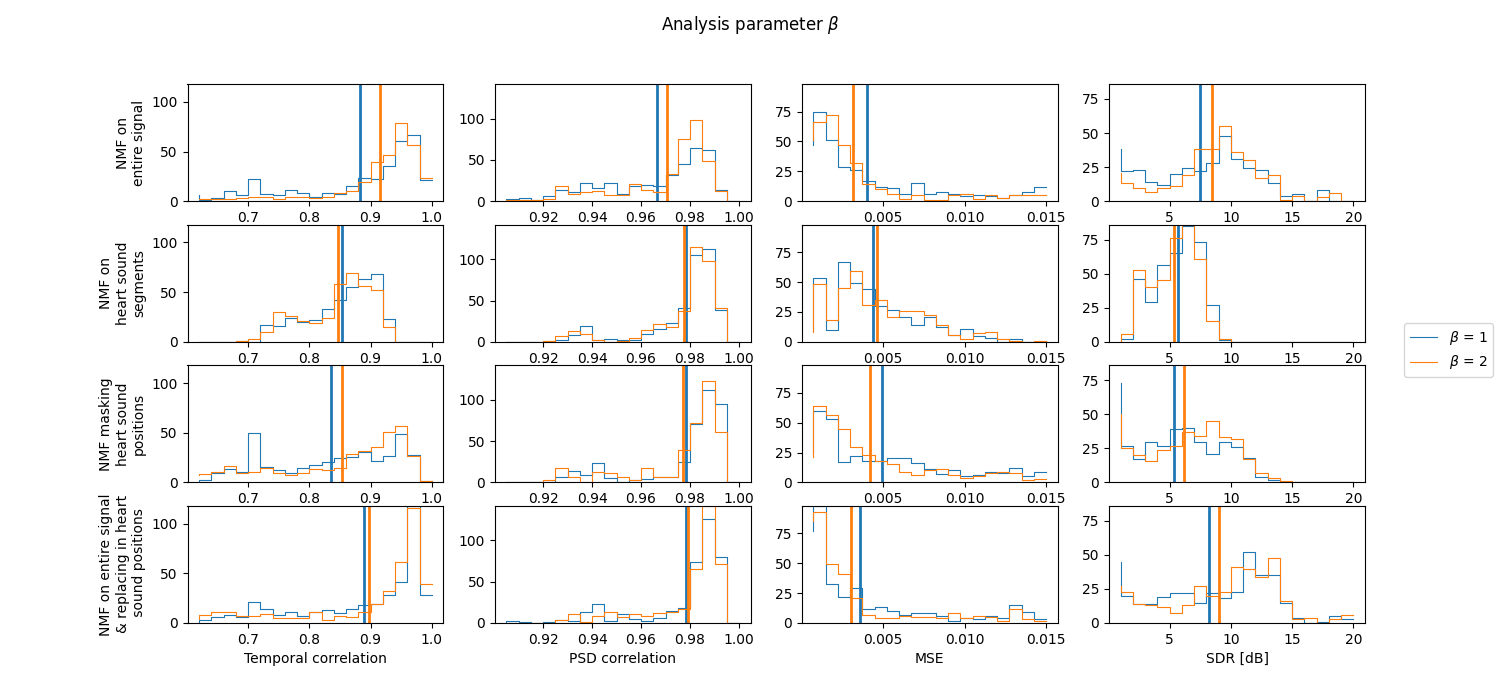

In [17]:
%matplotlib notebook
def density_plots_beta():
    fig, ax = plt.subplots(3, 4, figsize=(9,7), sharex=False)

    #### NMF BASE ####
    sns.kdeplot(temp_all[1], color='C0', label=r'$\beta = 1$',
                edgecolor='C0', fill=True, alpha=0.05, ax=ax[0][0])
    sns.kdeplot(temp_all[2], color='C1', label=r'$\beta = 2$',
                edgecolor='C1', fill=True, alpha=0.05, ax=ax[0][0])
    
    sns.kdeplot(spec_all[1], color='C0',
                edgecolor='C0', fill=True, alpha=0.05, ax=ax[0][1])
    sns.kdeplot(spec_all[2], color='C1',
                edgecolor='C1', fill=True, alpha=0.05, ax=ax[0][1])
    
    sns.kdeplot(mse_all[1], color='C0',
                edgecolor='C0', fill=True, alpha=0.05, ax=ax[0][2])
    sns.kdeplot(mse_all[2], color='C1',
                edgecolor='C1', fill=True, alpha=0.05, ax=ax[0][2])
    
    sns.kdeplot(sdr_all[1], color='C0',
                edgecolor='C0', fill=True, alpha=0.05, ax=ax[0][3])
    sns.kdeplot(sdr_all[2], color='C1',
                edgecolor='C1', fill=True, alpha=0.05, ax=ax[0][3])
    
    
    #### NMF on segments ####
    sns.kdeplot(temp_seg[1], color='C0',
                edgecolor='C0', fill=True, alpha=0.05, ax=ax[1][0])
    sns.kdeplot(temp_seg[2], color='C1',
              edgecolor='C1', fill=True, alpha=0.05, ax=ax[1][0])

    sns.kdeplot(spec_seg[1], color='C0',
              edgecolor='C0', fill=True, alpha=0.05, ax=ax[1][1])
    sns.kdeplot(spec_seg[2], color='C1',
              edgecolor='C1', fill=True, alpha=0.05, ax=ax[1][1])

    sns.kdeplot(mse_seg[1], color='C0',
              edgecolor='C0', fill=True, alpha=0.05, ax=ax[1][2])
    sns.kdeplot(mse_seg[2], color='C1',
              edgecolor='C1', fill=True, alpha=0.05, ax=ax[1][2])

    sns.kdeplot(sdr_seg[1], color='C0',
              edgecolor='C0', fill=True, alpha=0.05, ax=ax[1][3])
    sns.kdeplot(sdr_seg[2], color='C1',
              edgecolor='C1', fill=True, alpha=0.05, ax=ax[1][3])
    
    
    #### NMF masked segments ####
    sns.kdeplot(temp_mask[1], color='C0',
            edgecolor='C0', fill=True, alpha=0.05, ax=ax[2][0])
    sns.kdeplot(temp_mask[2], color='C1',
              edgecolor='C1', fill=True, alpha=0.05, ax=ax[2][0])

    sns.kdeplot(spec_mask[1], color='C0',
              edgecolor='C0', fill=True, alpha=0.05, ax=ax[2][1])
    sns.kdeplot(spec_mask[2], color='C1',
              edgecolor='C1', fill=True, alpha=0.05, ax=ax[2][1])

    sns.kdeplot(mse_mask[1], color='C0',
              edgecolor='C0', fill=True, alpha=0.05, ax=ax[2][2])
    sns.kdeplot(mse_mask[2], color='C1',
              edgecolor='C1', fill=True, alpha=0.05, ax=ax[2][2])

    sns.kdeplot(sdr_mask[1], color='C0',
              edgecolor='C0', fill=True, alpha=0.05, ax=ax[2][3])
    sns.kdeplot(sdr_mask[2], color='C1',
              edgecolor='C1', fill=True, alpha=0.05, ax=ax[2][3])



    # Seteando los ylabel
    ax[0][0].set_ylabel('NMF\nbase')
    ax[0][1].set_ylabel('')
    ax[0][2].set_ylabel('')
    ax[0][3].set_ylabel('')
    ax[1][0].set_ylabel('NMF on\nsegments')
    ax[1][1].set_ylabel('')
    ax[1][2].set_ylabel('')
    ax[1][3].set_ylabel('')
    ax[2][0].set_ylabel('NMF masked\nsegments')
    ax[2][1].set_ylabel('')
    ax[2][2].set_ylabel('')
    ax[2][3].set_ylabel('')

    # Seteando los títulos
    ax[2][0].set_xlabel('Temporal\ncorrelation')
    ax[2][1].set_xlabel('Spectral\ncorrelation')
    ax[2][2].set_xlabel('MSE')
    ax[2][3].set_xlabel('SDR')

    # Seteando las leyendas
    fig.legend(loc='center right')

    # Ajustando los límites
    ax[0][0].set_xlim([0.35, 1.06])
    ax[1][0].set_xlim([0.35, 1.06])
    ax[2][0].set_xlim([0.35, 1.06])

    ax[0][1].set_xlim([0.7, 1.03])
    ax[1][1].set_xlim([0.7, 1.03])
    ax[2][1].set_xlim([0.7, 1.03])

    ax[0][2].set_xlim([-0.006, 0.035])
    ax[1][2].set_xlim([-0.006, 0.035])
    ax[2][2].set_xlim([-0.006, 0.035])

    ax[0][3].set_xlim([-5, 25])
    ax[1][3].set_xlim([-5, 25])
    ax[2][3].set_xlim([-5, 25])

    # Ajustando las etiquetas del eje
    fig.align_ylabels(ax[:])
    fig.subplots_adjust(right=0.85)
    # Quitando el espacio entre gráficos
    # fig.subplots_adjust(wspace=0.1, hspace=0.1)
    plt.show()

    
def density_plots_beta_nofill():
    fig, ax = plt.subplots(3, 4, figsize=(15,7), sharex=False)

    #### NMF BASE ####
    sns.kdeplot(temp_all[1], color='C0', label=r'$\beta = 1$',
                fill=False, alpha=0.05, ax=ax[0][0])
    sns.kdeplot(temp_all[2], color='C1', label=r'$\beta = 2$',
                fill=False, alpha=0.05, ax=ax[0][0])
    
    sns.kdeplot(spec_all[1], color='C0',
                fill=False, alpha=0.05, ax=ax[0][1])
    sns.kdeplot(spec_all[2], color='C1',
                fill=False, alpha=0.05, ax=ax[0][1])
    
    sns.kdeplot(mse_all[1], color='C0',
                fill=False, alpha=0.05, ax=ax[0][2])
    sns.kdeplot(mse_all[2], color='C1',
                fill=False, alpha=0.05, ax=ax[0][2])
    
    sns.kdeplot(sdr_all[1], color='C0',
                fill=False, alpha=0.05, ax=ax[0][3])
    sns.kdeplot(sdr_all[2], color='C1',
                fill=False, alpha=0.05, ax=ax[0][3])
    
    
    #### NMF on segments ####
    sns.kdeplot(temp_seg[1], color='C0',
                fill=False, alpha=0.05, ax=ax[1][0])
    sns.kdeplot(temp_seg[2], color='C1',
              fill=False, alpha=0.05, ax=ax[1][0])

    sns.kdeplot(spec_seg[1], color='C0',
              fill=False, alpha=0.05, ax=ax[1][1])
    sns.kdeplot(spec_seg[2], color='C1',
              fill=False, alpha=0.05, ax=ax[1][1])

    sns.kdeplot(mse_seg[1], color='C0',
              fill=False, alpha=0.05, ax=ax[1][2])
    sns.kdeplot(mse_seg[2], color='C1',
              fill=False, alpha=0.05, ax=ax[1][2])

    sns.kdeplot(sdr_seg[1], color='C0',
              fill=False, alpha=0.05, ax=ax[1][3])
    sns.kdeplot(sdr_seg[2], color='C1',
              fill=False, alpha=0.05, ax=ax[1][3])
    
    
    #### NMF masked segments ####
    sns.kdeplot(temp_mask[1], color='C0',
            fill=False, alpha=0.05, ax=ax[2][0])
    sns.kdeplot(temp_mask[2], color='C1',
              fill=False, alpha=0.05, ax=ax[2][0])

    sns.kdeplot(spec_mask[1], color='C0',
              fill=False, alpha=0.05, ax=ax[2][1])
    sns.kdeplot(spec_mask[2], color='C1',
              fill=False, alpha=0.05, ax=ax[2][1])

    sns.kdeplot(mse_mask[1], color='C0',
              fill=False, alpha=0.05, ax=ax[2][2])
    sns.kdeplot(mse_mask[2], color='C1',
              fill=False, alpha=0.05, ax=ax[2][2])

    sns.kdeplot(sdr_mask[1], color='C0',
              fill=False, alpha=0.05, ax=ax[2][3])
    sns.kdeplot(sdr_mask[2], color='C1',
              fill=False, alpha=0.05, ax=ax[2][3])



    # Seteando los ylabel
    ax[0][0].set_ylabel('NMF\nbase')
    ax[0][1].set_ylabel('')
    ax[0][2].set_ylabel('')
    ax[0][3].set_ylabel('')
    ax[1][0].set_ylabel('NMF on\nsegments')
    ax[1][1].set_ylabel('')
    ax[1][2].set_ylabel('')
    ax[1][3].set_ylabel('')
    ax[2][0].set_ylabel('NMF masked\nsegments')
    ax[2][1].set_ylabel('')
    ax[2][2].set_ylabel('')
    ax[2][3].set_ylabel('')

    # Seteando los títulos
    ax[2][0].set_xlabel('Temporal\ncorrelation')
    ax[2][1].set_xlabel('Spectral\ncorrelation')
    ax[2][2].set_xlabel('MSE')
    ax[2][3].set_xlabel('SDR')

    # Seteando las leyendas
    fig.legend(loc='center right')

    # Ajustando los límites
    ax[0][0].set_xlim([0.35, 1.06])
    ax[1][0].set_xlim([0.35, 1.06])
    ax[2][0].set_xlim([0.35, 1.06])
    ax[0][0].set_ylim([0, 10])
    ax[1][0].set_ylim([0, 10])
    ax[2][0].set_ylim([0, 10])

    ax[0][1].set_xlim([0.7, 1.03])
    ax[1][1].set_xlim([0.7, 1.03])
    ax[2][1].set_xlim([0.7, 1.03])
    ax[0][1].set_ylim([0, 45])
    ax[1][1].set_ylim([0, 45])
    ax[2][1].set_ylim([0, 45])

    ax[0][2].set_xlim([-0.006, 0.035])
    ax[1][2].set_xlim([-0.006, 0.035])
    ax[2][2].set_xlim([-0.006, 0.035])
    ax[0][2].set_ylim([0, 260])
    ax[1][2].set_ylim([0, 260])
    ax[2][2].set_ylim([0, 260])

    ax[0][3].set_xlim([-5, 25])
    ax[1][3].set_xlim([-5, 25])
    ax[2][3].set_xlim([-5, 25])
    ax[0][3].set_ylim([0, 0.31])
    ax[1][3].set_ylim([0, 0.31])
    ax[2][3].set_ylim([0, 0.31])

    # Ajustando las etiquetas del eje
    fig.align_ylabels(ax[:])
    fig.subplots_adjust(right=0.91)
    fig.suptitle(r'Análisis de métricas parámetro $\beta$')
    
    plt.savefig('Images/beta_analysis.pdf', transparent=True)
    plt.show()


def hist_plots_beta(fig, ax, bins=40, linewidth=1):
    def _plot_hist(num, input_array, bins, axs, interval=None, label=None):
        hist, bin_edges = np.histogram(a=input_array, bins=bins, range=interval)
        bins_plot = [np.mean(bin_edges[i:i+2]) for i in range(len(bin_edges) - 1)]
        
        if label is None:
            axs.plot(bins_plot, hist, color=f'C{num}', linewidth=linewidth)
        else:
            axs.plot(bins_plot, hist, color=f'C{num}', label=label, linewidth=linewidth)
        
        return hist
    
    # Definición de las posibilidades de N
    beta_list = (1, 2)
    
    # Definición del límite máximo x para MSE y SDR
    max_mse_x_list = list()
    max_sdr_x_list = list()
    
    for beta in beta_list:
        max_mse_x_list.append(max(mse_all[beta]))
        max_mse_x_list.append(max(mse_seg[beta]))
        max_mse_x_list.append(max(mse_mask[beta]))
        max_mse_x_list.append(max(mse_repl[beta]))
        
        max_sdr_x_list.append(max(sdr_all[beta]))
        max_sdr_x_list.append(max(sdr_seg[beta]))
        max_sdr_x_list.append(max(sdr_mask[beta]))
        max_sdr_x_list.append(max(sdr_repl[beta]))
    
    max_mse_x = max(max_mse_x_list)
    max_sdr_x = max(max_sdr_x_list)
    
    # Definición del límite máximo y
    max_temp_y = 0
    max_spec_y = 0
    max_mse_y = 0
    max_sdr_y = 0
    
    # Lista para cada uno de los histogramas a realizar
    hist_dict = defaultdict(list)
    
    # Temporal correlation
    for num, beta in enumerate(beta_list):
        ####      Obtener los histogramas      ####
        # to_all
        hist_temp_all = _plot_hist(num, temp_all[beta], bins=bins, axs=ax[0][0], interval=(0,1), 
                                   label=r'$\beta$ = ' + str(beta))
        hist_spec_all = _plot_hist(num, spec_all[beta], bins=bins, axs=ax[0][1], interval=(0,1))
        hist_mse_all = _plot_hist(num, mse_all[beta], bins=bins, axs=ax[0][2], interval=(0, max_mse_x))
        hist_sdr_all = _plot_hist(num, sdr_all[beta], bins=bins, axs=ax[0][3], interval=(0, max_sdr_x))
        
        # on_segments
        hist_temp_seg = _plot_hist(num, temp_seg[beta], bins=bins, axs=ax[1][0], interval=(0,1))
        hist_spec_seg = _plot_hist(num, spec_seg[beta], bins=bins, axs=ax[1][1], interval=(0,1))
        hist_mse_seg = _plot_hist(num, mse_seg[beta], bins=bins, axs=ax[1][2], interval=(0, max_mse_x))
        hist_sdr_seg = _plot_hist(num, sdr_seg[beta], bins=bins, axs=ax[1][3], interval=(0, max_sdr_x))
        
        # masked_segments
        hist_temp_mask = _plot_hist(num, temp_mask[beta], bins=bins, axs=ax[2][0], interval=(0,1))
        hist_spec_mask = _plot_hist(num, spec_mask[beta], bins=bins, axs=ax[2][1], interval=(0,1))
        hist_mse_mask = _plot_hist(num, mse_mask[beta], bins=bins, axs=ax[2][2], interval=(0, max_mse_x))
        hist_sdr_mask = _plot_hist(num, sdr_mask[beta], bins=bins, axs=ax[2][3], interval=(0, max_sdr_x))
        
        # replace_segments
        hist_temp_repl = _plot_hist(num, temp_repl[beta], bins=bins, axs=ax[3][0], interval=(0,1))
        hist_spec_repl = _plot_hist(num, spec_repl[beta], bins=bins, axs=ax[3][1], interval=(0,1))
        hist_mse_repl = _plot_hist(num, mse_repl[beta], bins=bins, axs=ax[3][2], interval=(0, max_mse_x))
        hist_sdr_repl = _plot_hist(num, sdr_repl[beta], bins=bins, axs=ax[3][3], interval=(0, max_sdr_x))
        
        # Máximos para los límites de los ejes y
        max_temp_y = max(max_temp_y, max(hist_temp_all), 
                         max(hist_temp_seg), max(hist_temp_mask),
                         max(hist_temp_repl)) 
        max_spec_y = max(max_spec_y, max(hist_spec_all), 
                         max(hist_spec_seg), max(hist_spec_mask),
                         max(hist_spec_repl))
        max_mse_y = max(max_mse_y, max(hist_mse_all), 
                        max(hist_mse_seg), max(hist_mse_mask),
                        max(hist_mse_repl))
        max_sdr_y = max(max_sdr_y, max(hist_sdr_all), 
                        max(hist_sdr_seg), max(hist_sdr_mask),
                        max(hist_sdr_repl))
        
        # Lista para cada uno de los histogramas a realizar
        hist_dict[(0, 0)].append(hist_temp_all)
        hist_dict[(0, 1)].append(hist_spec_all)
        hist_dict[(0, 2)].append(hist_mse_all)
        hist_dict[(0, 3)].append(hist_sdr_all)
        hist_dict[(1, 0)].append(hist_temp_seg)
        hist_dict[(1, 1)].append(hist_spec_seg)
        hist_dict[(1, 2)].append(hist_mse_seg)
        hist_dict[(1, 3)].append(hist_sdr_seg)
        hist_dict[(2, 0)].append(hist_temp_mask)
        hist_dict[(2, 1)].append(hist_spec_mask)
        hist_dict[(2, 2)].append(hist_mse_mask)
        hist_dict[(2, 3)].append(hist_sdr_mask)
        hist_dict[(3, 0)].append(hist_temp_repl)
        hist_dict[(3, 1)].append(hist_spec_repl)
        hist_dict[(3, 2)].append(hist_mse_repl)
        hist_dict[(3, 3)].append(hist_sdr_repl)
    
    for key in hist_dict.keys():
        # Obtener los índices de los máximos por cada bin
        max_indices = np.argmax(hist_dict[key], axis=0)
        
        # Definición de los bordes de los bins
        if key[1] == 2:
            bin_edges = np.linspace(0, max_mse_x, bins + 1)
        elif key[1] == 3:
            bin_edges = np.linspace(0, max_sdr_x, bins + 1)
        else:
            bin_edges = np.linspace(0, 1, bins + 1)
            
        for i in range(bins):
            ax[key[0], key[1]].axvspan(bin_edges[i], bin_edges[i + 1], 
                                       color=f'C{max_indices[i]}', alpha=0.1)
        
        
    # Seteando los ylabel
    ax[0][0].set_ylabel('NMF\nbase')
    ax[0][1].set_ylabel('')
    ax[0][2].set_ylabel('')
    ax[0][3].set_ylabel('')
    ax[1][0].set_ylabel('NMF on\nsegments')
    ax[1][1].set_ylabel('')
    ax[1][2].set_ylabel('')
    ax[1][3].set_ylabel('')
    ax[2][0].set_ylabel('NMF masked\nsegments')
    ax[2][1].set_ylabel('')
    ax[2][2].set_ylabel('')
    ax[2][3].set_ylabel('')
    ax[3][0].set_ylabel('NMF replaced\nsegments')
    ax[3][1].set_ylabel('')
    ax[3][2].set_ylabel('')
    ax[3][3].set_ylabel('')

    # Seteando los títulos
    ax[3][0].set_xlabel('Temporal\ncorrelation')
    ax[3][1].set_xlabel('Spectral\ncorrelation')
    ax[3][2].set_xlabel('MSE')
    ax[3][3].set_xlabel('SDR')

    # Seteando las leyendas
    fig.legend(loc='center right')
    
    # Ajustando los límites
    ax[0][0].set_ylim([0, max_temp_y])
    ax[1][0].set_ylim([0, max_temp_y])
    ax[2][0].set_ylim([0, max_temp_y])
    ax[3][0].set_ylim([0, max_temp_y])

    ax[0][1].set_ylim([0, max_spec_y])
    ax[1][1].set_ylim([0, max_spec_y])
    ax[2][1].set_ylim([0, max_spec_y])
    ax[3][1].set_ylim([0, max_spec_y])

    ax[0][2].set_ylim([0, max_mse_y])
    ax[1][2].set_ylim([0, max_mse_y])
    ax[2][2].set_ylim([0, max_mse_y])
    ax[3][2].set_ylim([0, max_mse_y])

    ax[0][3].set_ylim([0, max_sdr_y])
    ax[1][3].set_ylim([0, max_sdr_y])
    ax[2][3].set_ylim([0, max_sdr_y])
    ax[3][3].set_ylim([0, max_sdr_y])

    # Ajustando las etiquetas del eje
    fig.align_ylabels(ax[:])
    fig.subplots_adjust(right=0.91)
    fig.suptitle(r'Analysis parameter $\beta$')
    
    plt.savefig('Images/beta_analysis.pdf', transparent=True)
    plt.show()

    
def hist_plots_beta_spa(fig, ax, bins=40, linewidth=1):
    def _plot_hist(num, input_array, bins, axs, interval=None, label=None):
        hist, bin_edges = np.histogram(a=input_array, bins=bins, range=interval)
        bins_plot = [np.mean(bin_edges[i:i+2]) for i in range(len(bin_edges) - 1)]
        
        if label is None:
            axs.plot(bins_plot, hist, color=f'C{num}', linewidth=linewidth)
        else:
            axs.plot(bins_plot, hist, color=f'C{num}', label=label, linewidth=linewidth)
        
        return hist
    
    # Definición de las posibilidades de N
    beta_list = (1, 2)
    
    # Definición del límite máximo x para MSE y SDR
    max_mse_x_list = list()
    max_sdr_x_list = list()
    
    for beta in beta_list:
        max_mse_x_list.append(max(mse_all[beta]))
        max_mse_x_list.append(max(mse_seg[beta]))
        max_mse_x_list.append(max(mse_mask[beta]))
        max_mse_x_list.append(max(mse_repl[beta]))
        
        max_sdr_x_list.append(max(sdr_all[beta]))
        max_sdr_x_list.append(max(sdr_seg[beta]))
        max_sdr_x_list.append(max(sdr_mask[beta]))
        max_sdr_x_list.append(max(sdr_repl[beta]))
    
    max_mse_x = max(max_mse_x_list)
    max_sdr_x = max(max_sdr_x_list)
    
    # Definición del límite máximo y
    max_temp_y = 0
    max_spec_y = 0
    max_mse_y = 0
    max_sdr_y = 0
    
    # Lista para cada uno de los histogramas a realizar
    hist_dict = defaultdict(list)
    
    # Temporal correlation
    for num, beta in enumerate(beta_list):
        ####      Obtener los histogramas      ####
        # to_all
        hist_temp_all = _plot_hist(num, temp_all[beta], bins=bins, axs=ax[0][0], interval=(0,1), 
                                   label=r'$\beta$ = ' + str(beta))
        hist_spec_all = _plot_hist(num, spec_all[beta], bins=bins, axs=ax[0][1], interval=(0,1))
        hist_mse_all = _plot_hist(num, mse_all[beta], bins=bins, axs=ax[0][2], interval=(0, max_mse_x))
        hist_sdr_all = _plot_hist(num, sdr_all[beta], bins=bins, axs=ax[0][3], interval=(0, max_sdr_x))
        
        # on_segments
        hist_temp_seg = _plot_hist(num, temp_seg[beta], bins=bins, axs=ax[1][0], interval=(0,1))
        hist_spec_seg = _plot_hist(num, spec_seg[beta], bins=bins, axs=ax[1][1], interval=(0,1))
        hist_mse_seg = _plot_hist(num, mse_seg[beta], bins=bins, axs=ax[1][2], interval=(0, max_mse_x))
        hist_sdr_seg = _plot_hist(num, sdr_seg[beta], bins=bins, axs=ax[1][3], interval=(0, max_sdr_x))
        
        # masked_segments
        hist_temp_mask = _plot_hist(num, temp_mask[beta], bins=bins, axs=ax[2][0], interval=(0,1))
        hist_spec_mask = _plot_hist(num, spec_mask[beta], bins=bins, axs=ax[2][1], interval=(0,1))
        hist_mse_mask = _plot_hist(num, mse_mask[beta], bins=bins, axs=ax[2][2], interval=(0, max_mse_x))
        hist_sdr_mask = _plot_hist(num, sdr_mask[beta], bins=bins, axs=ax[2][3], interval=(0, max_sdr_x))
        
        # replace_segments
        hist_temp_repl = _plot_hist(num, temp_repl[beta], bins=bins, axs=ax[3][0], interval=(0,1))
        hist_spec_repl = _plot_hist(num, spec_repl[beta], bins=bins, axs=ax[3][1], interval=(0,1))
        hist_mse_repl = _plot_hist(num, mse_repl[beta], bins=bins, axs=ax[3][2], interval=(0, max_mse_x))
        hist_sdr_repl = _plot_hist(num, sdr_repl[beta], bins=bins, axs=ax[3][3], interval=(0, max_sdr_x))
        
        # Máximos para los límites de los ejes y
        max_temp_y = max(max_temp_y, max(hist_temp_all), 
                         max(hist_temp_seg), max(hist_temp_mask),
                         max(hist_temp_repl)) 
        max_spec_y = max(max_spec_y, max(hist_spec_all), 
                         max(hist_spec_seg), max(hist_spec_mask),
                         max(hist_spec_repl))
        max_mse_y = max(max_mse_y, max(hist_mse_all), 
                        max(hist_mse_seg), max(hist_mse_mask),
                        max(hist_mse_repl))
        max_sdr_y = max(max_sdr_y, max(hist_sdr_all), 
                        max(hist_sdr_seg), max(hist_sdr_mask),
                        max(hist_sdr_repl))
        
        # Lista para cada uno de los histogramas a realizar
        hist_dict[(0, 0)].append(hist_temp_all)
        hist_dict[(0, 1)].append(hist_spec_all)
        hist_dict[(0, 2)].append(hist_mse_all)
        hist_dict[(0, 3)].append(hist_sdr_all)
        hist_dict[(1, 0)].append(hist_temp_seg)
        hist_dict[(1, 1)].append(hist_spec_seg)
        hist_dict[(1, 2)].append(hist_mse_seg)
        hist_dict[(1, 3)].append(hist_sdr_seg)
        hist_dict[(2, 0)].append(hist_temp_mask)
        hist_dict[(2, 1)].append(hist_spec_mask)
        hist_dict[(2, 2)].append(hist_mse_mask)
        hist_dict[(2, 3)].append(hist_sdr_mask)
        hist_dict[(3, 0)].append(hist_temp_repl)
        hist_dict[(3, 1)].append(hist_spec_repl)
        hist_dict[(3, 2)].append(hist_mse_repl)
        hist_dict[(3, 3)].append(hist_sdr_repl)
    
    for key in hist_dict.keys():
        # Obtener los índices de los máximos por cada bin
        max_indices = np.argmax(hist_dict[key], axis=0)
        
        # Definición de los bordes de los bins
        if key[1] == 2:
            bin_edges = np.linspace(0, max_mse_x, bins + 1)
        elif key[1] == 3:
            bin_edges = np.linspace(0, max_sdr_x, bins + 1)
        else:
            bin_edges = np.linspace(0, 1, bins + 1)
            
        for i in range(bins):
            ax[key[0], key[1]].axvspan(bin_edges[i], bin_edges[i + 1], 
                                       color=f'C{max_indices[i]}', alpha=0.1)
        
    # Seteando los ylabel
    ax[0][0].set_ylabel('NMF\nbase')
    ax[0][1].set_ylabel('')
    ax[0][2].set_ylabel('')
    ax[0][3].set_ylabel('')
    ax[1][0].set_ylabel('NMF sobre\nsegmentos')
    ax[1][1].set_ylabel('')
    ax[1][2].set_ylabel('')
    ax[1][3].set_ylabel('')
    ax[2][0].set_ylabel('NMF sobre\nseñal enmascarada')
    ax[2][1].set_ylabel('')
    ax[2][2].set_ylabel('')
    ax[2][3].set_ylabel('')
    ax[3][0].set_ylabel('NMF reemplazando\nsegmentos')
    ax[3][1].set_ylabel('')
    ax[3][2].set_ylabel('')
    ax[3][3].set_ylabel('')

    # Seteando los títulos
    ax[3][0].set_xlabel('Correlación\ntemporal')
    ax[3][1].set_xlabel('Correlación\nespectral')
    ax[3][2].set_xlabel('MSE')
    ax[3][3].set_xlabel('SDR')

    # Seteando las leyendas
    fig.legend(loc='center right')
    
    # Ajustando los límites
    ax[0][0].set_ylim([0, max_temp_y])
    ax[1][0].set_ylim([0, max_temp_y])
    ax[2][0].set_ylim([0, max_temp_y])
    ax[3][0].set_ylim([0, max_temp_y])

    ax[0][1].set_ylim([0, max_spec_y])
    ax[1][1].set_ylim([0, max_spec_y])
    ax[2][1].set_ylim([0, max_spec_y])
    ax[3][1].set_ylim([0, max_spec_y])

    ax[0][2].set_ylim([0, max_mse_y])
    ax[1][2].set_ylim([0, max_mse_y])
    ax[2][2].set_ylim([0, max_mse_y])
    ax[3][2].set_ylim([0, max_mse_y])

    ax[0][3].set_ylim([0, max_sdr_y])
    ax[1][3].set_ylim([0, max_sdr_y])
    ax[2][3].set_ylim([0, max_sdr_y])
    ax[3][3].set_ylim([0, max_sdr_y])

    # Ajustando las etiquetas del eje
    fig.align_ylabels(ax[:])
    fig.subplots_adjust(right=0.91)
    fig.suptitle(r'Análisis parámetro $\beta$')
    
    plt.savefig('Images/beta_analysis_SPA.pdf', transparent=True)
    plt.show()

    
def hist_plots_beta_def(fig, ax, bins=40, linewidth=1):
    def _plot_hist(num, input_array, bins, axs, interval=None, label=None):
        hist, bin_edges = np.histogram(a=input_array, bins=bins, range=interval)
        bins_plot = [np.mean(bin_edges[i:i+2]) for i in range(len(bin_edges) - 1)]
        
        if label is None:
            axs.plot(bins_plot, hist, color=f'C{num}', linewidth=linewidth)
        else:
            axs.plot(bins_plot, hist, color=f'C{num}', label=label, linewidth=linewidth)
        
        return hist
    
    # Definición de las posibilidades de N
    beta_list = (1, 2)
    
    # Definición del límite máximo x para MSE y SDR
    max_mse_x_list = list()
    max_sdr_x_list = list()
    
    for beta in beta_list:
        max_mse_x_list.append(max(mse_all[beta]))
        max_mse_x_list.append(max(mse_seg[beta]))
        max_mse_x_list.append(max(mse_mask[beta]))
        max_mse_x_list.append(max(mse_repl[beta]))
        
        max_sdr_x_list.append(max(sdr_all[beta]))
        max_sdr_x_list.append(max(sdr_seg[beta]))
        max_sdr_x_list.append(max(sdr_mask[beta]))
        max_sdr_x_list.append(max(sdr_repl[beta]))
    
    max_mse_x = max(max_mse_x_list)
    max_sdr_x = max(max_sdr_x_list)
    
    # Definición del límite máximo y
    max_temp_y = 0
    max_spec_y = 0
    max_mse_y = 0
    max_sdr_y = 0
    
    # Lista para cada uno de los histogramas a realizar
    hist_dict = defaultdict(list)
    
    # Temporal correlation
    for num, beta in enumerate(beta_list):
        ####      Obtener los histogramas      ####
        # to_all
        hist_temp_all = _plot_hist(num, temp_all[beta], bins=bins, axs=ax[0][0], interval=(0,1), 
                                   label=r'$\beta$ = ' + str(beta))
        hist_spec_all = _plot_hist(num, spec_all[beta], bins=bins, axs=ax[0][1], interval=(0,1))
        hist_mse_all = _plot_hist(num, mse_all[beta], bins=bins, axs=ax[0][2], interval=(0, max_mse_x))
        hist_sdr_all = _plot_hist(num, sdr_all[beta], bins=bins, axs=ax[0][3], interval=(0, max_sdr_x))
        
        # on_segments
        hist_temp_seg = _plot_hist(num, temp_seg[beta], bins=bins, axs=ax[1][0], interval=(0,1))
        hist_spec_seg = _plot_hist(num, spec_seg[beta], bins=bins, axs=ax[1][1], interval=(0,1))
        hist_mse_seg = _plot_hist(num, mse_seg[beta], bins=bins, axs=ax[1][2], interval=(0, max_mse_x))
        hist_sdr_seg = _plot_hist(num, sdr_seg[beta], bins=bins, axs=ax[1][3], interval=(0, max_sdr_x))
        
        # masked_segments
        hist_temp_mask = _plot_hist(num, temp_mask[beta], bins=bins, axs=ax[2][0], interval=(0,1))
        hist_spec_mask = _plot_hist(num, spec_mask[beta], bins=bins, axs=ax[2][1], interval=(0,1))
        hist_mse_mask = _plot_hist(num, mse_mask[beta], bins=bins, axs=ax[2][2], interval=(0, max_mse_x))
        hist_sdr_mask = _plot_hist(num, sdr_mask[beta], bins=bins, axs=ax[2][3], interval=(0, max_sdr_x))
        
        # replace_segments
        hist_temp_repl = _plot_hist(num, temp_repl[beta], bins=bins, axs=ax[3][0], interval=(0,1))
        hist_spec_repl = _plot_hist(num, spec_repl[beta], bins=bins, axs=ax[3][1], interval=(0,1))
        hist_mse_repl = _plot_hist(num, mse_repl[beta], bins=bins, axs=ax[3][2], interval=(0, max_mse_x))
        hist_sdr_repl = _plot_hist(num, sdr_repl[beta], bins=bins, axs=ax[3][3], interval=(0, max_sdr_x))
        
        # Máximos para los límites de los ejes y
        max_temp_y = max(max_temp_y, max(hist_temp_all), 
                         max(hist_temp_seg), max(hist_temp_mask),
                         max(hist_temp_repl)) 
        max_spec_y = max(max_spec_y, max(hist_spec_all), 
                         max(hist_spec_seg), max(hist_spec_mask),
                         max(hist_spec_repl))
        max_mse_y = max(max_mse_y, max(hist_mse_all), 
                        max(hist_mse_seg), max(hist_mse_mask),
                        max(hist_mse_repl))
        max_sdr_y = max(max_sdr_y, max(hist_sdr_all), 
                        max(hist_sdr_seg), max(hist_sdr_mask),
                        max(hist_sdr_repl))
        
        # Lista para cada uno de los histogramas a realizar
        hist_dict[(0, 0)].append(hist_temp_all)
        hist_dict[(0, 1)].append(hist_spec_all)
        hist_dict[(0, 2)].append(hist_mse_all)
        hist_dict[(0, 3)].append(hist_sdr_all)
        hist_dict[(1, 0)].append(hist_temp_seg)
        hist_dict[(1, 1)].append(hist_spec_seg)
        hist_dict[(1, 2)].append(hist_mse_seg)
        hist_dict[(1, 3)].append(hist_sdr_seg)
        hist_dict[(2, 0)].append(hist_temp_mask)
        hist_dict[(2, 1)].append(hist_spec_mask)
        hist_dict[(2, 2)].append(hist_mse_mask)
        hist_dict[(2, 3)].append(hist_sdr_mask)
        hist_dict[(3, 0)].append(hist_temp_repl)
        hist_dict[(3, 1)].append(hist_spec_repl)
        hist_dict[(3, 2)].append(hist_mse_repl)
        hist_dict[(3, 3)].append(hist_sdr_repl)
    
    for key in hist_dict.keys():
        # Obtener los índices de los máximos por cada bin
        max_indices = np.argmax(hist_dict[key], axis=0)
        
        # Definición de los bordes de los bins
        if key[1] == 2:
            bin_edges = np.linspace(0, max_mse_x, bins + 1)
        elif key[1] == 3:
            bin_edges = np.linspace(0, max_sdr_x, bins + 1)
        else:
            bin_edges = np.linspace(0, 1, bins + 1)
            
        for i in range(bins):
            ax[key[0], key[1]].axvspan(bin_edges[i], bin_edges[i + 1], 
                                       color=f'C{max_indices[i]}', alpha=0.1)
        
        
    # Seteando los ylabel
    ax[0][0].set_ylabel('NMF\nbase')
    ax[0][1].set_ylabel('')
    ax[0][2].set_ylabel('')
    ax[0][3].set_ylabel('')
    ax[1][0].set_ylabel('NMF on\nsegments')
    ax[1][1].set_ylabel('')
    ax[1][2].set_ylabel('')
    ax[1][3].set_ylabel('')
    ax[2][0].set_ylabel('NMF masked\nsegments')
    ax[2][1].set_ylabel('')
    ax[2][2].set_ylabel('')
    ax[2][3].set_ylabel('')
    ax[3][0].set_ylabel('NMF replaced\nsegments')
    ax[3][1].set_ylabel('')
    ax[3][2].set_ylabel('')
    ax[3][3].set_ylabel('')

    # Seteando los títulos
    ax[3][0].set_xlabel('Temporal\ncorrelation')
    ax[3][1].set_xlabel('Spectral\ncorrelation')
    ax[3][2].set_xlabel('MSE')
    ax[3][3].set_xlabel('SDR')

    # Seteando las leyendas
    fig.legend(loc='center right')
    
    # Ajustando los límites
    ax[0][0].set_ylim([0, max_temp_y])
    ax[1][0].set_ylim([0, max_temp_y])
    ax[2][0].set_ylim([0, max_temp_y])
    ax[3][0].set_ylim([0, max_temp_y])

    ax[0][1].set_ylim([0, max_spec_y])
    ax[1][1].set_ylim([0, max_spec_y])
    ax[2][1].set_ylim([0, max_spec_y])
    ax[3][1].set_ylim([0, max_spec_y])

    ax[0][2].set_ylim([0, max_mse_y])
    ax[1][2].set_ylim([0, max_mse_y])
    ax[2][2].set_ylim([0, max_mse_y])
    ax[3][2].set_ylim([0, max_mse_y])

    ax[0][3].set_ylim([0, max_sdr_y])
    ax[1][3].set_ylim([0, max_sdr_y])
    ax[2][3].set_ylim([0, max_sdr_y])
    ax[3][3].set_ylim([0, max_sdr_y])

    # Ajustando las etiquetas del eje
    fig.align_ylabels(ax[:])
    fig.subplots_adjust(right=0.91)
    fig.suptitle(r'Analysis parameter $\beta$ with $N_{wind} = 2048$, 90% overlap and temporal criterion')
    
    plt.savefig('Images/beta_analysis_cutted.pdf', transparent=True)
    plt.show()


def hist_plots_beta_def(fig, ax, bins=40, linewidth=1):
    def _plot_hist(num, input_array, bins, axs, interval=None, label=None):
        hist, bin_edges = np.histogram(a=input_array, bins=bins, range=interval)
        bins_plot = [np.mean(bin_edges[i:i+2]) for i in range(len(bin_edges) - 1)]
        
        if label is None:
            axs.plot(bins_plot, hist, color=f'C{num}', linewidth=linewidth)
        else:
            axs.plot(bins_plot, hist, color=f'C{num}', label=label, linewidth=linewidth)
        
        return hist
    
    # Definición de las posibilidades de N
    beta_list = (1, 2)
    
    # Definición del límite máximo x para MSE y SDR
    max_mse_x_list = list()
    max_sdr_x_list = list()
    
    for beta in beta_list:
        max_mse_x_list.append(max(mse_repl[beta]))
        max_sdr_x_list.append(max(sdr_repl[beta]))
    
    max_mse_x = max(max_mse_x_list)
    max_sdr_x = max(max_sdr_x_list)
    
    # Definición del límite máximo y
    max_temp_y = 0
    max_spec_y = 0
    max_mse_y = 0
    max_sdr_y = 0
    
    # Lista para cada uno de los histogramas a realizar
    hist_dict = defaultdict(list)
    
    # Temporal correlation
    for num, beta in enumerate(beta_list):
        ####      Obtener los histogramas      ####        
        # replace_segments
        hist_temp_repl = _plot_hist(num, temp_repl[beta], bins=bins, axs=ax[0], interval=(0,1), 
                                    label=r'$\beta$ = ' + str(beta))
        hist_spec_repl = _plot_hist(num, spec_repl[beta], bins=bins, axs=ax[1], interval=(0,1))
        hist_mse_repl = _plot_hist(num, mse_repl[beta], bins=bins, axs=ax[2], interval=(0, max_mse_x))
        hist_sdr_repl = _plot_hist(num, sdr_repl[beta], bins=bins, axs=ax[3], interval=(0, max_sdr_x))
        
        # Máximos para los límites de los ejes y
        max_temp_y = max(max_temp_y, max(hist_temp_repl)) 
        max_spec_y = max(max_spec_y, max(hist_spec_repl))
        max_mse_y = max(max_mse_y, max(hist_mse_repl))
        max_sdr_y = max(max_sdr_y, max(hist_sdr_repl))
        
        # Lista para cada uno de los histogramas a realizar
        hist_dict[0].append(hist_temp_repl)
        hist_dict[1].append(hist_spec_repl)
        hist_dict[2].append(hist_mse_repl)
        hist_dict[3].append(hist_sdr_repl)
    
    for key in hist_dict.keys():
        # Obtener los índices de los máximos por cada bin
        max_indices = np.argmax(hist_dict[key], axis=0)
        
        # Definición de los bordes de los bins
        if key == 2:
            bin_edges = np.linspace(0, max_mse_x, bins + 1)
        elif key == 3:
            bin_edges = np.linspace(0, max_sdr_x, bins + 1)
        else:
            bin_edges = np.linspace(0, 1, bins + 1)
            
        for i in range(bins):
            ax[key].axvspan(bin_edges[i], bin_edges[i + 1],
                            color=f'C{max_indices[i]}', alpha=0.1)
        
    # Seteando los ylabel
    ax[0].set_xlabel('Temporal\ncorrelation')
    ax[1].set_xlabel('Spectral\ncorrelation')
    ax[2].set_xlabel('MSE')
    ax[3].set_xlabel('SDR')

    # Seteando las leyendas
    fig.legend(loc='center right')
    
    # Ajustando los límites
    ax[0].set_ylim([0, max_temp_y])
    ax[1].set_ylim([0, max_spec_y])
    ax[2].set_ylim([0, max_mse_y])
    ax[3].set_ylim([0, max_sdr_y])

    # Ajustando las etiquetas del eje
    fig.align_ylabels(ax[:])
    fig.subplots_adjust(right=0.91, bottom=0.2)
    fig.suptitle(r'Analysis parameter $\beta$ with $N_{wind} = 2048$, 90% overlap and temporal criterion')
    
    plt.savefig('Images/beta_analysis_cutted.pdf', transparent=True)
    plt.show()

    
def hist_plots_beta_def_spa(fig, ax, bins=40, linewidth=1):
    def _plot_hist(num, input_array, bins, axs, interval=None, label=None):
        hist, bin_edges = np.histogram(a=input_array, bins=bins, range=interval)
        bins_plot = [np.mean(bin_edges[i:i+2]) for i in range(len(bin_edges) - 1)]
        
        if label is None:
            axs.plot(bins_plot, hist, color=f'C{num}', linewidth=linewidth)
        else:
            axs.plot(bins_plot, hist, color=f'C{num}', label=label, linewidth=linewidth)
        
        return hist
    
    # Definición de las posibilidades de N
    beta_list = (1, 2)
    
    # Definición del límite máximo x para MSE y SDR
    max_mse_x_list = list()
    max_sdr_x_list = list()
    
    for beta in beta_list:
        max_mse_x_list.append(max(mse_repl[beta]))
        max_sdr_x_list.append(max(sdr_repl[beta]))
    
    max_mse_x = max(max_mse_x_list)
    max_sdr_x = max(max_sdr_x_list)
    
    # Definición del límite máximo y
    max_temp_y = 0
    max_spec_y = 0
    max_mse_y = 0
    max_sdr_y = 0
    
    # Lista para cada uno de los histogramas a realizar
    hist_dict = defaultdict(list)
    
    # Temporal correlation
    for num, beta in enumerate(beta_list):
        ####      Obtener los histogramas      ####        
        # replace_segments
        hist_temp_repl = _plot_hist(num, temp_repl[beta], bins=bins, axs=ax[0], interval=(0,1), 
                                    label=r'$\beta$ = ' + str(beta))
        hist_spec_repl = _plot_hist(num, spec_repl[beta], bins=bins, axs=ax[1], interval=(0,1))
        hist_mse_repl = _plot_hist(num, mse_repl[beta], bins=bins, axs=ax[2], interval=(0, max_mse_x))
        hist_sdr_repl = _plot_hist(num, sdr_repl[beta], bins=bins, axs=ax[3], interval=(0, max_sdr_x))
        
        # Máximos para los límites de los ejes y
        max_temp_y = max(max_temp_y, max(hist_temp_repl)) 
        max_spec_y = max(max_spec_y, max(hist_spec_repl))
        max_mse_y = max(max_mse_y, max(hist_mse_repl))
        max_sdr_y = max(max_sdr_y, max(hist_sdr_repl))
        
        # Lista para cada uno de los histogramas a realizar
        hist_dict[0].append(hist_temp_repl)
        hist_dict[1].append(hist_spec_repl)
        hist_dict[2].append(hist_mse_repl)
        hist_dict[3].append(hist_sdr_repl)
    
    for key in hist_dict.keys():
        # Obtener los índices de los máximos por cada bin
        max_indices = np.argmax(hist_dict[key], axis=0)
        
        # Definición de los bordes de los bins
        if key == 2:
            bin_edges = np.linspace(0, max_mse_x, bins + 1)
        elif key == 3:
            bin_edges = np.linspace(0, max_sdr_x, bins + 1)
        else:
            bin_edges = np.linspace(0, 1, bins + 1)
            
        for i in range(bins):
            ax[key].axvspan(bin_edges[i], bin_edges[i + 1],
                            color=f'C{max_indices[i]}', alpha=0.1)
        
    # Seteando los ylabel
    ax[0].set_ylabel('NMF reemplazando\nsegmentos')
    ax[1].set_ylabel('')
    ax[2].set_ylabel('')
    ax[3].set_ylabel('')

    # Seteando los títulos
    ax[0].set_xlabel('Correlación\ntemporal')
    ax[1].set_xlabel('Correlación\nespectral')
    ax[2].set_xlabel('MSE')
    ax[3].set_xlabel('SDR')

    # Seteando las leyendas
    fig.legend(loc='center right')
    
    # Ajustando los límites
    ax[0].set_ylim([0, max_temp_y])
    ax[1].set_ylim([0, max_spec_y])
    ax[2].set_ylim([0, max_mse_y])
    ax[3].set_ylim([0, max_sdr_y])

    # Ajustando las etiquetas del eje
    fig.align_ylabels(ax[:])
    fig.subplots_adjust(right=0.91, bottom=0.2)
    fig.suptitle(r'Análisis parámetro $\beta$ con $N_{wind} = 2048$, traslape 90% y criterio temporal')
    
    plt.savefig('Images/beta_analysis_cutted_SPA.pdf', transparent=True)
    plt.show()


def hist_plots_beta_v2(fig, ax, bins=40, linewidth=1, corr_interval=(0.6, 1),
                       mse_interval=(0, 0.015), sdr_interval=(0,20)):
    def _plot_hist(num, input_array, bins, axs, interval=None, label=None):
        hist, bin_edges = np.histogram(a=input_array, bins=bins, range=interval)
        bins_plot = [np.mean(bin_edges[i:i+2]) for i in range(len(bin_edges) - 1)]
        
        if label is None:
            axs.step(bin_edges[1:], hist, color=f'C{num}', linewidth=linewidth)
        else:
            axs.step(bin_edges[1:], hist, color=f'C{num}', label=label, linewidth=linewidth)
        
        return hist
    
    
    # Definición de las posibilidades de N
    beta_list = (1, 2)
    
    
    if corr_interval is None:
        corr_interval = (0,1)
    
    
    if mse_interval is None:
        # Definición del límite máximo x para MSE
        max_mse_x_list = list()

        for beta in beta_list:
            max_mse_x_list.append(max(mse_all[beta]))
            max_mse_x_list.append(max(mse_seg[beta]))
            max_mse_x_list.append(max(mse_mask[beta]))
            max_mse_x_list.append(max(mse_repl[beta]))

        max_mse_x = max(max_mse_x_list)
        mse_interval = (0, max_mse_x)
    
    
    if sdr_interval is None:
        # Definición del límite máximo x para SDR
        max_sdr_x_list = list()

        for beta in beta_list:
            max_sdr_x_list.append(max(sdr_all[beta]))
            max_sdr_x_list.append(max(sdr_seg[beta]))
            max_sdr_x_list.append(max(sdr_mask[beta]))
            max_sdr_x_list.append(max(sdr_repl[beta]))

        max_sdr_x = max(max_sdr_x_list)
        sdr_interval = (0, max_sdr_x)
    
    
    # Definición del límite máximo y
    max_temp_y = 0
    max_spec_y = 0
    max_mse_y = 0
    max_sdr_y = 0
    
    # Lista para cada uno de los histogramas a realizar
    hist_dict = defaultdict(list)
    
    # Temporal correlation
    for num, beta in enumerate(beta_list):
        ####      Obtener los histogramas      ####
        # to_all
        hist_temp_all = _plot_hist(num, temp_all[beta], bins=bins, axs=ax[0][0], interval=corr_interval, 
                                   label=r'$\beta$ = ' + str(beta))
        hist_spec_all = _plot_hist(num, spec_all[beta], bins=bins, axs=ax[0][1], interval=corr_interval)
        hist_mse_all = _plot_hist(num, mse_all[beta], bins=bins, axs=ax[0][2], interval=mse_interval)
        hist_sdr_all = _plot_hist(num, sdr_all[beta], bins=bins, axs=ax[0][3], interval=sdr_interval)
        
        # on_segments
        hist_temp_seg = _plot_hist(num, temp_seg[beta], bins=bins, axs=ax[1][0], interval=corr_interval)
        hist_spec_seg = _plot_hist(num, spec_seg[beta], bins=bins, axs=ax[1][1], interval=corr_interval)
        hist_mse_seg = _plot_hist(num, mse_seg[beta], bins=bins, axs=ax[1][2], interval=mse_interval)
        hist_sdr_seg = _plot_hist(num, sdr_seg[beta], bins=bins, axs=ax[1][3], interval=sdr_interval)
        
        # masked_segments
        hist_temp_mask = _plot_hist(num, temp_mask[beta], bins=bins, axs=ax[2][0], interval=corr_interval)
        hist_spec_mask = _plot_hist(num, spec_mask[beta], bins=bins, axs=ax[2][1], interval=corr_interval)
        hist_mse_mask = _plot_hist(num, mse_mask[beta], bins=bins, axs=ax[2][2], interval=mse_interval)
        hist_sdr_mask = _plot_hist(num, sdr_mask[beta], bins=bins, axs=ax[2][3], interval=sdr_interval)
        
        # replace_segments
        hist_temp_repl = _plot_hist(num, temp_repl[beta], bins=bins, axs=ax[3][0], interval=corr_interval)
        hist_spec_repl = _plot_hist(num, spec_repl[beta], bins=bins, axs=ax[3][1], interval=corr_interval)
        hist_mse_repl = _plot_hist(num, mse_repl[beta], bins=bins, axs=ax[3][2], interval=mse_interval)
        hist_sdr_repl = _plot_hist(num, sdr_repl[beta], bins=bins, axs=ax[3][3], interval=sdr_interval)
        
        # Máximos para los límites de los ejes y
        max_temp_y = max(max_temp_y, max(hist_temp_all), 
                         max(hist_temp_seg), max(hist_temp_mask),
                         max(hist_temp_repl)) 
        max_spec_y = max(max_spec_y, max(hist_spec_all), 
                         max(hist_spec_seg), max(hist_spec_mask),
                         max(hist_spec_repl))
        max_mse_y = max(max_mse_y, max(hist_mse_all), 
                        max(hist_mse_seg), max(hist_mse_mask),
                        max(hist_mse_repl))
        max_sdr_y = max(max_sdr_y, max(hist_sdr_all), 
                        max(hist_sdr_seg), max(hist_sdr_mask),
                        max(hist_sdr_repl))
        
        # Lista para cada uno de los histogramas a realizar
        hist_dict[(0, 0)].append(hist_temp_all)
        hist_dict[(0, 1)].append(hist_spec_all)
        hist_dict[(0, 2)].append(hist_mse_all)
        hist_dict[(0, 3)].append(hist_sdr_all)
        hist_dict[(1, 0)].append(hist_temp_seg)
        hist_dict[(1, 1)].append(hist_spec_seg)
        hist_dict[(1, 2)].append(hist_mse_seg)
        hist_dict[(1, 3)].append(hist_sdr_seg)
        hist_dict[(2, 0)].append(hist_temp_mask)
        hist_dict[(2, 1)].append(hist_spec_mask)
        hist_dict[(2, 2)].append(hist_mse_mask)
        hist_dict[(2, 3)].append(hist_sdr_mask)
        hist_dict[(3, 0)].append(hist_temp_repl)
        hist_dict[(3, 1)].append(hist_spec_repl)
        hist_dict[(3, 2)].append(hist_mse_repl)
        hist_dict[(3, 3)].append(hist_sdr_repl)
    
#     for key in hist_dict.keys():
#         # Obtener los índices de los máximos por cada bin
#         max_indices = np.argmax(hist_dict[key], axis=0)
        
#         # Definición de los bordes de los bins
#         if key[1] == 2:
#             bin_edges = np.linspace(0, max_mse_x, bins + 1)
#         elif key[1] == 3:
#             bin_edges = np.linspace(0, max_sdr_x, bins + 1)
#         else:
#             bin_edges = np.linspace(0, 1, bins + 1)
            
#         for i in range(bins):
#             ax[key[0], key[1]].axvspan(bin_edges[i], bin_edges[i + 1], 
#                                        color=f'C{max_indices[i]}', alpha=0.1)
        
        
    # Seteando los ylabel
    ax[0][0].set_ylabel('NMF on\nentire signal')
    ax[0][1].set_ylabel('')
    ax[0][2].set_ylabel('')
    ax[0][3].set_ylabel('')
    ax[1][0].set_ylabel('NMF on\nheart sound\nsegments')
    ax[1][1].set_ylabel('')
    ax[1][2].set_ylabel('')
    ax[1][3].set_ylabel('')
    ax[2][0].set_ylabel('NMF masking\nheart sound\npositions')
    ax[2][1].set_ylabel('')
    ax[2][2].set_ylabel('')
    ax[2][3].set_ylabel('')
    ax[3][0].set_ylabel('NMF on entire signal\n& replacing in heart\n sound positions')
    ax[3][1].set_ylabel('')
    ax[3][2].set_ylabel('')
    ax[3][3].set_ylabel('')

    # Seteando los títulos
    ax[3][0].set_xlabel('Temporal correlation')
    ax[3][1].set_xlabel('PSD correlation')
    ax[3][2].set_xlabel('MSE')
    ax[3][3].set_xlabel('SDR [dB]')

    # Seteando las leyendas
    fig.legend(loc='center right')
    
    # Ajustando los límites
    ax[0][0].set_ylim([0, max_temp_y])
    ax[1][0].set_ylim([0, max_temp_y])
    ax[2][0].set_ylim([0, max_temp_y])
    ax[3][0].set_ylim([0, max_temp_y])

    ax[0][1].set_ylim([0, max_spec_y])
    ax[1][1].set_ylim([0, max_spec_y])
    ax[2][1].set_ylim([0, max_spec_y])
    ax[3][1].set_ylim([0, max_spec_y])

    ax[0][2].set_ylim([0, max_mse_y])
    ax[1][2].set_ylim([0, max_mse_y])
    ax[2][2].set_ylim([0, max_mse_y])
    ax[3][2].set_ylim([0, max_mse_y])

    ax[0][3].set_ylim([0, max_sdr_y])
    ax[1][3].set_ylim([0, max_sdr_y])
    ax[2][3].set_ylim([0, max_sdr_y])
    ax[3][3].set_ylim([0, max_sdr_y])

    # Ajustando las etiquetas del eje
    fig.align_ylabels(ax[:])
    fig.subplots_adjust(right=0.91)
    fig.suptitle(r'Analysis parameter $\beta$')
    
    plt.savefig('Images/beta_analysis_v2.pdf', transparent=True)
    plt.show()

    
def hist_plots_beta_v3(fig, ax, bins=40, linewidth=1, corr_interval=(0.6, 1),
                       psd_interval=(0.9, 1), mse_interval=(0, 0.015), 
                       sdr_interval=(0,20)):
    def _plot_hist(num, input_array, bins, axs, interval=None, label=None):
        hist, bin_edges = np.histogram(a=input_array, bins=bins, range=interval)
        bins_plot = [np.mean(bin_edges[i:i+2]) for i in range(len(bin_edges) - 1)]
        
        # Definición de las líneas de centro de masa
        mean_line = np.average(bins_plot, weights=hist)
        
        if label is None:
            axs.step(bin_edges[1:], hist, color=f'C{num}', linewidth=linewidth)
            axs.axvline(mean_line, color=f'C{num}', linewidth=2)
        else:
            axs.step(bin_edges[1:], hist, color=f'C{num}', label=label, linewidth=linewidth)
            axs.axvline(mean_line, color=f'C{num}', linewidth=2)
        
        return hist
    
    
    # Definición de las posibilidades de N
    beta_list = (1, 2)
    
    
    if corr_interval is None:
        corr_interval = (0,1)
        
    if psd_interval is None:
        psd_interval = (0,1)
    
    if mse_interval is None:
        # Definición del límite máximo x para MSE
        max_mse_x_list = list()

        for beta in beta_list:
            max_mse_x_list.append(max(mse_all[beta]))
            max_mse_x_list.append(max(mse_seg[beta]))
            max_mse_x_list.append(max(mse_mask[beta]))
            max_mse_x_list.append(max(mse_repl[beta]))

        max_mse_x = max(max_mse_x_list)
        mse_interval = (0, max_mse_x)
    
    
    if sdr_interval is None:
        # Definición del límite máximo x para SDR
        max_sdr_x_list = list()

        for beta in beta_list:
            max_sdr_x_list.append(max(sdr_all[beta]))
            max_sdr_x_list.append(max(sdr_seg[beta]))
            max_sdr_x_list.append(max(sdr_mask[beta]))
            max_sdr_x_list.append(max(sdr_repl[beta]))

        max_sdr_x = max(max_sdr_x_list)
        sdr_interval = (0, max_sdr_x)
    
    
    # Definición del límite máximo y
    max_temp_y = 0
    max_spec_y = 0
    max_mse_y = 0
    max_sdr_y = 0
    
    # Lista para cada uno de los histogramas a realizar
    hist_dict = defaultdict(list)
    
    # Temporal correlation
    for num, beta in enumerate(beta_list):
        ####      Obtener los histogramas      ####
        # to_all
        hist_temp_all = _plot_hist(num, temp_all[beta], bins=bins, axs=ax[0][0], interval=corr_interval, 
                                   label=r'$\beta$ = ' + str(beta))
        hist_spec_all = _plot_hist(num, spec_all[beta], bins=bins, axs=ax[0][1], interval=psd_interval)
        hist_mse_all = _plot_hist(num, mse_all[beta], bins=bins, axs=ax[0][2], interval=mse_interval)
        hist_sdr_all = _plot_hist(num, sdr_all[beta], bins=bins, axs=ax[0][3], interval=sdr_interval)
        
        # on_segments
        hist_temp_seg = _plot_hist(num, temp_seg[beta], bins=bins, axs=ax[1][0], interval=corr_interval)
        hist_spec_seg = _plot_hist(num, spec_seg[beta], bins=bins, axs=ax[1][1], interval=psd_interval)
        hist_mse_seg = _plot_hist(num, mse_seg[beta], bins=bins, axs=ax[1][2], interval=mse_interval)
        hist_sdr_seg = _plot_hist(num, sdr_seg[beta], bins=bins, axs=ax[1][3], interval=sdr_interval)
        
        # masked_segments
        hist_temp_mask = _plot_hist(num, temp_mask[beta], bins=bins, axs=ax[2][0], interval=corr_interval)
        hist_spec_mask = _plot_hist(num, spec_mask[beta], bins=bins, axs=ax[2][1], interval=psd_interval)
        hist_mse_mask = _plot_hist(num, mse_mask[beta], bins=bins, axs=ax[2][2], interval=mse_interval)
        hist_sdr_mask = _plot_hist(num, sdr_mask[beta], bins=bins, axs=ax[2][3], interval=sdr_interval)
        
        # replace_segments
        hist_temp_repl = _plot_hist(num, temp_repl[beta], bins=bins, axs=ax[3][0], interval=corr_interval)
        hist_spec_repl = _plot_hist(num, spec_repl[beta], bins=bins, axs=ax[3][1], interval=psd_interval)
        hist_mse_repl = _plot_hist(num, mse_repl[beta], bins=bins, axs=ax[3][2], interval=mse_interval)
        hist_sdr_repl = _plot_hist(num, sdr_repl[beta], bins=bins, axs=ax[3][3], interval=sdr_interval)
        
        # Máximos para los límites de los ejes y
        max_temp_y = max(max_temp_y, max(hist_temp_all), 
                         max(hist_temp_seg), max(hist_temp_mask),
                         max(hist_temp_repl)) 
        max_spec_y = max(max_spec_y, max(hist_spec_all), 
                         max(hist_spec_seg), max(hist_spec_mask),
                         max(hist_spec_repl))
        max_mse_y = max(max_mse_y, max(hist_mse_all), 
                        max(hist_mse_seg), max(hist_mse_mask),
                        max(hist_mse_repl))
        max_sdr_y = max(max_sdr_y, max(hist_sdr_all), 
                        max(hist_sdr_seg), max(hist_sdr_mask),
                        max(hist_sdr_repl))
        
        # Lista para cada uno de los histogramas a realizar
        hist_dict[(0, 0)].append(hist_temp_all)
        hist_dict[(0, 1)].append(hist_spec_all)
        hist_dict[(0, 2)].append(hist_mse_all)
        hist_dict[(0, 3)].append(hist_sdr_all)
        hist_dict[(1, 0)].append(hist_temp_seg)
        hist_dict[(1, 1)].append(hist_spec_seg)
        hist_dict[(1, 2)].append(hist_mse_seg)
        hist_dict[(1, 3)].append(hist_sdr_seg)
        hist_dict[(2, 0)].append(hist_temp_mask)
        hist_dict[(2, 1)].append(hist_spec_mask)
        hist_dict[(2, 2)].append(hist_mse_mask)
        hist_dict[(2, 3)].append(hist_sdr_mask)
        hist_dict[(3, 0)].append(hist_temp_repl)
        hist_dict[(3, 1)].append(hist_spec_repl)
        hist_dict[(3, 2)].append(hist_mse_repl)
        hist_dict[(3, 3)].append(hist_sdr_repl)
    
#     for key in hist_dict.keys():
#         # Obtener los índices de los máximos por cada bin
#         max_indices = np.argmax(hist_dict[key], axis=0)
        
#         # Definición de los bordes de los bins
#         if key[1] == 2:
#             bin_edges = np.linspace(0, max_mse_x, bins + 1)
#         elif key[1] == 3:
#             bin_edges = np.linspace(0, max_sdr_x, bins + 1)
#         else:
#             bin_edges = np.linspace(0, 1, bins + 1)
            
#         for i in range(bins):
#             ax[key[0], key[1]].axvspan(bin_edges[i], bin_edges[i + 1], 
#                                        color=f'C{max_indices[i]}', alpha=0.1)
        
        
    # Seteando los ylabel
    ax[0][0].set_ylabel('NMF on\nentire signal')
    ax[0][1].set_ylabel('')
    ax[0][2].set_ylabel('')
    ax[0][3].set_ylabel('')
    ax[1][0].set_ylabel('NMF on\nheart sound\nsegments')
    ax[1][1].set_ylabel('')
    ax[1][2].set_ylabel('')
    ax[1][3].set_ylabel('')
    ax[2][0].set_ylabel('NMF masking\nheart sound\npositions')
    ax[2][1].set_ylabel('')
    ax[2][2].set_ylabel('')
    ax[2][3].set_ylabel('')
    ax[3][0].set_ylabel('NMF on entire signal\n& replacing in heart\n sound positions')
    ax[3][1].set_ylabel('')
    ax[3][2].set_ylabel('')
    ax[3][3].set_ylabel('')

    # Seteando los títulos
    ax[3][0].set_xlabel('Temporal correlation')
    ax[3][1].set_xlabel('PSD correlation')
    ax[3][2].set_xlabel('MSE')
    ax[3][3].set_xlabel('SDR [dB]')

    # Seteando las leyendas
    fig.legend(loc='center right')
    
    # Ajustando los límites
    ax[0][0].set_ylim([0, max_temp_y])
    ax[1][0].set_ylim([0, max_temp_y])
    ax[2][0].set_ylim([0, max_temp_y])
    ax[3][0].set_ylim([0, max_temp_y])

    ax[0][1].set_ylim([0, max_spec_y])
    ax[1][1].set_ylim([0, max_spec_y])
    ax[2][1].set_ylim([0, max_spec_y])
    ax[3][1].set_ylim([0, max_spec_y])

    ax[0][2].set_ylim([0, max_mse_y])
    ax[1][2].set_ylim([0, max_mse_y])
    ax[2][2].set_ylim([0, max_mse_y])
    ax[3][2].set_ylim([0, max_mse_y])

    ax[0][3].set_ylim([0, max_sdr_y])
    ax[1][3].set_ylim([0, max_sdr_y])
    ax[2][3].set_ylim([0, max_sdr_y])
    ax[3][3].set_ylim([0, max_sdr_y])

    # Ajustando las etiquetas del eje
    fig.align_ylabels(ax[:])
    fig.subplots_adjust(right=0.91)
    fig.suptitle(r'Analysis parameter $\beta$')
    
    plt.savefig('Images/beta_analysis_v3.pdf', transparent=True, bbox_inches='tight')
    plt.show()

    
    
# Función a ejecutar
fig, ax = plt.subplots(4, 4, figsize=(15,7), sharex=False)
# hist_plots_beta(fig, ax, bins=50, linewidth=0.8)
# hist_plots_beta_v2(fig, ax, bins=20, linewidth=0.8)
hist_plots_beta_v3(fig, ax, bins=20, linewidth=0.8)
# hist_plots_beta_spa(fig, ax, bins=50, linewidth=0.8)

# fig, ax = plt.subplots(1, 4, figsize=(15,3), sharex=False)
# hist_plots_beta_def(fig, ax, bins=50, linewidth=1)
# hist_plots_beta_def_spa(fig, ax, bins=50, linewidth=1)

# density_plots_beta_nofill()

## Parámetro n_comps

In [3]:
# def get_results(interest_parameter, nmf_method):
#     with open(f'Results/Register_{nmf_method}.txt', 'r', encoding='utf8') as file:
#         # Definición de los diccionarios que ordenarán los resultados para cada 
#         # parámetro 
#         temp_corr_dict = defaultdict(list)
#         spec_corr_dict = defaultdict(list)
#         mse_dict = defaultdict(list)
#         sdr_dict = defaultdict(list)

#         for line in file:
#             # Obteniendo el diccionario de interés
#             dict_to_rev = literal_eval(line.strip())
            
#             if (not dict_to_rev['filter_parameters']['bool'] and
#                 dict_to_rev['N'] == 2048 and dict_to_rev['noverlap'] == int(0.9 * 2048) and
#                 dict_to_rev['dec_criteria'] == 'temp_criterion'):
#                 # Añadiendo información a los diccionarios en base a los criterios
#                 temp_corr_dict[dict_to_rev[interest_parameter]].extend(dict_to_rev['Temp'])
#                 spec_corr_dict[dict_to_rev[interest_parameter]].extend(dict_to_rev['Spec'])
#                 mse_dict[dict_to_rev[interest_parameter]].extend(dict_to_rev['MSE'])
#                 sdr_dict[dict_to_rev[interest_parameter]].extend(dict_to_rev['SDR'])
            
#     return temp_corr_dict, spec_corr_dict, mse_dict, sdr_dict


def get_results(interest_parameter, nmf_method):
    with open(f'Results/Register_{nmf_method}.txt', 'r', encoding='utf8') as file:
        # Definición de los diccionarios que ordenarán los resultados para cada 
        # parámetro 
        temp_corr_dict = defaultdict(list)
        spec_corr_dict = defaultdict(list)
        mse_dict = defaultdict(list)
        sdr_dict = defaultdict(list)

        for line in file:
            # Obteniendo el diccionario de interés
            dict_to_rev = literal_eval(line.strip())
            
            if (not dict_to_rev['filter_parameters']['bool'] and
                dict_to_rev['N'] == 2048 and dict_to_rev['noverlap'] == int(0.9 * 2048)):
                # Añadiendo información a los diccionarios en base a los criterios
                temp_corr_dict[dict_to_rev[interest_parameter]].extend(dict_to_rev['Temp'])
                spec_corr_dict[dict_to_rev[interest_parameter]].extend(dict_to_rev['Spec'])
                mse_dict[dict_to_rev[interest_parameter]].extend(dict_to_rev['MSE'])
                sdr_dict[dict_to_rev[interest_parameter]].extend(dict_to_rev['SDR'])
            
    return temp_corr_dict, spec_corr_dict, mse_dict, sdr_dict

In [18]:
interest_parameter = 'n_components'

temp_all, spec_all, mse_all, sdr_all = \
        get_results(interest_parameter, nmf_method='to_all')
temp_seg, spec_seg, mse_seg, sdr_seg = \
        get_results(interest_parameter, nmf_method='on_segments')
temp_mask, spec_mask, mse_mask, sdr_mask = \
        get_results(interest_parameter, nmf_method='masked_segments')
temp_repl, spec_repl, mse_repl, sdr_repl = \
        get_results(interest_parameter, nmf_method='replace_segments')
print(len(temp_all[2]))

96


<IPython.core.display.Javascript object>


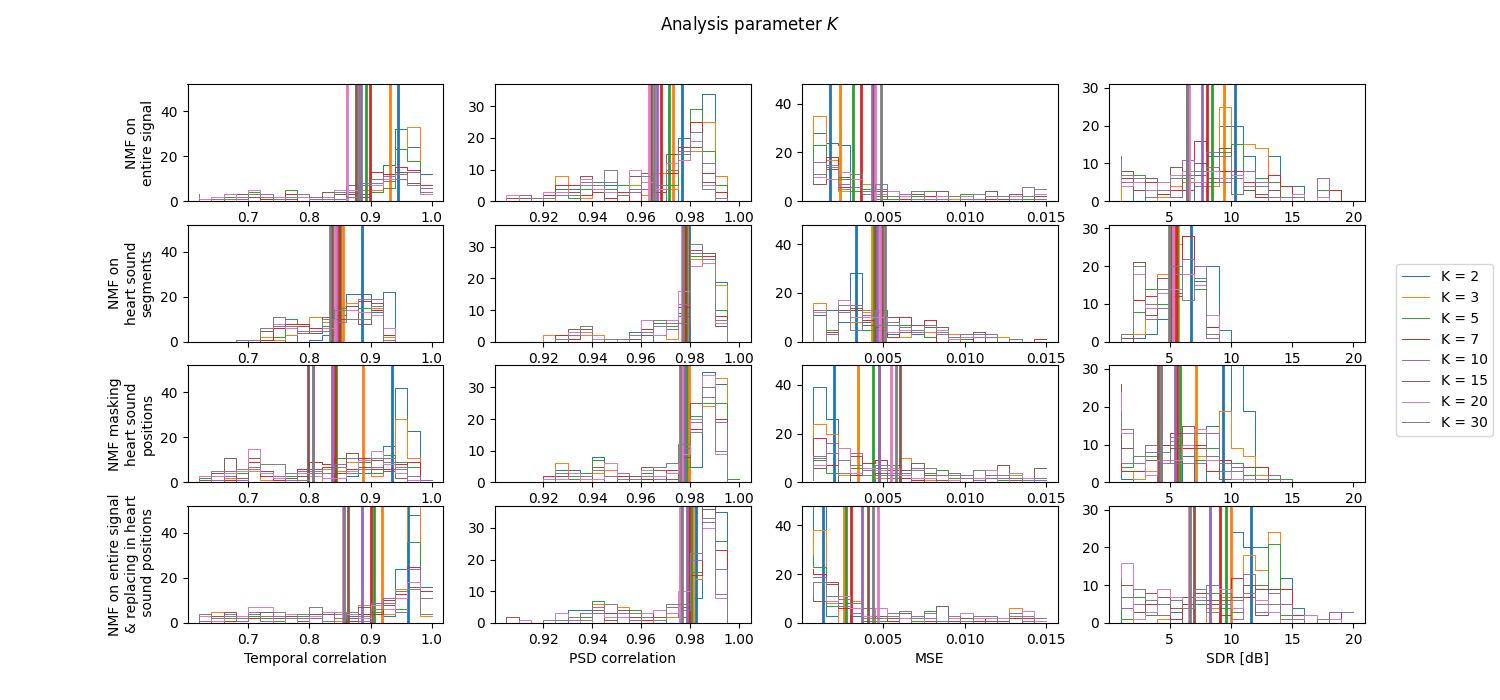

In [19]:
%matplotlib notebook
def density_plots_comps():
    fig, ax = plt.subplots(3, 4, figsize=(9,7), sharex=False)

    #### NMF BASE ####
    sns.kdeplot(temp_all[2], color='C0', label=r'$n_{c} = 2$',
                edgecolor='C0', fill=True, alpha=0, ax=ax[0][0])
    sns.kdeplot(temp_all[3], color='C1', label=r'$n_{c} = 3$',
                edgecolor='C1', fill=True, alpha=0, ax=ax[0][0])
    sns.kdeplot(temp_all[4], color='C2', label=r'$n_{c} = 4$',
                edgecolor='C2', fill=True, alpha=0, ax=ax[0][0])
    sns.kdeplot(temp_all[5], color='C3', label=r'$n_{c} = 5$',
                edgecolor='C3', fill=True, alpha=0, ax=ax[0][0])
    sns.kdeplot(temp_all[7], color='C4', label=r'$n_{c} = 7$',
                edgecolor='C4', fill=True, alpha=0, ax=ax[0][0])
    sns.kdeplot(temp_all[10], color='C5', label=r'$n_{c} = 10$',
                edgecolor='C5', fill=True, alpha=0, ax=ax[0][0])
    sns.kdeplot(temp_all[15], color='C6', label=r'$n_{c} = 15$',
                edgecolor='C6', fill=True, alpha=0, ax=ax[0][0])
    sns.kdeplot(temp_all[20], color='C7', label=r'$n_{c} = 20$',
                edgecolor='C7', fill=True, alpha=0, ax=ax[0][0])
    sns.kdeplot(temp_all[30], color='C8', label=r'$n_{c} = 30$',
                edgecolor='C8', fill=True, alpha=0, ax=ax[0][0])
    sns.kdeplot(temp_all[50], color='C9', label=r'$n_{c} = 50$',
                edgecolor='C9', fill=True, alpha=0, ax=ax[0][0])
    
    sns.kdeplot(spec_all[2], color='C0',
                edgecolor='C0', fill=True, alpha=0, ax=ax[0][1])
    sns.kdeplot(spec_all[3], color='C1',
                edgecolor='C1', fill=True, alpha=0, ax=ax[0][1])
    sns.kdeplot(spec_all[4], color='C2',
                edgecolor='C2', fill=True, alpha=0, ax=ax[0][1])
    sns.kdeplot(spec_all[5], color='C3',
                edgecolor='C3', fill=True, alpha=0, ax=ax[0][1])
    sns.kdeplot(spec_all[7], color='C4',
                edgecolor='C4', fill=True, alpha=0, ax=ax[0][1])
    sns.kdeplot(spec_all[10], color='C5',
                edgecolor='C5', fill=True, alpha=0, ax=ax[0][1])
    sns.kdeplot(spec_all[15], color='C6',
                edgecolor='C6', fill=True, alpha=0, ax=ax[0][1])
    sns.kdeplot(spec_all[20], color='C7',
                edgecolor='C7', fill=True, alpha=0, ax=ax[0][1])
    sns.kdeplot(spec_all[30], color='C8',
                edgecolor='C8', fill=True, alpha=0, ax=ax[0][1])
    sns.kdeplot(spec_all[50], color='C9',
                edgecolor='C9', fill=True, alpha=0, ax=ax[0][1])
    
    sns.kdeplot(mse_all[2], color='C0',
                edgecolor='C0', fill=True, alpha=0, ax=ax[0][2])
    sns.kdeplot(mse_all[3], color='C1',
                edgecolor='C1', fill=True, alpha=0, ax=ax[0][2])
    sns.kdeplot(mse_all[4], color='C2',
                edgecolor='C2', fill=True, alpha=0, ax=ax[0][2])
    sns.kdeplot(mse_all[5], color='C3',
                edgecolor='C3', fill=True, alpha=0, ax=ax[0][2])
    sns.kdeplot(mse_all[7], color='C4',
                edgecolor='C4', fill=True, alpha=0, ax=ax[0][2])
    sns.kdeplot(mse_all[10], color='C5',
                edgecolor='C5', fill=True, alpha=0, ax=ax[0][2])
    sns.kdeplot(mse_all[15], color='C6',
                edgecolor='C6', fill=True, alpha=0, ax=ax[0][2])
    sns.kdeplot(mse_all[20], color='C7',
                edgecolor='C7', fill=True, alpha=0, ax=ax[0][2])
    sns.kdeplot(mse_all[30], color='C8',
                edgecolor='C8', fill=True, alpha=0, ax=ax[0][2])
    sns.kdeplot(mse_all[50], color='C9',
                edgecolor='C9', fill=True, alpha=0, ax=ax[0][2])
    
    sns.kdeplot(sdr_all[2], color='C0',
                edgecolor='C0', fill=True, alpha=0, ax=ax[0][3])
    sns.kdeplot(sdr_all[3], color='C1',
                edgecolor='C1', fill=True, alpha=0, ax=ax[0][3])
    sns.kdeplot(sdr_all[4], color='C2',
                edgecolor='C2', fill=True, alpha=0, ax=ax[0][3])
    sns.kdeplot(sdr_all[5], color='C3',
                edgecolor='C3', fill=True, alpha=0, ax=ax[0][3])
    sns.kdeplot(sdr_all[7], color='C4',
                edgecolor='C4', fill=True, alpha=0, ax=ax[0][3])
    sns.kdeplot(sdr_all[10], color='C5',
                edgecolor='C5', fill=True, alpha=0, ax=ax[0][3])
    sns.kdeplot(sdr_all[15], color='C6',
                edgecolor='C6', fill=True, alpha=0, ax=ax[0][3])
    sns.kdeplot(sdr_all[20], color='C7',
                edgecolor='C7', fill=True, alpha=0, ax=ax[0][3])
    sns.kdeplot(sdr_all[30], color='C8',
                edgecolor='C8', fill=True, alpha=0, ax=ax[0][3])
    sns.kdeplot(sdr_all[50], color='C9',
                edgecolor='C9', fill=True, alpha=0, ax=ax[0][3])    
    
    #### NMF on segments ####
    sns.kdeplot(temp_seg[2], color='C0', 
                edgecolor='C0', fill=True, alpha=0, ax=ax[1][0])
    sns.kdeplot(temp_seg[3], color='C1', 
                edgecolor='C1', fill=True, alpha=0, ax=ax[1][0])
    sns.kdeplot(temp_seg[4], color='C2', 
                edgecolor='C2', fill=True, alpha=0, ax=ax[1][0])
    sns.kdeplot(temp_seg[5], color='C3', 
                edgecolor='C3', fill=True, alpha=0, ax=ax[1][0])
    sns.kdeplot(temp_seg[7], color='C4', 
                edgecolor='C4', fill=True, alpha=0, ax=ax[1][0])
    sns.kdeplot(temp_seg[10], color='C5',
                edgecolor='C5', fill=True, alpha=0, ax=ax[1][0])
    sns.kdeplot(temp_seg[15], color='C6',
                edgecolor='C6', fill=True, alpha=0, ax=ax[1][0])
    sns.kdeplot(temp_seg[20], color='C7',
                edgecolor='C7', fill=True, alpha=0, ax=ax[1][0])
    sns.kdeplot(temp_seg[30], color='C8',
                edgecolor='C8', fill=True, alpha=0, ax=ax[1][0])
    sns.kdeplot(temp_seg[50], color='C9',
                edgecolor='C9', fill=True, alpha=0, ax=ax[1][0])
    
    sns.kdeplot(spec_seg[2], color='C0',
                edgecolor='C0', fill=True, alpha=0, ax=ax[1][1])
    sns.kdeplot(spec_seg[3], color='C1',
                edgecolor='C1', fill=True, alpha=0, ax=ax[1][1])
    sns.kdeplot(spec_seg[4], color='C2',
                edgecolor='C2', fill=True, alpha=0, ax=ax[1][1])
    sns.kdeplot(spec_seg[5], color='C3',
                edgecolor='C3', fill=True, alpha=0, ax=ax[1][1])
    sns.kdeplot(spec_seg[7], color='C4',
                edgecolor='C4', fill=True, alpha=0, ax=ax[1][1])
    sns.kdeplot(spec_seg[10], color='C5',
                edgecolor='C5', fill=True, alpha=0, ax=ax[1][1])
    sns.kdeplot(spec_seg[15], color='C6',
                edgecolor='C6', fill=True, alpha=0, ax=ax[1][1])
    sns.kdeplot(spec_seg[20], color='C7',
                edgecolor='C7', fill=True, alpha=0, ax=ax[1][1])
    sns.kdeplot(spec_seg[30], color='C8',
                edgecolor='C8', fill=True, alpha=0, ax=ax[1][1])
    sns.kdeplot(spec_seg[50], color='C9',
                edgecolor='C9', fill=True, alpha=0, ax=ax[1][1])
    
    sns.kdeplot(mse_seg[2], color='C0',
                edgecolor='C0', fill=True, alpha=0, ax=ax[1][2])
    sns.kdeplot(mse_seg[3], color='C1',
                edgecolor='C1', fill=True, alpha=0, ax=ax[1][2])
    sns.kdeplot(mse_seg[4], color='C2',
                edgecolor='C2', fill=True, alpha=0, ax=ax[1][2])
    sns.kdeplot(mse_seg[5], color='C3',
                edgecolor='C3', fill=True, alpha=0, ax=ax[1][2])
    sns.kdeplot(mse_seg[7], color='C4',
                edgecolor='C4', fill=True, alpha=0, ax=ax[1][2])
    sns.kdeplot(mse_seg[10], color='C5',
                edgecolor='C5', fill=True, alpha=0, ax=ax[1][2])
    sns.kdeplot(mse_seg[15], color='C6',
                edgecolor='C6', fill=True, alpha=0, ax=ax[1][2])
    sns.kdeplot(mse_seg[20], color='C7',
                edgecolor='C7', fill=True, alpha=0, ax=ax[1][2])
    sns.kdeplot(mse_seg[30], color='C8',
                edgecolor='C8', fill=True, alpha=0, ax=ax[1][2])
    sns.kdeplot(mse_seg[50], color='C9',
                edgecolor='C9', fill=True, alpha=0, ax=ax[1][2])
    
    sns.kdeplot(sdr_seg[2], color='C0',
                edgecolor='C0', fill=True, alpha=0, ax=ax[1][3])
    sns.kdeplot(sdr_seg[3], color='C1',
                edgecolor='C1', fill=True, alpha=0, ax=ax[1][3])
    sns.kdeplot(sdr_seg[4], color='C2',
                edgecolor='C2', fill=True, alpha=0, ax=ax[1][3])
    sns.kdeplot(sdr_seg[5], color='C3',
                edgecolor='C3', fill=True, alpha=0, ax=ax[1][3])
    sns.kdeplot(sdr_seg[7], color='C4',
                edgecolor='C4', fill=True, alpha=0, ax=ax[1][3])
    sns.kdeplot(sdr_seg[10], color='C5',
                edgecolor='C5', fill=True, alpha=0, ax=ax[1][3])
    sns.kdeplot(sdr_seg[15], color='C6',
                edgecolor='C6', fill=True, alpha=0, ax=ax[1][3])
    sns.kdeplot(sdr_seg[20], color='C7',
                edgecolor='C7', fill=True, alpha=0, ax=ax[1][3])
    sns.kdeplot(sdr_seg[30], color='C8',
                edgecolor='C8', fill=True, alpha=0, ax=ax[1][3])
    sns.kdeplot(sdr_seg[50], color='C9',
                edgecolor='C9', fill=True, alpha=0, ax=ax[1][3])    
    
    
    #### NMF masked segments ####
    sns.kdeplot(temp_mask[2], color='C0', 
                edgecolor='C0', fill=True, alpha=0, ax=ax[2][0])
    sns.kdeplot(temp_mask[3], color='C1', 
                edgecolor='C1', fill=True, alpha=0, ax=ax[2][0])
    sns.kdeplot(temp_mask[4], color='C2', 
                edgecolor='C2', fill=True, alpha=0, ax=ax[2][0])
    sns.kdeplot(temp_mask[5], color='C3', 
                edgecolor='C3', fill=True, alpha=0, ax=ax[2][0])
    sns.kdeplot(temp_mask[7], color='C4', 
                edgecolor='C4', fill=True, alpha=0, ax=ax[2][0])
    sns.kdeplot(temp_mask[10], color='C5',
                edgecolor='C5', fill=True, alpha=0, ax=ax[2][0])
    sns.kdeplot(temp_mask[15], color='C6',
                edgecolor='C6', fill=True, alpha=0, ax=ax[2][0])
    sns.kdeplot(temp_mask[20], color='C7',
                edgecolor='C7', fill=True, alpha=0, ax=ax[2][0])
    sns.kdeplot(temp_mask[30], color='C8',
                edgecolor='C8', fill=True, alpha=0, ax=ax[2][0])
    sns.kdeplot(temp_mask[50], color='C9',
                edgecolor='C9', fill=True, alpha=0, ax=ax[2][0])
    
    sns.kdeplot(spec_mask[2], color='C0',
                edgecolor='C0', fill=True, alpha=0, ax=ax[2][1])
    sns.kdeplot(spec_mask[3], color='C1',
                edgecolor='C1', fill=True, alpha=0, ax=ax[2][1])
    sns.kdeplot(spec_mask[4], color='C2',
                edgecolor='C2', fill=True, alpha=0, ax=ax[2][1])
    sns.kdeplot(spec_mask[5], color='C3',
                edgecolor='C3', fill=True, alpha=0, ax=ax[2][1])
    sns.kdeplot(spec_mask[7], color='C4',
                edgecolor='C4', fill=True, alpha=0, ax=ax[2][1])
    sns.kdeplot(spec_mask[10], color='C5',
                edgecolor='C5', fill=True, alpha=0, ax=ax[2][1])
    sns.kdeplot(spec_mask[15], color='C6',
                edgecolor='C6', fill=True, alpha=0, ax=ax[2][1])
    sns.kdeplot(spec_mask[20], color='C7',
                edgecolor='C7', fill=True, alpha=0, ax=ax[2][1])
    sns.kdeplot(spec_mask[30], color='C8',
                edgecolor='C8', fill=True, alpha=0, ax=ax[2][1])
    sns.kdeplot(spec_mask[50], color='C9',
                edgecolor='C9', fill=True, alpha=0, ax=ax[2][1])
    
    sns.kdeplot(mse_mask[2], color='C0',
                edgecolor='C0', fill=True, alpha=0, ax=ax[2][2])
    sns.kdeplot(mse_mask[3], color='C1',
                edgecolor='C1', fill=True, alpha=0, ax=ax[2][2])
    sns.kdeplot(mse_mask[4], color='C2',
                edgecolor='C2', fill=True, alpha=0, ax=ax[2][2])
    sns.kdeplot(mse_mask[5], color='C3',
                edgecolor='C3', fill=True, alpha=0, ax=ax[2][2])
    sns.kdeplot(mse_mask[7], color='C4',
                edgecolor='C4', fill=True, alpha=0, ax=ax[2][2])
    sns.kdeplot(mse_mask[10], color='C5',
                edgecolor='C5', fill=True, alpha=0, ax=ax[2][2])
    sns.kdeplot(mse_mask[15], color='C6',
                edgecolor='C6', fill=True, alpha=0, ax=ax[2][2])
    sns.kdeplot(mse_mask[20], color='C7',
                edgecolor='C7', fill=True, alpha=0, ax=ax[2][2])
    sns.kdeplot(mse_mask[30], color='C8',
                edgecolor='C8', fill=True, alpha=0, ax=ax[2][2])
    sns.kdeplot(mse_mask[50], color='C9',
                edgecolor='C9', fill=True, alpha=0, ax=ax[2][2])
    
    sns.kdeplot(sdr_mask[2], color='C0',
                edgecolor='C0', fill=True, alpha=0, ax=ax[2][3])
    sns.kdeplot(sdr_mask[3], color='C1',
                edgecolor='C1', fill=True, alpha=0, ax=ax[2][3])
    sns.kdeplot(sdr_mask[4], color='C2',
                edgecolor='C2', fill=True, alpha=0, ax=ax[2][3])
    sns.kdeplot(sdr_mask[5], color='C3',
                edgecolor='C3', fill=True, alpha=0, ax=ax[2][3])
    sns.kdeplot(sdr_mask[7], color='C4',
                edgecolor='C4', fill=True, alpha=0, ax=ax[2][3])
    sns.kdeplot(sdr_mask[10], color='C5',
                edgecolor='C5', fill=True, alpha=0, ax=ax[2][3])
    sns.kdeplot(sdr_mask[15], color='C6',
                edgecolor='C6', fill=True, alpha=0, ax=ax[2][3])
    sns.kdeplot(sdr_mask[20], color='C7',
                edgecolor='C7', fill=True, alpha=0, ax=ax[2][3])
    sns.kdeplot(sdr_mask[30], color='C8',
                edgecolor='C8', fill=True, alpha=0, ax=ax[2][3])
    sns.kdeplot(sdr_mask[50], color='C9',
                edgecolor='C9', fill=True, alpha=0, ax=ax[2][3])       


    # Seteando los ylabel
    ax[0][0].set_ylabel('NMF\nbase')
    ax[0][1].set_ylabel('')
    ax[0][2].set_ylabel('')
    ax[0][3].set_ylabel('')
    ax[1][0].set_ylabel('NMF on\nsegments')
    ax[1][1].set_ylabel('')
    ax[1][2].set_ylabel('')
    ax[1][3].set_ylabel('')
    ax[2][0].set_ylabel('NMF masked\nsegments')
    ax[2][1].set_ylabel('')
    ax[2][2].set_ylabel('')
    ax[2][3].set_ylabel('')

    # Seteando los títulos
    ax[2][0].set_xlabel('Temporal\ncorrelation')
    ax[2][1].set_xlabel('Spectral\ncorrelation')
    ax[2][2].set_xlabel('MSE')
    ax[2][3].set_xlabel('SDR')

    # Seteando las leyendas
    fig.legend(loc='center right')
    
    # Ajustando los límites
    ax[0][0].set_xlim([0.35, 1.06])
    ax[1][0].set_xlim([0.35, 1.06])
    ax[2][0].set_xlim([0.35, 1.06])

    ax[0][1].set_xlim([0.7, 1.03])
    ax[1][1].set_xlim([0.7, 1.03])
    ax[2][1].set_xlim([0.7, 1.03])

    ax[0][2].set_xlim([-0.006, 0.035])
    ax[1][2].set_xlim([-0.006, 0.035])
    ax[2][2].set_xlim([-0.006, 0.035])

    ax[0][3].set_xlim([-5, 25])
    ax[1][3].set_xlim([-5, 25])
    ax[2][3].set_xlim([-5, 25])

    # Ajustando las etiquetas del eje
    fig.align_ylabels(ax[:])
    fig.subplots_adjust(right=0.85)
    # Quitando el espacio entre gráficos
    # fig.subplots_adjust(wspace=0.1, hspace=0.1)
    plt.show()

    
def density_plots_comps_nofill():
    fig, ax = plt.subplots(3, 4, figsize=(15,7), sharex=False)

    #### NMF BASE ####
    sns.kdeplot(temp_all[2], color='C0', label=r'$K = 2$',
                fill=False, alpha=0, ax=ax[0][0])
    sns.kdeplot(temp_all[3], color='C1', label=r'$K = 3$',
                fill=False, alpha=0, ax=ax[0][0])
    sns.kdeplot(temp_all[4], color='C2', label=r'$K = 4$',
                fill=False, alpha=0, ax=ax[0][0])
    sns.kdeplot(temp_all[5], color='C3', label=r'$K = 5$',
                fill=False, alpha=0, ax=ax[0][0])
    sns.kdeplot(temp_all[7], color='C4', label=r'$K = 7$',
                fill=False, alpha=0, ax=ax[0][0])
    sns.kdeplot(temp_all[10], color='C5', label=r'$K = 10$',
                fill=False, alpha=0, ax=ax[0][0])
    sns.kdeplot(temp_all[15], color='C6', label=r'$K = 15$',
                fill=False, alpha=0, ax=ax[0][0])
    sns.kdeplot(temp_all[20], color='C7', label=r'$K = 20$',
                fill=False, alpha=0, ax=ax[0][0])
    sns.kdeplot(temp_all[30], color='C8', label=r'$K = 30$',
                fill=False, alpha=0, ax=ax[0][0])
    sns.kdeplot(temp_all[50], color='C9', label=r'$K = 50$',
                fill=False, alpha=0, ax=ax[0][0])
    
    sns.kdeplot(spec_all[2], color='C0',
                fill=False, alpha=0, ax=ax[0][1])
    sns.kdeplot(spec_all[3], color='C1',
                fill=False, alpha=0, ax=ax[0][1])
    sns.kdeplot(spec_all[4], color='C2',
                fill=False, alpha=0, ax=ax[0][1])
    sns.kdeplot(spec_all[5], color='C3',
                fill=False, alpha=0, ax=ax[0][1])
    sns.kdeplot(spec_all[7], color='C4',
                fill=False, alpha=0, ax=ax[0][1])
    sns.kdeplot(spec_all[10], color='C5',
                fill=False, alpha=0, ax=ax[0][1])
    sns.kdeplot(spec_all[15], color='C6',
                fill=False, alpha=0, ax=ax[0][1])
    sns.kdeplot(spec_all[20], color='C7',
                fill=False, alpha=0, ax=ax[0][1])
    sns.kdeplot(spec_all[30], color='C8',
                fill=False, alpha=0, ax=ax[0][1])
    sns.kdeplot(spec_all[50], color='C9',
                fill=False, alpha=0, ax=ax[0][1])
    
    sns.kdeplot(mse_all[2], color='C0',
                fill=False, alpha=0, ax=ax[0][2])
    sns.kdeplot(mse_all[3], color='C1',
                fill=False, alpha=0, ax=ax[0][2])
    sns.kdeplot(mse_all[4], color='C2',
                fill=False, alpha=0, ax=ax[0][2])
    sns.kdeplot(mse_all[5], color='C3',
                fill=False, alpha=0, ax=ax[0][2])
    sns.kdeplot(mse_all[7], color='C4',
                fill=False, alpha=0, ax=ax[0][2])
    sns.kdeplot(mse_all[10], color='C5',
                fill=False, alpha=0, ax=ax[0][2])
    sns.kdeplot(mse_all[15], color='C6',
                fill=False, alpha=0, ax=ax[0][2])
    sns.kdeplot(mse_all[20], color='C7',
                fill=False, alpha=0, ax=ax[0][2])
    sns.kdeplot(mse_all[30], color='C8',
                fill=False, alpha=0, ax=ax[0][2])
    sns.kdeplot(mse_all[50], color='C9',
                fill=False, alpha=0, ax=ax[0][2])
    
    sns.kdeplot(sdr_all[2], color='C0',
                fill=False, alpha=0, ax=ax[0][3])
    sns.kdeplot(sdr_all[3], color='C1',
                fill=False, alpha=0, ax=ax[0][3])
    sns.kdeplot(sdr_all[4], color='C2',
                fill=False, alpha=0, ax=ax[0][3])
    sns.kdeplot(sdr_all[5], color='C3',
                fill=False, alpha=0, ax=ax[0][3])
    sns.kdeplot(sdr_all[7], color='C4',
                fill=False, alpha=0, ax=ax[0][3])
    sns.kdeplot(sdr_all[10], color='C5',
                fill=False, alpha=0, ax=ax[0][3])
    sns.kdeplot(sdr_all[15], color='C6',
                fill=False, alpha=0, ax=ax[0][3])
    sns.kdeplot(sdr_all[20], color='C7',
                fill=False, alpha=0, ax=ax[0][3])
    sns.kdeplot(sdr_all[30], color='C8',
                fill=False, alpha=0, ax=ax[0][3])
    sns.kdeplot(sdr_all[50], color='C9',
                fill=False, alpha=0, ax=ax[0][3])    
    
    #### NMF on segments ####
    sns.kdeplot(temp_seg[2], color='C0', 
                fill=False, alpha=0, ax=ax[1][0])
    sns.kdeplot(temp_seg[3], color='C1', 
                fill=False, alpha=0, ax=ax[1][0])
    sns.kdeplot(temp_seg[4], color='C2', 
                fill=False, alpha=0, ax=ax[1][0])
    sns.kdeplot(temp_seg[5], color='C3', 
                fill=False, alpha=0, ax=ax[1][0])
    sns.kdeplot(temp_seg[7], color='C4', 
                fill=False, alpha=0, ax=ax[1][0])
    sns.kdeplot(temp_seg[10], color='C5',
                fill=False, alpha=0, ax=ax[1][0])
    sns.kdeplot(temp_seg[15], color='C6',
                fill=False, alpha=0, ax=ax[1][0])
    sns.kdeplot(temp_seg[20], color='C7',
                fill=False, alpha=0, ax=ax[1][0])
    sns.kdeplot(temp_seg[30], color='C8',
                fill=False, alpha=0, ax=ax[1][0])
    sns.kdeplot(temp_seg[50], color='C9',
                fill=False, alpha=0, ax=ax[1][0])
    
    sns.kdeplot(spec_seg[2], color='C0',
                fill=False, alpha=0, ax=ax[1][1])
    sns.kdeplot(spec_seg[3], color='C1',
                fill=False, alpha=0, ax=ax[1][1])
    sns.kdeplot(spec_seg[4], color='C2',
                fill=False, alpha=0, ax=ax[1][1])
    sns.kdeplot(spec_seg[5], color='C3',
                fill=False, alpha=0, ax=ax[1][1])
    sns.kdeplot(spec_seg[7], color='C4',
                fill=False, alpha=0, ax=ax[1][1])
    sns.kdeplot(spec_seg[10], color='C5',
                fill=False, alpha=0, ax=ax[1][1])
    sns.kdeplot(spec_seg[15], color='C6',
                fill=False, alpha=0, ax=ax[1][1])
    sns.kdeplot(spec_seg[20], color='C7',
                fill=False, alpha=0, ax=ax[1][1])
    sns.kdeplot(spec_seg[30], color='C8',
                fill=False, alpha=0, ax=ax[1][1])
    sns.kdeplot(spec_seg[50], color='C9',
                fill=False, alpha=0, ax=ax[1][1])
    
    sns.kdeplot(mse_seg[2], color='C0',
                fill=False, alpha=0, ax=ax[1][2])
    sns.kdeplot(mse_seg[3], color='C1',
                fill=False, alpha=0, ax=ax[1][2])
    sns.kdeplot(mse_seg[4], color='C2',
                fill=False, alpha=0, ax=ax[1][2])
    sns.kdeplot(mse_seg[5], color='C3',
                fill=False, alpha=0, ax=ax[1][2])
    sns.kdeplot(mse_seg[7], color='C4',
                fill=False, alpha=0, ax=ax[1][2])
    sns.kdeplot(mse_seg[10], color='C5',
                fill=False, alpha=0, ax=ax[1][2])
    sns.kdeplot(mse_seg[15], color='C6',
                fill=False, alpha=0, ax=ax[1][2])
    sns.kdeplot(mse_seg[20], color='C7',
                fill=False, alpha=0, ax=ax[1][2])
    sns.kdeplot(mse_seg[30], color='C8',
                fill=False, alpha=0, ax=ax[1][2])
    sns.kdeplot(mse_seg[50], color='C9',
                fill=False, alpha=0, ax=ax[1][2])
    
    sns.kdeplot(sdr_seg[2], color='C0',
                fill=False, alpha=0, ax=ax[1][3])
    sns.kdeplot(sdr_seg[3], color='C1',
                fill=False, alpha=0, ax=ax[1][3])
    sns.kdeplot(sdr_seg[4], color='C2',
                fill=False, alpha=0, ax=ax[1][3])
    sns.kdeplot(sdr_seg[5], color='C3',
                fill=False, alpha=0, ax=ax[1][3])
    sns.kdeplot(sdr_seg[7], color='C4',
                fill=False, alpha=0, ax=ax[1][3])
    sns.kdeplot(sdr_seg[10], color='C5',
                fill=False, alpha=0, ax=ax[1][3])
    sns.kdeplot(sdr_seg[15], color='C6',
                fill=False, alpha=0, ax=ax[1][3])
    sns.kdeplot(sdr_seg[20], color='C7',
                fill=False, alpha=0, ax=ax[1][3])
    sns.kdeplot(sdr_seg[30], color='C8',
                fill=False, alpha=0, ax=ax[1][3])
    sns.kdeplot(sdr_seg[50], color='C9',
                fill=False, alpha=0, ax=ax[1][3])    
    
    
    #### NMF masked segments ####
    sns.kdeplot(temp_mask[2], color='C0', 
                fill=False, alpha=0, ax=ax[2][0])
    sns.kdeplot(temp_mask[3], color='C1', 
                fill=False, alpha=0, ax=ax[2][0])
    sns.kdeplot(temp_mask[4], color='C2', 
                fill=False, alpha=0, ax=ax[2][0])
    sns.kdeplot(temp_mask[5], color='C3', 
                fill=False, alpha=0, ax=ax[2][0])
    sns.kdeplot(temp_mask[7], color='C4', 
                fill=False, alpha=0, ax=ax[2][0])
    sns.kdeplot(temp_mask[10], color='C5',
                fill=False, alpha=0, ax=ax[2][0])
    sns.kdeplot(temp_mask[15], color='C6',
                fill=False, alpha=0, ax=ax[2][0])
    sns.kdeplot(temp_mask[20], color='C7',
                fill=False, alpha=0, ax=ax[2][0])
    sns.kdeplot(temp_mask[30], color='C8',
                fill=False, alpha=0, ax=ax[2][0])
    sns.kdeplot(temp_mask[50], color='C9',
                fill=False, alpha=0, ax=ax[2][0])
    
    sns.kdeplot(spec_mask[2], color='C0',
                fill=False, alpha=0, ax=ax[2][1])
    sns.kdeplot(spec_mask[3], color='C1',
                fill=False, alpha=0, ax=ax[2][1])
    sns.kdeplot(spec_mask[4], color='C2',
                fill=False, alpha=0, ax=ax[2][1])
    sns.kdeplot(spec_mask[5], color='C3',
                fill=False, alpha=0, ax=ax[2][1])
    sns.kdeplot(spec_mask[7], color='C4',
                fill=False, alpha=0, ax=ax[2][1])
    sns.kdeplot(spec_mask[10], color='C5',
                fill=False, alpha=0, ax=ax[2][1])
    sns.kdeplot(spec_mask[15], color='C6',
                fill=False, alpha=0, ax=ax[2][1])
    sns.kdeplot(spec_mask[20], color='C7',
                fill=False, alpha=0, ax=ax[2][1])
    sns.kdeplot(spec_mask[30], color='C8',
                fill=False, alpha=0, ax=ax[2][1])
    sns.kdeplot(spec_mask[50], color='C9',
                fill=False, alpha=0, ax=ax[2][1])
    
    sns.kdeplot(mse_mask[2], color='C0',
                fill=False, alpha=0, ax=ax[2][2])
    sns.kdeplot(mse_mask[3], color='C1',
                fill=False, alpha=0, ax=ax[2][2])
    sns.kdeplot(mse_mask[4], color='C2',
                fill=False, alpha=0, ax=ax[2][2])
    sns.kdeplot(mse_mask[5], color='C3',
                fill=False, alpha=0, ax=ax[2][2])
    sns.kdeplot(mse_mask[7], color='C4',
                fill=False, alpha=0, ax=ax[2][2])
    sns.kdeplot(mse_mask[10], color='C5',
                fill=False, alpha=0, ax=ax[2][2])
    sns.kdeplot(mse_mask[15], color='C6',
                fill=False, alpha=0, ax=ax[2][2])
    sns.kdeplot(mse_mask[20], color='C7',
                fill=False, alpha=0, ax=ax[2][2])
    sns.kdeplot(mse_mask[30], color='C8',
                fill=False, alpha=0, ax=ax[2][2])
    sns.kdeplot(mse_mask[50], color='C9',
                fill=False, alpha=0, ax=ax[2][2])
    
    sns.kdeplot(sdr_mask[2], color='C0',
                fill=False, alpha=0, ax=ax[2][3])
    sns.kdeplot(sdr_mask[3], color='C1',
                fill=False, alpha=0, ax=ax[2][3])
    sns.kdeplot(sdr_mask[4], color='C2',
                fill=False, alpha=0, ax=ax[2][3])
    sns.kdeplot(sdr_mask[5], color='C3',
                fill=False, alpha=0, ax=ax[2][3])
    sns.kdeplot(sdr_mask[7], color='C4',
                fill=False, alpha=0, ax=ax[2][3])
    sns.kdeplot(sdr_mask[10], color='C5',
                fill=False, alpha=0, ax=ax[2][3])
    sns.kdeplot(sdr_mask[15], color='C6',
                fill=False, alpha=0, ax=ax[2][3])
    sns.kdeplot(sdr_mask[20], color='C7',
                fill=False, alpha=0, ax=ax[2][3])
    sns.kdeplot(sdr_mask[30], color='C8',
                fill=False, alpha=0, ax=ax[2][3])
    sns.kdeplot(sdr_mask[50], color='C9',
                fill=False, alpha=0, ax=ax[2][3])       


    # Seteando los ylabel
    ax[0][0].set_ylabel('NMF\nbase')
    ax[0][1].set_ylabel('')
    ax[0][2].set_ylabel('')
    ax[0][3].set_ylabel('')
    ax[1][0].set_ylabel('NMF on\nsegments')
    ax[1][1].set_ylabel('')
    ax[1][2].set_ylabel('')
    ax[1][3].set_ylabel('')
    ax[2][0].set_ylabel('NMF masked\nsegments')
    ax[2][1].set_ylabel('')
    ax[2][2].set_ylabel('')
    ax[2][3].set_ylabel('')

    # Seteando los títulos
    ax[2][0].set_xlabel('Temporal\ncorrelation')
    ax[2][1].set_xlabel('Spectral\ncorrelation')
    ax[2][2].set_xlabel('MSE')
    ax[2][3].set_xlabel('SDR')

    # Seteando las leyendas
    fig.legend(loc='center right')
    
    # Ajustando los límites
    ax[0][0].set_xlim([0.35, 1.06])
    ax[1][0].set_xlim([0.35, 1.06])
    ax[2][0].set_xlim([0.35, 1.06])
    ax[0][0].set_ylim([0, 14])
    ax[1][0].set_ylim([0, 14])
    ax[2][0].set_ylim([0, 14])
    
    ax[0][1].set_xlim([0.7, 1.03])
    ax[1][1].set_xlim([0.7, 1.03])
    ax[2][1].set_xlim([0.7, 1.03])
    ax[0][1].set_ylim([0, 50])
    ax[1][1].set_ylim([0, 50])
    ax[2][1].set_ylim([0, 50])

    ax[0][2].set_xlim([-0.006, 0.035])
    ax[1][2].set_xlim([-0.006, 0.035])
    ax[2][2].set_xlim([-0.006, 0.035])
    ax[0][2].set_ylim([0, 350])
    ax[1][2].set_ylim([0, 350])
    ax[2][2].set_ylim([0, 350])

    ax[0][3].set_xlim([-5, 25])
    ax[1][3].set_xlim([-5, 25])
    ax[2][3].set_xlim([-5, 25])
    ax[0][3].set_ylim([0, 0.26])
    ax[1][3].set_ylim([0, 0.26])
    ax[2][3].set_ylim([0, 0.26])

    # Ajustando las etiquetas del eje
    fig.align_ylabels(ax[:])
    fig.subplots_adjust(right=0.91)
    fig.suptitle(r'Análisis de métricas parámetro $K$')
    
    plt.savefig('Images/ncomps_analysis.pdf', transparent=True)
    plt.show()

    
def hist_plots_ncomps(fig, ax, bins=40, linewidth=1):
    def _plot_hist(num, input_array, bins, axs, interval=None, label=None):
        hist, bin_edges = np.histogram(a=input_array, bins=bins, range=interval)
        bins_plot = [np.mean(bin_edges[i:i+2]) for i in range(len(bin_edges) - 1)]
        
        if label is None:
            axs.plot(bins_plot, hist, color=f'C{num}', linewidth=linewidth)
        else:
            axs.plot(bins_plot, hist, color=f'C{num}', label=label, linewidth=linewidth)
        
        return hist
    
    # Definición de las posibilidades de N
    ncomps_list = (2,3,5,7,10,15,20,30)
    
    # Definición del límite máximo x para MSE y SDR
    max_mse_x_list = list()
    max_sdr_x_list = list()
    
    for ncomps in ncomps_list:
        max_mse_x_list.append(max(mse_all[ncomps]))
        max_mse_x_list.append(max(mse_seg[ncomps]))
        max_mse_x_list.append(max(mse_mask[ncomps]))
        max_mse_x_list.append(max(mse_repl[ncomps]))
        
        max_sdr_x_list.append(max(sdr_all[ncomps]))
        max_sdr_x_list.append(max(sdr_seg[ncomps]))
        max_sdr_x_list.append(max(sdr_mask[ncomps]))
        max_sdr_x_list.append(max(sdr_repl[ncomps]))
    
    max_mse_x = max(max_mse_x_list)
    max_sdr_x = max(max_sdr_x_list)
    
    # Definición del límite máximo y
    max_temp_y = 0
    max_spec_y = 0
    max_mse_y = 0
    max_sdr_y = 0
    
    # Lista para cada uno de los histogramas a realizar
    hist_dict = defaultdict(list)
    
    # Temporal correlation
    for num, ncomps in enumerate(ncomps_list):
        ####      Obtener los histogramas      ####
        # to_all
        hist_temp_all = _plot_hist(num, temp_all[ncomps], bins=bins, axs=ax[0][0], interval=(0,1), 
                                   label=f'K = {ncomps}')
        hist_spec_all = _plot_hist(num, spec_all[ncomps], bins=bins, axs=ax[0][1], interval=(0,1))
        hist_mse_all = _plot_hist(num, mse_all[ncomps], bins=bins, axs=ax[0][2], interval=(0, max_mse_x))
        hist_sdr_all = _plot_hist(num, sdr_all[ncomps], bins=bins, axs=ax[0][3], interval=(0, max_sdr_x))
        
        # on_segments
        hist_temp_seg = _plot_hist(num, temp_seg[ncomps], bins=bins, axs=ax[1][0], interval=(0,1))
        hist_spec_seg = _plot_hist(num, spec_seg[ncomps], bins=bins, axs=ax[1][1], interval=(0,1))
        hist_mse_seg = _plot_hist(num, mse_seg[ncomps], bins=bins, axs=ax[1][2], interval=(0, max_mse_x))
        hist_sdr_seg = _plot_hist(num, sdr_seg[ncomps], bins=bins, axs=ax[1][3], interval=(0, max_sdr_x))
        
        # masked_segments
        hist_temp_mask = _plot_hist(num, temp_mask[ncomps], bins=bins, axs=ax[2][0], interval=(0,1))
        hist_spec_mask = _plot_hist(num, spec_mask[ncomps], bins=bins, axs=ax[2][1], interval=(0,1))
        hist_mse_mask = _plot_hist(num, mse_mask[ncomps], bins=bins, axs=ax[2][2], interval=(0, max_mse_x))
        hist_sdr_mask = _plot_hist(num, sdr_mask[ncomps], bins=bins, axs=ax[2][3], interval=(0, max_sdr_x))
        
        # replaced_segments
        hist_temp_repl = _plot_hist(num, temp_repl[ncomps], bins=bins, axs=ax[3][0], interval=(0,1))
        hist_spec_repl = _plot_hist(num, spec_repl[ncomps], bins=bins, axs=ax[3][1], interval=(0,1))
        hist_mse_repl = _plot_hist(num, mse_repl[ncomps], bins=bins, axs=ax[3][2], interval=(0, max_mse_x))
        hist_sdr_repl = _plot_hist(num, sdr_repl[ncomps], bins=bins, axs=ax[3][3], interval=(0, max_sdr_x))
        
        # Máximos para los límites de los ejes y
        max_temp_y = max(max_temp_y, max(hist_temp_all), 
                         max(hist_temp_seg), max(hist_temp_mask),
                         max(hist_temp_repl)) 
        max_spec_y = max(max_spec_y, max(hist_spec_all), 
                         max(hist_spec_seg), max(hist_spec_mask),
                         max(hist_spec_repl))
        max_mse_y = max(max_mse_y, max(hist_mse_all), 
                        max(hist_mse_seg), max(hist_mse_mask),
                        max(hist_mse_repl))
        max_sdr_y = max(max_sdr_y, max(hist_sdr_all), 
                        max(hist_sdr_seg), max(hist_sdr_mask),
                        max(hist_sdr_repl))
        
        # Lista para cada uno de los histogramas a realizar
        hist_dict[(0, 0)].append(hist_temp_all)
        hist_dict[(0, 1)].append(hist_spec_all)
        hist_dict[(0, 2)].append(hist_mse_all)
        hist_dict[(0, 3)].append(hist_sdr_all)
        hist_dict[(1, 0)].append(hist_temp_seg)
        hist_dict[(1, 1)].append(hist_spec_seg)
        hist_dict[(1, 2)].append(hist_mse_seg)
        hist_dict[(1, 3)].append(hist_sdr_seg)
        hist_dict[(2, 0)].append(hist_temp_mask)
        hist_dict[(2, 1)].append(hist_spec_mask)
        hist_dict[(2, 2)].append(hist_mse_mask)
        hist_dict[(2, 3)].append(hist_sdr_mask)
        hist_dict[(3, 0)].append(hist_temp_repl)
        hist_dict[(3, 1)].append(hist_spec_repl)
        hist_dict[(3, 2)].append(hist_mse_repl)
        hist_dict[(3, 3)].append(hist_sdr_repl)
    
    for key in hist_dict.keys():
        # Obtener los índices de los máximos por cada bin
        max_indices = np.argmax(hist_dict[key], axis=0)
        
        # Definición de los bordes de los bins
        if key[1] == 2:
            bin_edges = np.linspace(0, max_mse_x, bins + 1)
        elif key[1] == 3:
            bin_edges = np.linspace(0, max_sdr_x, bins + 1)
        else:
            bin_edges = np.linspace(0, 1, bins + 1)
            
        for i in range(bins):
            ax[key[0], key[1]].axvspan(bin_edges[i], bin_edges[i + 1], 
                                       color=f'C{max_indices[i]}', alpha=0.1)
        
        
    # Seteando los ylabel
    ax[0][0].set_ylabel('NMF\nbase')
    ax[0][1].set_ylabel('')
    ax[0][2].set_ylabel('')
    ax[0][3].set_ylabel('')
    ax[1][0].set_ylabel('NMF on\nsegments')
    ax[1][1].set_ylabel('')
    ax[1][2].set_ylabel('')
    ax[1][3].set_ylabel('')
    ax[2][0].set_ylabel('NMF masked\nsegments')
    ax[2][1].set_ylabel('')
    ax[2][2].set_ylabel('')
    ax[2][3].set_ylabel('')
    ax[3][0].set_ylabel('NMF replaced\nsegments')
    ax[3][1].set_ylabel('')
    ax[3][2].set_ylabel('')
    ax[3][3].set_ylabel('')

    # Seteando los títulos
    ax[3][0].set_xlabel('Temporal\ncorrelation')
    ax[3][1].set_xlabel('Spectral\ncorrelation')
    ax[3][2].set_xlabel('MSE')
    ax[3][3].set_xlabel('SDR')

    # Seteando las leyendas
    fig.legend(loc='center right')
    
    # Ajustando los límites
    ax[0][0].set_ylim([0, max_temp_y])
    ax[1][0].set_ylim([0, max_temp_y])
    ax[2][0].set_ylim([0, max_temp_y])
    ax[3][0].set_ylim([0, max_temp_y])

    ax[0][1].set_ylim([0, max_spec_y])
    ax[1][1].set_ylim([0, max_spec_y])
    ax[2][1].set_ylim([0, max_spec_y])
    ax[3][1].set_ylim([0, max_spec_y])

    ax[0][2].set_ylim([0, max_mse_y])
    ax[1][2].set_ylim([0, max_mse_y])
    ax[2][2].set_ylim([0, max_mse_y])
    ax[3][2].set_ylim([0, max_mse_y])

    ax[0][3].set_ylim([0, max_sdr_y])
    ax[1][3].set_ylim([0, max_sdr_y])
    ax[2][3].set_ylim([0, max_sdr_y])
    ax[3][3].set_ylim([0, max_sdr_y])
    
    # Ajustando las etiquetas del eje
    fig.align_ylabels(ax[:])
    fig.subplots_adjust(right=0.91)
    fig.suptitle(r'Analysis parameter $K$')
    
    plt.savefig('Images/ncomps_analysis.pdf', transparent=True)
    plt.show()

    
def hist_plots_ncomps_spa(fig, ax, bins=40, linewidth=1):
    def _plot_hist(num, input_array, bins, axs, interval=None, label=None):
        hist, bin_edges = np.histogram(a=input_array, bins=bins, range=interval)
        bins_plot = [np.mean(bin_edges[i:i+2]) for i in range(len(bin_edges) - 1)]
        
        if label is None:
            axs.plot(bins_plot, hist, color=f'C{num}', linewidth=linewidth)
        else:
            axs.plot(bins_plot, hist, color=f'C{num}', label=label, linewidth=linewidth)
        
        return hist
    
    # Definición de las posibilidades de N
    ncomps_list = (2,3,5,7,10,15,20,30)
    
    # Definición del límite máximo x para MSE y SDR
    max_mse_x_list = list()
    max_sdr_x_list = list()
    
    for ncomps in ncomps_list:
        max_mse_x_list.append(max(mse_all[ncomps]))
        max_mse_x_list.append(max(mse_seg[ncomps]))
        max_mse_x_list.append(max(mse_mask[ncomps]))
        max_mse_x_list.append(max(mse_repl[ncomps]))
        
        max_sdr_x_list.append(max(sdr_all[ncomps]))
        max_sdr_x_list.append(max(sdr_seg[ncomps]))
        max_sdr_x_list.append(max(sdr_mask[ncomps]))
        max_sdr_x_list.append(max(sdr_repl[ncomps]))
    
    max_mse_x = max(max_mse_x_list)
    max_sdr_x = max(max_sdr_x_list)
    
    # Definición del límite máximo y
    max_temp_y = 0
    max_spec_y = 0
    max_mse_y = 0
    max_sdr_y = 0
    
    # Lista para cada uno de los histogramas a realizar
    hist_dict = defaultdict(list)
    
    # Temporal correlation
    for num, ncomps in enumerate(ncomps_list):
        ####      Obtener los histogramas      ####
        # to_all
        hist_temp_all = _plot_hist(num, temp_all[ncomps], bins=bins, axs=ax[0][0], interval=(0,1), 
                                   label=f'K = {ncomps}')
        hist_spec_all = _plot_hist(num, spec_all[ncomps], bins=bins, axs=ax[0][1], interval=(0,1))
        hist_mse_all = _plot_hist(num, mse_all[ncomps], bins=bins, axs=ax[0][2], interval=(0, max_mse_x))
        hist_sdr_all = _plot_hist(num, sdr_all[ncomps], bins=bins, axs=ax[0][3], interval=(0, max_sdr_x))
        
        # on_segments
        hist_temp_seg = _plot_hist(num, temp_seg[ncomps], bins=bins, axs=ax[1][0], interval=(0,1))
        hist_spec_seg = _plot_hist(num, spec_seg[ncomps], bins=bins, axs=ax[1][1], interval=(0,1))
        hist_mse_seg = _plot_hist(num, mse_seg[ncomps], bins=bins, axs=ax[1][2], interval=(0, max_mse_x))
        hist_sdr_seg = _plot_hist(num, sdr_seg[ncomps], bins=bins, axs=ax[1][3], interval=(0, max_sdr_x))
        
        # masked_segments
        hist_temp_mask = _plot_hist(num, temp_mask[ncomps], bins=bins, axs=ax[2][0], interval=(0,1))
        hist_spec_mask = _plot_hist(num, spec_mask[ncomps], bins=bins, axs=ax[2][1], interval=(0,1))
        hist_mse_mask = _plot_hist(num, mse_mask[ncomps], bins=bins, axs=ax[2][2], interval=(0, max_mse_x))
        hist_sdr_mask = _plot_hist(num, sdr_mask[ncomps], bins=bins, axs=ax[2][3], interval=(0, max_sdr_x))
        
        # replaced_segments
        hist_temp_repl = _plot_hist(num, temp_repl[ncomps], bins=bins, axs=ax[3][0], interval=(0,1))
        hist_spec_repl = _plot_hist(num, spec_repl[ncomps], bins=bins, axs=ax[3][1], interval=(0,1))
        hist_mse_repl = _plot_hist(num, mse_repl[ncomps], bins=bins, axs=ax[3][2], interval=(0, max_mse_x))
        hist_sdr_repl = _plot_hist(num, sdr_repl[ncomps], bins=bins, axs=ax[3][3], interval=(0, max_sdr_x))
        
        # Máximos para los límites de los ejes y
        max_temp_y = max(max_temp_y, max(hist_temp_all), 
                         max(hist_temp_seg), max(hist_temp_mask),
                         max(hist_temp_repl)) 
        max_spec_y = max(max_spec_y, max(hist_spec_all), 
                         max(hist_spec_seg), max(hist_spec_mask),
                         max(hist_spec_repl))
        max_mse_y = max(max_mse_y, max(hist_mse_all), 
                        max(hist_mse_seg), max(hist_mse_mask),
                        max(hist_mse_repl))
        max_sdr_y = max(max_sdr_y, max(hist_sdr_all), 
                        max(hist_sdr_seg), max(hist_sdr_mask),
                        max(hist_sdr_repl))
        
        # Lista para cada uno de los histogramas a realizar
        hist_dict[(0, 0)].append(hist_temp_all)
        hist_dict[(0, 1)].append(hist_spec_all)
        hist_dict[(0, 2)].append(hist_mse_all)
        hist_dict[(0, 3)].append(hist_sdr_all)
        hist_dict[(1, 0)].append(hist_temp_seg)
        hist_dict[(1, 1)].append(hist_spec_seg)
        hist_dict[(1, 2)].append(hist_mse_seg)
        hist_dict[(1, 3)].append(hist_sdr_seg)
        hist_dict[(2, 0)].append(hist_temp_mask)
        hist_dict[(2, 1)].append(hist_spec_mask)
        hist_dict[(2, 2)].append(hist_mse_mask)
        hist_dict[(2, 3)].append(hist_sdr_mask)
        hist_dict[(3, 0)].append(hist_temp_repl)
        hist_dict[(3, 1)].append(hist_spec_repl)
        hist_dict[(3, 2)].append(hist_mse_repl)
        hist_dict[(3, 3)].append(hist_sdr_repl)
    
    for key in hist_dict.keys():
        # Obtener los índices de los máximos por cada bin
        max_indices = np.argmax(hist_dict[key], axis=0)
        
        # Definición de los bordes de los bins
        if key[1] == 2:
            bin_edges = np.linspace(0, max_mse_x, bins + 1)
        elif key[1] == 3:
            bin_edges = np.linspace(0, max_sdr_x, bins + 1)
        else:
            bin_edges = np.linspace(0, 1, bins + 1)
            
        for i in range(bins):
            ax[key[0], key[1]].axvspan(bin_edges[i], bin_edges[i + 1], 
                                       color=f'C{max_indices[i]}', alpha=0.1)
        
    # Seteando los ylabel
    ax[0][0].set_ylabel('NMF\nbase')
    ax[0][1].set_ylabel('')
    ax[0][2].set_ylabel('')
    ax[0][3].set_ylabel('')
    ax[1][0].set_ylabel('NMF sobre\nsegmentos')
    ax[1][1].set_ylabel('')
    ax[1][2].set_ylabel('')
    ax[1][3].set_ylabel('')
    ax[2][0].set_ylabel('NMF sobre\nseñal enmascarada')
    ax[2][1].set_ylabel('')
    ax[2][2].set_ylabel('')
    ax[2][3].set_ylabel('')
    ax[3][0].set_ylabel('NMF reemplazando\nsegmentos')
    ax[3][1].set_ylabel('')
    ax[3][2].set_ylabel('')
    ax[3][3].set_ylabel('')

    # Seteando los títulos
    ax[3][0].set_xlabel('Correlación\ntemporal')
    ax[3][1].set_xlabel('Correlación\nespectral')
    ax[3][2].set_xlabel('MSE')
    ax[3][3].set_xlabel('SDR')

    # Seteando las leyendas
    fig.legend(loc='center right')
    
    # Ajustando los límites
    ax[0][0].set_ylim([0, max_temp_y])
    ax[1][0].set_ylim([0, max_temp_y])
    ax[2][0].set_ylim([0, max_temp_y])
    ax[3][0].set_ylim([0, max_temp_y])

    ax[0][1].set_ylim([0, max_spec_y])
    ax[1][1].set_ylim([0, max_spec_y])
    ax[2][1].set_ylim([0, max_spec_y])
    ax[3][1].set_ylim([0, max_spec_y])

    ax[0][2].set_ylim([0, max_mse_y])
    ax[1][2].set_ylim([0, max_mse_y])
    ax[2][2].set_ylim([0, max_mse_y])
    ax[3][2].set_ylim([0, max_mse_y])

    ax[0][3].set_ylim([0, max_sdr_y])
    ax[1][3].set_ylim([0, max_sdr_y])
    ax[2][3].set_ylim([0, max_sdr_y])
    ax[3][3].set_ylim([0, max_sdr_y])
    
    # Ajustando las etiquetas del eje
    fig.align_ylabels(ax[:])
    fig.subplots_adjust(right=0.91)
    fig.suptitle(r'Análisis parámetro $K$')
    
    plt.savefig('Images/ncomps_analysis_SPA.pdf', transparent=True)
    plt.show()

    
def hist_plots_ncomps_def(fig, ax, bins=40, linewidth=1):
    def _plot_hist(num, input_array, bins, axs, interval=None, label=None):
        hist, bin_edges = np.histogram(a=input_array, bins=bins, range=interval)
        bins_plot = [np.mean(bin_edges[i:i+2]) for i in range(len(bin_edges) - 1)]
        
        if label is None:
            axs.plot(bins_plot, hist, color=f'C{num}', linewidth=linewidth)
        else:
            axs.plot(bins_plot, hist, color=f'C{num}', label=label, linewidth=linewidth)
        
        return hist
    
    # Definición de las posibilidades de N
    ncomps_list = (2,3,5,7,10,15,20,30)
    
    # Definición del límite máximo x para MSE y SDR
    max_mse_x_list = list()
    max_sdr_x_list = list()
    
    for ncomps in ncomps_list:
        max_mse_x_list.append(max(mse_repl[ncomps]))
        max_sdr_x_list.append(max(sdr_repl[ncomps]))
    
    max_mse_x = max(max_mse_x_list)
    max_sdr_x = max(max_sdr_x_list)
    
    # Definición del límite máximo y
    max_temp_y = 0
    max_spec_y = 0
    max_mse_y = 0
    max_sdr_y = 0
    
    # Lista para cada uno de los histogramas a realizar
    hist_dict = defaultdict(list)
    
    # Temporal correlation
    for num, ncomps in enumerate(ncomps_list):
        ####      Obtener los histogramas      ####        
        # replace_segments
        hist_temp_repl = _plot_hist(num, temp_repl[ncomps], bins=bins, axs=ax[0], interval=(0,1), 
                                    label=f'K = {ncomps}')
        hist_spec_repl = _plot_hist(num, spec_repl[ncomps], bins=bins, axs=ax[1], interval=(0,1))
        hist_mse_repl = _plot_hist(num, mse_repl[ncomps], bins=bins, axs=ax[2], interval=(0, max_mse_x))
        hist_sdr_repl = _plot_hist(num, sdr_repl[ncomps], bins=bins, axs=ax[3], interval=(0, max_sdr_x))
        
        # Máximos para los límites de los ejes y
        max_temp_y = max(max_temp_y, max(hist_temp_repl)) 
        max_spec_y = max(max_spec_y, max(hist_spec_repl))
        max_mse_y = max(max_mse_y, max(hist_mse_repl))
        max_sdr_y = max(max_sdr_y, max(hist_sdr_repl))
        
        # Lista para cada uno de los histogramas a realizar
        hist_dict[0].append(hist_temp_repl)
        hist_dict[1].append(hist_spec_repl)
        hist_dict[2].append(hist_mse_repl)
        hist_dict[3].append(hist_sdr_repl)
    
    for key in hist_dict.keys():
        # Obtener los índices de los máximos por cada bin
        max_indices = np.argmax(hist_dict[key], axis=0)
        
        # Definición de los bordes de los bins
        if key == 2:
            bin_edges = np.linspace(0, max_mse_x, bins + 1)
        elif key == 3:
            bin_edges = np.linspace(0, max_sdr_x, bins + 1)
        else:
            bin_edges = np.linspace(0, 1, bins + 1)
            
        for i in range(bins):
            ax[key].axvspan(bin_edges[i], bin_edges[i + 1],
                            color=f'C{max_indices[i]}', alpha=0.1)
        
    # Seteando los ylabel
    ax[0].set_xlabel('Temporal\ncorrelation')
    ax[1].set_xlabel('Spectral\ncorrelation')
    ax[2].set_xlabel('MSE')
    ax[3].set_xlabel('SDR')

    # Seteando las leyendas
    fig.legend(loc='center right')
    
    # Ajustando los límites
    ax[0].set_ylim([0, max_temp_y])
    ax[1].set_ylim([0, max_spec_y])
    ax[2].set_ylim([0, max_mse_y])
    ax[3].set_ylim([0, max_sdr_y])

    # Ajustando las etiquetas del eje
    fig.align_ylabels(ax[:])
    fig.subplots_adjust(right=0.91, bottom=0.2)
    fig.suptitle(r'Analysis parameter $K$ with $N_{wind} = 2048$, 90% overlap, temporal criterion and $\beta = 2$')
    
    plt.savefig('Images/ncomps_analysis_cutted.pdf', transparent=True)
    plt.show()

    
def hist_plots_ncomps_def_spa(fig, ax, bins=40, linewidth=1):
    def _plot_hist(num, input_array, bins, axs, interval=None, label=None):
        hist, bin_edges = np.histogram(a=input_array, bins=bins, range=interval)
        bins_plot = [np.mean(bin_edges[i:i+2]) for i in range(len(bin_edges) - 1)]
        
        if label is None:
            axs.plot(bins_plot, hist, color=f'C{num}', linewidth=linewidth)
        else:
            axs.plot(bins_plot, hist, color=f'C{num}', label=label, linewidth=linewidth)
        
        return hist
    
    # Definición de las posibilidades de N
    ncomps_list = (2,3,5,7,10,15,20,30)
    
    # Definición del límite máximo x para MSE y SDR
    max_mse_x_list = list()
    max_sdr_x_list = list()
    
    for ncomps in ncomps_list:
        max_mse_x_list.append(max(mse_repl[ncomps]))
        max_sdr_x_list.append(max(sdr_repl[ncomps]))
    
    max_mse_x = max(max_mse_x_list)
    max_sdr_x = max(max_sdr_x_list)
    
    # Definición del límite máximo y
    max_temp_y = 0
    max_spec_y = 0
    max_mse_y = 0
    max_sdr_y = 0
    
    # Lista para cada uno de los histogramas a realizar
    hist_dict = defaultdict(list)
    
    # Temporal correlation
    for num, ncomps in enumerate(ncomps_list):
        ####      Obtener los histogramas      ####        
        # replace_segments
        hist_temp_repl = _plot_hist(num, temp_repl[ncomps], bins=bins, axs=ax[0], interval=(0,1), 
                                    label=f'K = {ncomps}')
        hist_spec_repl = _plot_hist(num, spec_repl[ncomps], bins=bins, axs=ax[1], interval=(0,1))
        hist_mse_repl = _plot_hist(num, mse_repl[ncomps], bins=bins, axs=ax[2], interval=(0, max_mse_x))
        hist_sdr_repl = _plot_hist(num, sdr_repl[ncomps], bins=bins, axs=ax[3], interval=(0, max_sdr_x))
        
        # Máximos para los límites de los ejes y
        max_temp_y = max(max_temp_y, max(hist_temp_repl)) 
        max_spec_y = max(max_spec_y, max(hist_spec_repl))
        max_mse_y = max(max_mse_y, max(hist_mse_repl))
        max_sdr_y = max(max_sdr_y, max(hist_sdr_repl))
        
        # Lista para cada uno de los histogramas a realizar
        hist_dict[0].append(hist_temp_repl)
        hist_dict[1].append(hist_spec_repl)
        hist_dict[2].append(hist_mse_repl)
        hist_dict[3].append(hist_sdr_repl)
    
    for key in hist_dict.keys():
        # Obtener los índices de los máximos por cada bin
        max_indices = np.argmax(hist_dict[key], axis=0)
        
        # Definición de los bordes de los bins
        if key == 2:
            bin_edges = np.linspace(0, max_mse_x, bins + 1)
        elif key == 3:
            bin_edges = np.linspace(0, max_sdr_x, bins + 1)
        else:
            bin_edges = np.linspace(0, 1, bins + 1)
            
        for i in range(bins):
            ax[key].axvspan(bin_edges[i], bin_edges[i + 1],
                            color=f'C{max_indices[i]}', alpha=0.1)
        
    # Seteando los ylabel
    ax[0].set_ylabel('NMF reemplazando\nsegmentos')
    ax[1].set_ylabel('')
    ax[2].set_ylabel('')
    ax[3].set_ylabel('')

    # Seteando los títulos
    ax[0].set_xlabel('Correlación\ntemporal')
    ax[1].set_xlabel('Correlación\nespectral')
    ax[2].set_xlabel('MSE')
    ax[3].set_xlabel('SDR')

    # Seteando las leyendas
    fig.legend(loc='center right')
    
    # Ajustando los límites
    ax[0].set_ylim([0, max_temp_y])
    ax[1].set_ylim([0, max_spec_y])
    ax[2].set_ylim([0, max_mse_y])
    ax[3].set_ylim([0, max_sdr_y])

    # Ajustando las etiquetas del eje
    fig.align_ylabels(ax[:])
    fig.subplots_adjust(right=0.91, bottom=0.2)
    fig.suptitle(r'Análisis parámetro $K$ con $N_{wind} = 2048$, traslape 90%, criterio temporal y $\beta = 2$')
    
    plt.savefig('Images/ncomps_analysis_cutted_SPA.pdf', transparent=True)
    plt.show()

    
def hist_plots_ncomps_v2(fig, ax, bins=40, linewidth=1, corr_interval=(0.6, 1),
                      mse_interval=(0, 0.015), sdr_interval=(0,20)):
    def _plot_hist(num, input_array, bins, axs, interval=None, label=None):
        hist, bin_edges = np.histogram(a=input_array, bins=bins, range=interval)
        bins_plot = [np.mean(bin_edges[i:i+2]) for i in range(len(bin_edges) - 1)]
        
        if label is None:
            axs.step(bin_edges[1:], hist, color=f'C{num}', linewidth=linewidth)
        else:
            axs.step(bin_edges[1:], hist, color=f'C{num}', label=label, linewidth=linewidth)
        
        return hist
    
    
    # Definición de las posibilidades de N
    ncomps_list = (2,3,5,7,10,15,20,30)
    
    
    if corr_interval is None:
        corr_interval = (0,1)
    
    
    if mse_interval is None:
        # Definición del límite máximo x para MSE
        max_mse_x_list = list()

        for ncomps in ncomps_list:
            max_mse_x_list.append(max(mse_all[ncomps]))
            max_mse_x_list.append(max(mse_seg[ncomps]))
            max_mse_x_list.append(max(mse_mask[ncomps]))
            max_mse_x_list.append(max(mse_repl[ncomps]))

        max_mse_x = max(max_mse_x_list)
        mse_interval = (0, max_mse_x)
    
    
    if sdr_interval is None:
        # Definición del límite máximo x para SDR
        max_sdr_x_list = list()

        for ncomps in ncomps_list:
            max_sdr_x_list.append(max(sdr_all[ncomps]))
            max_sdr_x_list.append(max(sdr_seg[ncomps]))
            max_sdr_x_list.append(max(sdr_mask[ncomps]))
            max_sdr_x_list.append(max(sdr_repl[ncomps]))

        max_sdr_x = max(max_sdr_x_list)
        sdr_interval = (0, max_sdr_x)
    
    
    # Definición del límite máximo y
    max_temp_y = 0
    max_spec_y = 0
    max_mse_y = 0
    max_sdr_y = 0
    
    # Lista para cada uno de los histogramas a realizar
    hist_dict = defaultdict(list)
    
    # Temporal correlation
    for num, ncomps in enumerate(ncomps_list):
        ####      Obtener los histogramas      ####
        # to_all
        hist_temp_all = _plot_hist(num, temp_all[ncomps], bins=bins, axs=ax[0][0], interval=corr_interval, 
                                   label=f'K = {ncomps}')
        hist_spec_all = _plot_hist(num, spec_all[ncomps], bins=bins, axs=ax[0][1], interval=corr_interval)
        hist_mse_all = _plot_hist(num, mse_all[ncomps], bins=bins, axs=ax[0][2], interval=mse_interval)
        hist_sdr_all = _plot_hist(num, sdr_all[ncomps], bins=bins, axs=ax[0][3], interval=sdr_interval)
        
        # on_segments
        hist_temp_seg = _plot_hist(num, temp_seg[ncomps], bins=bins, axs=ax[1][0], interval=corr_interval)
        hist_spec_seg = _plot_hist(num, spec_seg[ncomps], bins=bins, axs=ax[1][1], interval=corr_interval)
        hist_mse_seg = _plot_hist(num, mse_seg[ncomps], bins=bins, axs=ax[1][2], interval=mse_interval)
        hist_sdr_seg = _plot_hist(num, sdr_seg[ncomps], bins=bins, axs=ax[1][3], interval=sdr_interval)
        
        # masked_segments
        hist_temp_mask = _plot_hist(num, temp_mask[ncomps], bins=bins, axs=ax[2][0], interval=corr_interval)
        hist_spec_mask = _plot_hist(num, spec_mask[ncomps], bins=bins, axs=ax[2][1], interval=corr_interval)
        hist_mse_mask = _plot_hist(num, mse_mask[ncomps], bins=bins, axs=ax[2][2], interval=mse_interval)
        hist_sdr_mask = _plot_hist(num, sdr_mask[ncomps], bins=bins, axs=ax[2][3], interval=sdr_interval)
        
        # replaced_segments
        hist_temp_repl = _plot_hist(num, temp_repl[ncomps], bins=bins, axs=ax[3][0], interval=corr_interval)
        hist_spec_repl = _plot_hist(num, spec_repl[ncomps], bins=bins, axs=ax[3][1], interval=corr_interval)
        hist_mse_repl = _plot_hist(num, mse_repl[ncomps], bins=bins, axs=ax[3][2], interval=mse_interval)
        hist_sdr_repl = _plot_hist(num, sdr_repl[ncomps], bins=bins, axs=ax[3][3], interval=sdr_interval)
        
        # Máximos para los límites de los ejes y
        max_temp_y = max(max_temp_y, max(hist_temp_all), 
                         max(hist_temp_seg), max(hist_temp_mask),
                         max(hist_temp_repl)) 
        max_spec_y = max(max_spec_y, max(hist_spec_all), 
                         max(hist_spec_seg), max(hist_spec_mask),
                         max(hist_spec_repl))
        max_mse_y = max(max_mse_y, max(hist_mse_all), 
                        max(hist_mse_seg), max(hist_mse_mask),
                        max(hist_mse_repl))
        max_sdr_y = max(max_sdr_y, max(hist_sdr_all), 
                        max(hist_sdr_seg), max(hist_sdr_mask),
                        max(hist_sdr_repl))
        
        # Lista para cada uno de los histogramas a realizar
        hist_dict[(0, 0)].append(hist_temp_all)
        hist_dict[(0, 1)].append(hist_spec_all)
        hist_dict[(0, 2)].append(hist_mse_all)
        hist_dict[(0, 3)].append(hist_sdr_all)
        hist_dict[(1, 0)].append(hist_temp_seg)
        hist_dict[(1, 1)].append(hist_spec_seg)
        hist_dict[(1, 2)].append(hist_mse_seg)
        hist_dict[(1, 3)].append(hist_sdr_seg)
        hist_dict[(2, 0)].append(hist_temp_mask)
        hist_dict[(2, 1)].append(hist_spec_mask)
        hist_dict[(2, 2)].append(hist_mse_mask)
        hist_dict[(2, 3)].append(hist_sdr_mask)
        hist_dict[(3, 0)].append(hist_temp_repl)
        hist_dict[(3, 1)].append(hist_spec_repl)
        hist_dict[(3, 2)].append(hist_mse_repl)
        hist_dict[(3, 3)].append(hist_sdr_repl)
    
#     for key in hist_dict.keys():
#         # Obtener los índices de los máximos por cada bin
#         max_indices = np.argmax(hist_dict[key], axis=0)
        
#         # Definición de los bordes de los bins
#         if key[1] == 2:
#             bin_edges = np.linspace(0, max_mse_x, bins + 1)
#         elif key[1] == 3:
#             bin_edges = np.linspace(0, max_sdr_x, bins + 1)
#         else:
#             bin_edges = np.linspace(0, 1, bins + 1)
            
#         for i in range(bins):
#             ax[key[0], key[1]].axvspan(bin_edges[i], bin_edges[i + 1], 
#                                        color=f'C{max_indices[i]}', alpha=0.1)
        
        
    # Seteando los ylabel
    ax[0][0].set_ylabel('NMF on\nentire signal')
    ax[0][1].set_ylabel('')
    ax[0][2].set_ylabel('')
    ax[0][3].set_ylabel('')
    ax[1][0].set_ylabel('NMF on\nheart sound\nsegments')
    ax[1][1].set_ylabel('')
    ax[1][2].set_ylabel('')
    ax[1][3].set_ylabel('')
    ax[2][0].set_ylabel('NMF masking\nheart sound\npositions')
    ax[2][1].set_ylabel('')
    ax[2][2].set_ylabel('')
    ax[2][3].set_ylabel('')
    ax[3][0].set_ylabel('NMF on entire signal\n& replacing in heart\n sound positions')
    ax[3][1].set_ylabel('')
    ax[3][2].set_ylabel('')
    ax[3][3].set_ylabel('')

    # Seteando los títulos
    ax[3][0].set_xlabel('Temporal correlation')
    ax[3][1].set_xlabel('PSD correlation')
    ax[3][2].set_xlabel('MSE')
    ax[3][3].set_xlabel('SDR [dB]')

    # Seteando las leyendas
    fig.legend(loc='center right')
    
    # Ajustando los límites
    ax[0][0].set_ylim([0, max_temp_y])
    ax[1][0].set_ylim([0, max_temp_y])
    ax[2][0].set_ylim([0, max_temp_y])
    ax[3][0].set_ylim([0, max_temp_y])

    ax[0][1].set_ylim([0, max_spec_y])
    ax[1][1].set_ylim([0, max_spec_y])
    ax[2][1].set_ylim([0, max_spec_y])
    ax[3][1].set_ylim([0, max_spec_y])

    ax[0][2].set_ylim([0, max_mse_y])
    ax[1][2].set_ylim([0, max_mse_y])
    ax[2][2].set_ylim([0, max_mse_y])
    ax[3][2].set_ylim([0, max_mse_y])

    ax[0][3].set_ylim([0, max_sdr_y])
    ax[1][3].set_ylim([0, max_sdr_y])
    ax[2][3].set_ylim([0, max_sdr_y])
    ax[3][3].set_ylim([0, max_sdr_y])
    
    # Ajustando las etiquetas del eje
    fig.align_ylabels(ax[:])
    fig.subplots_adjust(right=0.91)
    fig.suptitle(r'Analysis parameter $K$')
    
    plt.savefig('Images/ncomps_analysis_v2.pdf', transparent=True)
    plt.show()


def hist_plots_ncomps_v3(fig, ax, bins=40, linewidth=1, corr_interval=(0.6, 1),
                         psd_interval=(0.9, 1), mse_interval=(0, 0.015), 
                         sdr_interval=(0,20)):
    def _plot_hist(num, input_array, bins, axs, interval=None, label=None):
        hist, bin_edges = np.histogram(a=input_array, bins=bins, range=interval)
        bins_plot = [np.mean(bin_edges[i:i+2]) for i in range(len(bin_edges) - 1)]
        
        # Definición de las líneas de centro de masa
        mean_line = np.average(bins_plot, weights=hist)
        
        if label is None:
            axs.step(bin_edges[1:], hist, color=f'C{num}', linewidth=linewidth)
            axs.axvline(mean_line, color=f'C{num}', linewidth=2)
        else:
            axs.step(bin_edges[1:], hist, color=f'C{num}', label=label, linewidth=linewidth)
            axs.axvline(mean_line, color=f'C{num}', linewidth=2)
        return hist
    
    
    # Definición de las posibilidades de N
    ncomps_list = (2,3,5,7,10,15,20,30)
    
    
    if corr_interval is None:
        corr_interval = (0,1)
    
    if psd_interval is None:
        psd_interval = (0,1)
    
    if mse_interval is None:
        # Definición del límite máximo x para MSE
        max_mse_x_list = list()

        for ncomps in ncomps_list:
            max_mse_x_list.append(max(mse_all[ncomps]))
            max_mse_x_list.append(max(mse_seg[ncomps]))
            max_mse_x_list.append(max(mse_mask[ncomps]))
            max_mse_x_list.append(max(mse_repl[ncomps]))

        max_mse_x = max(max_mse_x_list)
        mse_interval = (0, max_mse_x)
    
    
    if sdr_interval is None:
        # Definición del límite máximo x para SDR
        max_sdr_x_list = list()

        for ncomps in ncomps_list:
            max_sdr_x_list.append(max(sdr_all[ncomps]))
            max_sdr_x_list.append(max(sdr_seg[ncomps]))
            max_sdr_x_list.append(max(sdr_mask[ncomps]))
            max_sdr_x_list.append(max(sdr_repl[ncomps]))

        max_sdr_x = max(max_sdr_x_list)
        sdr_interval = (0, max_sdr_x)
    
    
    # Definición del límite máximo y
    max_temp_y = 0
    max_spec_y = 0
    max_mse_y = 0
    max_sdr_y = 0
    
    # Lista para cada uno de los histogramas a realizar
    hist_dict = defaultdict(list)
    
    # Temporal correlation
    for num, ncomps in enumerate(ncomps_list):
        ####      Obtener los histogramas      ####
        # to_all
        hist_temp_all = _plot_hist(num, temp_all[ncomps], bins=bins, axs=ax[0][0], interval=corr_interval, 
                                   label=f'K = {ncomps}')
        hist_spec_all = _plot_hist(num, spec_all[ncomps], bins=bins, axs=ax[0][1], interval=psd_interval)
        hist_mse_all = _plot_hist(num, mse_all[ncomps], bins=bins, axs=ax[0][2], interval=mse_interval)
        hist_sdr_all = _plot_hist(num, sdr_all[ncomps], bins=bins, axs=ax[0][3], interval=sdr_interval)
        
        # on_segments
        hist_temp_seg = _plot_hist(num, temp_seg[ncomps], bins=bins, axs=ax[1][0], interval=corr_interval)
        hist_spec_seg = _plot_hist(num, spec_seg[ncomps], bins=bins, axs=ax[1][1], interval=psd_interval)
        hist_mse_seg = _plot_hist(num, mse_seg[ncomps], bins=bins, axs=ax[1][2], interval=mse_interval)
        hist_sdr_seg = _plot_hist(num, sdr_seg[ncomps], bins=bins, axs=ax[1][3], interval=sdr_interval)
        
        # masked_segments
        hist_temp_mask = _plot_hist(num, temp_mask[ncomps], bins=bins, axs=ax[2][0], interval=corr_interval)
        hist_spec_mask = _plot_hist(num, spec_mask[ncomps], bins=bins, axs=ax[2][1], interval=psd_interval)
        hist_mse_mask = _plot_hist(num, mse_mask[ncomps], bins=bins, axs=ax[2][2], interval=mse_interval)
        hist_sdr_mask = _plot_hist(num, sdr_mask[ncomps], bins=bins, axs=ax[2][3], interval=sdr_interval)
        
        # replaced_segments
        hist_temp_repl = _plot_hist(num, temp_repl[ncomps], bins=bins, axs=ax[3][0], interval=corr_interval)
        hist_spec_repl = _plot_hist(num, spec_repl[ncomps], bins=bins, axs=ax[3][1], interval=psd_interval)
        hist_mse_repl = _plot_hist(num, mse_repl[ncomps], bins=bins, axs=ax[3][2], interval=mse_interval)
        hist_sdr_repl = _plot_hist(num, sdr_repl[ncomps], bins=bins, axs=ax[3][3], interval=sdr_interval)
        
        # Máximos para los límites de los ejes y
        max_temp_y = max(max_temp_y, max(hist_temp_all), 
                         max(hist_temp_seg), max(hist_temp_mask),
                         max(hist_temp_repl)) 
        max_spec_y = max(max_spec_y, max(hist_spec_all), 
                         max(hist_spec_seg), max(hist_spec_mask),
                         max(hist_spec_repl))
        max_mse_y = max(max_mse_y, max(hist_mse_all), 
                        max(hist_mse_seg), max(hist_mse_mask),
                        max(hist_mse_repl))
        max_sdr_y = max(max_sdr_y, max(hist_sdr_all), 
                        max(hist_sdr_seg), max(hist_sdr_mask),
                        max(hist_sdr_repl))
        
        # Lista para cada uno de los histogramas a realizar
        hist_dict[(0, 0)].append(hist_temp_all)
        hist_dict[(0, 1)].append(hist_spec_all)
        hist_dict[(0, 2)].append(hist_mse_all)
        hist_dict[(0, 3)].append(hist_sdr_all)
        hist_dict[(1, 0)].append(hist_temp_seg)
        hist_dict[(1, 1)].append(hist_spec_seg)
        hist_dict[(1, 2)].append(hist_mse_seg)
        hist_dict[(1, 3)].append(hist_sdr_seg)
        hist_dict[(2, 0)].append(hist_temp_mask)
        hist_dict[(2, 1)].append(hist_spec_mask)
        hist_dict[(2, 2)].append(hist_mse_mask)
        hist_dict[(2, 3)].append(hist_sdr_mask)
        hist_dict[(3, 0)].append(hist_temp_repl)
        hist_dict[(3, 1)].append(hist_spec_repl)
        hist_dict[(3, 2)].append(hist_mse_repl)
        hist_dict[(3, 3)].append(hist_sdr_repl)
    
#     for key in hist_dict.keys():
#         # Obtener los índices de los máximos por cada bin
#         max_indices = np.argmax(hist_dict[key], axis=0)
        
#         # Definición de los bordes de los bins
#         if key[1] == 2:
#             bin_edges = np.linspace(0, max_mse_x, bins + 1)
#         elif key[1] == 3:
#             bin_edges = np.linspace(0, max_sdr_x, bins + 1)
#         else:
#             bin_edges = np.linspace(0, 1, bins + 1)
            
#         for i in range(bins):
#             ax[key[0], key[1]].axvspan(bin_edges[i], bin_edges[i + 1], 
#                                        color=f'C{max_indices[i]}', alpha=0.1)
        
        
    # Seteando los ylabel
    ax[0][0].set_ylabel('NMF on\nentire signal')
    ax[0][1].set_ylabel('')
    ax[0][2].set_ylabel('')
    ax[0][3].set_ylabel('')
    ax[1][0].set_ylabel('NMF on\nheart sound\nsegments')
    ax[1][1].set_ylabel('')
    ax[1][2].set_ylabel('')
    ax[1][3].set_ylabel('')
    ax[2][0].set_ylabel('NMF masking\nheart sound\npositions')
    ax[2][1].set_ylabel('')
    ax[2][2].set_ylabel('')
    ax[2][3].set_ylabel('')
    ax[3][0].set_ylabel('NMF on entire signal\n& replacing in heart\n sound positions')
    ax[3][1].set_ylabel('')
    ax[3][2].set_ylabel('')
    ax[3][3].set_ylabel('')

    # Seteando los títulos
    ax[3][0].set_xlabel('Temporal correlation')
    ax[3][1].set_xlabel('PSD correlation')
    ax[3][2].set_xlabel('MSE')
    ax[3][3].set_xlabel('SDR [dB]')

    # Seteando las leyendas
    fig.legend(loc='center right')
    
    # Ajustando los límites
    ax[0][0].set_ylim([0, max_temp_y])
    ax[1][0].set_ylim([0, max_temp_y])
    ax[2][0].set_ylim([0, max_temp_y])
    ax[3][0].set_ylim([0, max_temp_y])

    ax[0][1].set_ylim([0, max_spec_y])
    ax[1][1].set_ylim([0, max_spec_y])
    ax[2][1].set_ylim([0, max_spec_y])
    ax[3][1].set_ylim([0, max_spec_y])

    ax[0][2].set_ylim([0, max_mse_y])
    ax[1][2].set_ylim([0, max_mse_y])
    ax[2][2].set_ylim([0, max_mse_y])
    ax[3][2].set_ylim([0, max_mse_y])

    ax[0][3].set_ylim([0, max_sdr_y])
    ax[1][3].set_ylim([0, max_sdr_y])
    ax[2][3].set_ylim([0, max_sdr_y])
    ax[3][3].set_ylim([0, max_sdr_y])
    
    # Ajustando las etiquetas del eje
    fig.align_ylabels(ax[:])
    fig.subplots_adjust(right=0.91)
    fig.suptitle(r'Analysis parameter $K$')
    
    plt.savefig('Images/ncomps_analysis_v3.pdf', transparent=True, bbox_inches='tight')
    plt.show()



# Función a ejecutar
# density_plots_comps_nofill()
fig, ax = plt.subplots(4, 4, figsize=(15,7), sharex=False)
# hist_plots_ncomps(fig, ax, bins=50, linewidth=0.7)
# hist_plots_ncomps_v2(fig, ax, bins=20, linewidth=0.7, corr_interval=(0.6, 1),
#                      mse_interval=(0, 0.015), sdr_interval=(0,20))
hist_plots_ncomps_v3(fig, ax, bins=20, linewidth=0.7, corr_interval=(0.6, 1),
                     psd_interval=(0.9, 1), mse_interval=(0, 0.015), 
                     sdr_interval=(0,20))
# hist_plots_ncomps_spa(fig, ax, bins=50, linewidth=0.7)


# fig, ax = plt.subplots(1, 4, figsize=(15,3), sharex=False)
# hist_plots_ncomps_def(fig, ax, bins=50, linewidth=0.7)
# hist_plots_ncomps_def_spa(fig, ax, bins=50, linewidth=0.7)

## Parámetro aplicar solo sobre segmentos bajos

In [60]:
interest_parameter = 'filter_parameters'

temp_all, spec_all, mse_all, sdr_all = \
        get_filter_params_results(nmf_method='to_all')
temp_seg, spec_seg, mse_seg, sdr_seg = \
        get_filter_params_results(nmf_method='on_segments')
temp_mask, spec_mask, mse_mask, sdr_mask = \
        get_filter_params_results(nmf_method='masked_segments')
temp_repl, spec_repl, mse_repl, sdr_repl = \
        get_filter_params_results(nmf_method='replace_segments')

<IPython.core.display.Javascript object>


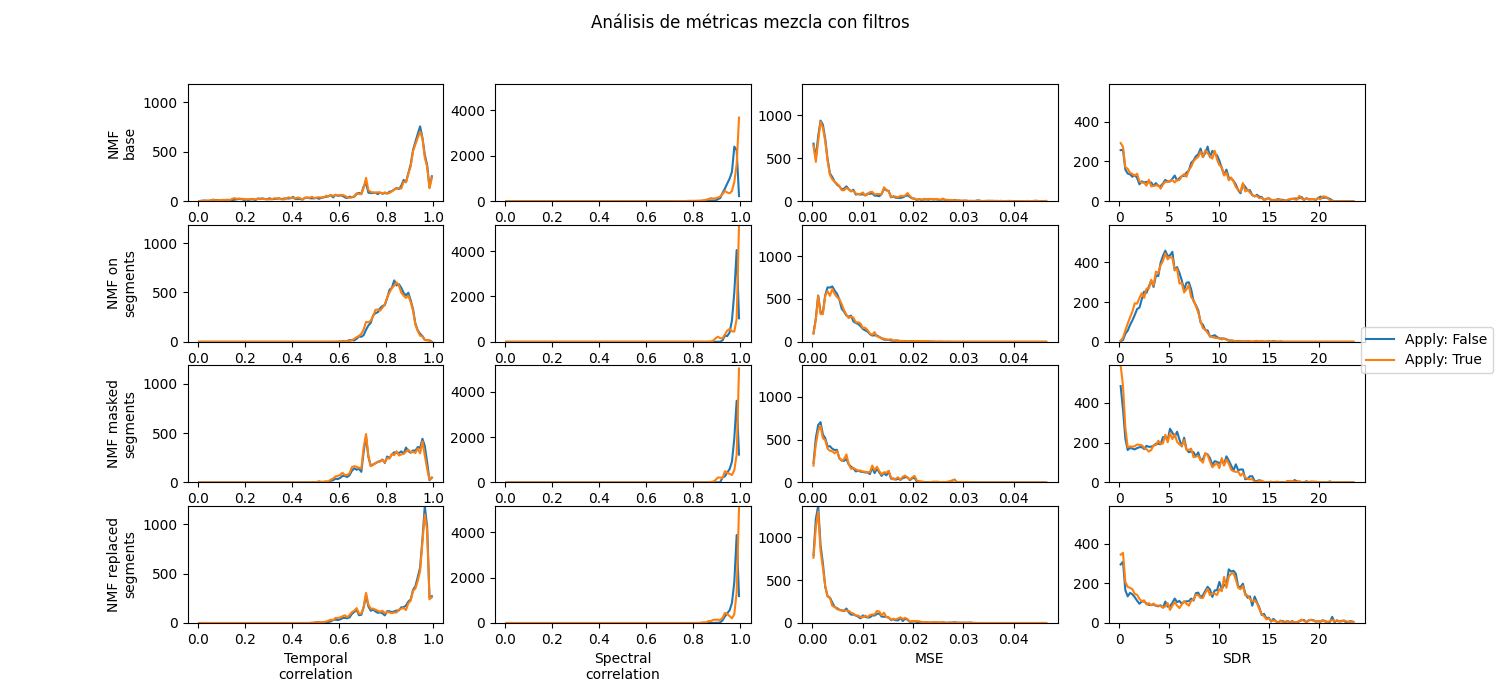

In [62]:
%matplotlib notebook
def hist_plots_filter(fig, ax, bins=40):
    def _plot_hist(num, input_array, bins, axs, interval=None, label=None):
        hist, bin_edges = np.histogram(a=input_array, bins=bins, range=interval)
        bins_plot = [np.mean(bin_edges[i:i+2]) for i in range(len(bin_edges) - 1)]
        
        if label is None:
            axs.plot(bins_plot, hist, color=f'C{num}')
        else:
            axs.plot(bins_plot, hist, color=f'C{num}', label=label)
        
        return hist
    
    # Definición de las posibilidades de N
    bool_list = (False, True)
    
    # Definición del límite máximo x para MSE y SDR
    max_mse_x_list = list()
    max_sdr_x_list = list()
    
    for bool_to in bool_list:
        max_mse_x_list.append(max(mse_all[bool_to]))
        max_mse_x_list.append(max(mse_seg[bool_to]))
        max_mse_x_list.append(max(mse_mask[bool_to]))
        max_mse_x_list.append(max(mse_repl[bool_to]))        
        
        max_sdr_x_list.append(max(sdr_all[bool_to]))
        max_sdr_x_list.append(max(sdr_seg[bool_to]))
        max_sdr_x_list.append(max(sdr_mask[bool_to]))
        max_sdr_x_list.append(max(sdr_repl[bool_to]))
    
    max_mse_x = max(max_mse_x_list)
    max_sdr_x = max(max_sdr_x_list)
    
    # Definición del límite máximo y
    max_temp_y = 0
    max_spec_y = 0
    max_mse_y = 0
    max_sdr_y = 0
    
    # Temporal correlation
    for num, bool_to in enumerate(bool_list):
        ####      Obtener los histogramas      ####
        # to_all
        hist_temp_all = _plot_hist(num, temp_all[bool_to], bins=bins, axs=ax[0][0], interval=(0,1), 
                                   label=f'Apply: {bool_to}')
        hist_spec_all = _plot_hist(num, spec_all[bool_to], bins=bins, axs=ax[0][1], interval=(0,1))
        hist_mse_all = _plot_hist(num, mse_all[bool_to], bins=bins, axs=ax[0][2], interval=(0, max_mse_x))
        hist_sdr_all = _plot_hist(num, sdr_all[bool_to], bins=bins, axs=ax[0][3], interval=(0, max_sdr_x))
        
        # on_segments
        hist_temp_seg = _plot_hist(num, temp_seg[bool_to], bins=bins, axs=ax[1][0], interval=(0,1))
        hist_spec_seg = _plot_hist(num, spec_seg[bool_to], bins=bins, axs=ax[1][1], interval=(0,1))
        hist_mse_seg = _plot_hist(num, mse_seg[bool_to], bins=bins, axs=ax[1][2], interval=(0, max_mse_x))
        hist_sdr_seg = _plot_hist(num, sdr_seg[bool_to], bins=bins, axs=ax[1][3], interval=(0, max_sdr_x))
        
        # masked_segments
        hist_temp_mask = _plot_hist(num, temp_mask[bool_to], bins=bins, axs=ax[2][0], interval=(0,1))
        hist_spec_mask = _plot_hist(num, spec_mask[bool_to], bins=bins, axs=ax[2][1], interval=(0,1))
        hist_mse_mask = _plot_hist(num, mse_mask[bool_to], bins=bins, axs=ax[2][2], interval=(0, max_mse_x))
        hist_sdr_mask = _plot_hist(num, sdr_mask[bool_to], bins=bins, axs=ax[2][3], interval=(0, max_sdr_x))
        
        # replaced_segments
        hist_temp_repl = _plot_hist(num, temp_repl[bool_to], bins=bins, axs=ax[3][0], interval=(0,1))
        hist_spec_repl = _plot_hist(num, spec_repl[bool_to], bins=bins, axs=ax[3][1], interval=(0,1))
        hist_mse_repl = _plot_hist(num, mse_repl[bool_to], bins=bins, axs=ax[3][2], interval=(0, max_mse_x))
        hist_sdr_repl = _plot_hist(num, sdr_repl[bool_to], bins=bins, axs=ax[3][3], interval=(0, max_sdr_x))
        
        # Máximos para los límites de los ejes y
        max_temp_y = max(max_temp_y, max(hist_temp_all), 
                         max(hist_temp_seg), max(hist_temp_mask),
                         max(hist_temp_repl)) 
        max_spec_y = max(max_spec_y, max(hist_spec_all), 
                         max(hist_spec_seg), max(hist_spec_mask),
                         max(hist_spec_repl))
        max_mse_y = max(max_mse_y, max(hist_mse_all), 
                        max(hist_mse_seg), max(hist_mse_mask),
                        max(hist_mse_repl))
        max_sdr_y = max(max_sdr_y, max(hist_sdr_all), 
                        max(hist_sdr_seg), max(hist_sdr_mask),
                        max(hist_sdr_repl))
        
    # Seteando los ylabel
    ax[0][0].set_ylabel('NMF\nbase')
    ax[0][1].set_ylabel('')
    ax[0][2].set_ylabel('')
    ax[0][3].set_ylabel('')
    ax[1][0].set_ylabel('NMF on\nsegments')
    ax[1][1].set_ylabel('')
    ax[1][2].set_ylabel('')
    ax[1][3].set_ylabel('')
    ax[2][0].set_ylabel('NMF masked\nsegments')
    ax[2][1].set_ylabel('')
    ax[2][2].set_ylabel('')
    ax[2][3].set_ylabel('')
    ax[3][0].set_ylabel('NMF replaced\nsegments')
    ax[3][1].set_ylabel('')
    ax[3][2].set_ylabel('')
    ax[3][3].set_ylabel('')

    # Seteando los títulos
    ax[3][0].set_xlabel('Temporal\ncorrelation')
    ax[3][1].set_xlabel('Spectral\ncorrelation')
    ax[3][2].set_xlabel('MSE')
    ax[3][3].set_xlabel('SDR')

    # Seteando las leyendas
    fig.legend(loc='center right')
    
    # Ajustando los límites
    ax[0][0].set_ylim([0, max_temp_y])
    ax[1][0].set_ylim([0, max_temp_y])
    ax[2][0].set_ylim([0, max_temp_y])
    ax[3][0].set_ylim([0, max_temp_y])

    ax[0][1].set_ylim([0, max_spec_y])
    ax[1][1].set_ylim([0, max_spec_y])
    ax[2][1].set_ylim([0, max_spec_y])
    ax[3][1].set_ylim([0, max_spec_y])

    ax[0][2].set_ylim([0, max_mse_y])
    ax[1][2].set_ylim([0, max_mse_y])
    ax[2][2].set_ylim([0, max_mse_y])
    ax[3][2].set_ylim([0, max_mse_y])

    ax[0][3].set_ylim([0, max_sdr_y])
    ax[1][3].set_ylim([0, max_sdr_y])
    ax[2][3].set_ylim([0, max_sdr_y])
    ax[3][3].set_ylim([0, max_sdr_y])

    # Ajustando las etiquetas del eje
    fig.align_ylabels(ax[:])
    fig.subplots_adjust(right=0.91)
    fig.suptitle(r'Análisis de métricas mezcla con filtros')
    
    plt.savefig('Images/filter_analysis.pdf', transparent=True)
    plt.show()

    
# Función a ejecutar
fig, ax = plt.subplots(4, 4, figsize=(15,7), sharex=False)
hist_plots_filter(fig, ax, bins=100)

# Resultados para la tabla

In [106]:
def get_table_results(N, nov, dec_criteria, bool_filt, nmf_method):
    with open(f'Results/Register_{nmf_method}.txt', 'r', encoding='utf8') as file:
        # Definición de los diccionarios que ordenarán los resultados para cada 
        # parámetro 
        temp_corr_dict = defaultdict(list)
        spec_corr_dict = defaultdict(list)
        mse_dict = defaultdict(list)
        sdr_dict = defaultdict(list)

        for line in file:
            # Obteniendo el diccionario de interés
            dict_to_rev = literal_eval(line.strip())
            
            # Si es que cumple con la definición del análisis realizado
            if (dict_to_rev['N'] == N and dict_to_rev['noverlap'] == int(nov * N) and
                dict_to_rev['dec_criteria'] == dec_criteria and
                dict_to_rev['filter_parameters']['bool'] == bool_filt):
                # Definir la combinación beta/n_comps para guardar los datos
                index_to = (dict_to_rev['beta'], dict_to_rev['n_components'])
                
                # Añadiendo información a los diccionarios en base a los criterios
                temp_corr_dict[index_to].extend(dict_to_rev['Temp'])
                spec_corr_dict[index_to].extend(dict_to_rev['Spec'])
                mse_dict[index_to].extend(dict_to_rev['MSE'])
                sdr_dict[index_to].extend(dict_to_rev['SDR'])
            
    return temp_corr_dict, spec_corr_dict, mse_dict, sdr_dict


N = 2048
nov = 0.9
dec_criteria = 'temp_criterion'
bool_filt = False

temp_all, spec_all, mse_all, sdr_all = \
        get_table_results(N=N, nov=nov, dec_criteria=dec_criteria, 
                          bool_filt=bool_filt, nmf_method='to_all')
temp_seg, spec_seg, mse_seg, sdr_seg = \
        get_table_results(N=N, nov=nov, dec_criteria=dec_criteria, 
                          bool_filt=bool_filt, nmf_method='on_segments')
temp_mask, spec_mask, mse_mask, sdr_mask = \
        get_table_results(N=N, nov=nov, dec_criteria=dec_criteria, 
                          bool_filt=bool_filt, nmf_method='masked_segments')
temp_repl, spec_repl, mse_repl, sdr_repl = \
        get_table_results(N=N, nov=nov, dec_criteria=dec_criteria, 
                          bool_filt=bool_filt, nmf_method='replace_segments')

## Formateando para pegar en excel

In [114]:
beta_tuple = (1, 2)
k_tuple = (2, 3, 5, 7, 10, 15, 20, 30)
print_sim_msg = False
metric_type = 'temp'
print_std = True

if metric_type == 'temp':
    print('Correlación temporal')
elif metric_type == 'spec':
    print('Correlación espectral')
elif metric_type == 'mse':
    print('MSE')
elif metric_type == 'sdr':
    print('SDR')

for beta in beta_tuple:
    for k in k_tuple:
        # Definición de las listas de interés a revisar
        if metric_type == 'temp':
            interest_all = temp_all[(beta, k)]
            interest_seg = temp_seg[(beta, k)]
            interest_mask = temp_mask[(beta, k)]
            interest_repl = temp_repl[(beta, k)]

        elif metric_type == 'spec':
            interest_all = spec_all[(beta, k)]
            interest_seg = spec_seg[(beta, k)]
            interest_mask = spec_mask[(beta, k)]
            interest_repl = spec_repl[(beta, k)]

        elif metric_type == 'mse':
            interest_all = mse_all[(beta, k)]
            interest_seg = mse_seg[(beta, k)]
            interest_mask = mse_mask[(beta, k)]
            interest_repl = mse_repl[(beta, k)]

        elif metric_type == 'sdr':
            interest_all = sdr_all[(beta, k)]
            interest_seg = sdr_seg[(beta, k)]
            interest_mask = sdr_mask[(beta, k)]
            interest_repl = sdr_repl[(beta, k)]
            
        if print_sim_msg:
            print(f'Simulación ({beta}, {k}): '
                  f'{round(np.mean(interest_all), 4)} pm {round(np.std(interest_all), 4)},'
                  f'{round(np.mean(interest_seg), 4)} pm {round(np.std(interest_seg), 4)},'
                  f'{round(np.mean(interest_mask), 4)} pm {round(np.std(interest_mask), 4)},'
                  f'{round(np.mean(interest_repl), 4)} pm {round(np.std(interest_repl), 4)}')
        else:
            if print_std:
                print(f'{round(np.mean(interest_all), 4)} pm {round(np.std(interest_all), 4)},'
                      f'{round(np.mean(interest_seg), 4)} pm {round(np.std(interest_seg), 4)},'
                      f'{round(np.mean(interest_mask), 4)} pm {round(np.std(interest_mask), 4)},'
                      f'{round(np.mean(interest_repl), 4)} pm {round(np.std(interest_repl), 4)}')
            else:
                print(f'{round(np.mean(interest_all), 4)},'
                      f'{round(np.mean(interest_seg), 4)},'
                      f'{round(np.mean(interest_mask), 4)},'
                      f'{round(np.mean(interest_repl), 4)}')

Correlación temporal
0.9379 pm 0.0707,0.9023 pm 0.0216,0.9425 pm 0.0282,0.9608 pm 0.0314
0.9462 pm 0.0285,0.8838 pm 0.0248,0.9294 pm 0.0313,0.9569 pm 0.0249
0.9507 pm 0.0251,0.8888 pm 0.0169,0.8651 pm 0.0712,0.9642 pm 0.0211
0.9391 pm 0.0409,0.8957 pm 0.0134,0.8753 pm 0.0426,0.9629 pm 0.0202
0.9391 pm 0.0315,0.897 pm 0.0132,0.8709 pm 0.0379,0.962 pm 0.02
0.9336 pm 0.0294,0.8954 pm 0.0163,0.8763 pm 0.0447,0.9594 pm 0.0172
0.9354 pm 0.0392,0.8971 pm 0.0145,0.9045 pm 0.0412,0.9598 pm 0.0224
0.9375 pm 0.0384,0.8947 pm 0.0169,0.9076 pm 0.0508,0.9626 pm 0.0186
0.9481 pm 0.024,0.8834 pm 0.0313,0.8648 pm 0.1396,0.965 pm 0.0143
0.9498 pm 0.0227,0.8835 pm 0.0194,0.8998 pm 0.073,0.9641 pm 0.0161
0.9431 pm 0.0305,0.8939 pm 0.0139,0.8839 pm 0.0633,0.9617 pm 0.0245
0.9389 pm 0.0341,0.8923 pm 0.0158,0.9045 pm 0.0437,0.9615 pm 0.0237
0.9436 pm 0.0307,0.8963 pm 0.0126,0.8973 pm 0.0539,0.9659 pm 0.0182
0.9356 pm 0.0377,0.8925 pm 0.0141,0.8848 pm 0.0432,0.9574 pm 0.0214
0.9377 pm 0.0343,0.8955 pm 0.0146,

# Más pruebas...

In [46]:
def get_results_filtered(N_list, ncomps_list, interest_parameter, nmf_method):
    with open(f'Results/Register_{nmf_method}.txt', 'r', encoding='utf8') as file:
        # Definición de los diccionarios que ordenarán los resultados para cada 
        # parámetro 
        temp_corr_dict = defaultdict(list)
        spec_corr_dict = defaultdict(list)
        mse_dict = defaultdict(list)
        sdr_dict = defaultdict(list)

        for line in file:
            # Obteniendo el diccionario de interés
            dict_to_rev = literal_eval(line.strip())
            
            if (dict_to_rev['N'] in N_list and dict_to_rev['n_components'] in ncomps_list):
                # Añadiendo información a los diccionarios en base a los criterios
                temp_corr_dict[dict_to_rev[interest_parameter]].extend(dict_to_rev['Temp'])
                spec_corr_dict[dict_to_rev[interest_parameter]].extend(dict_to_rev['Spec'])
                mse_dict[dict_to_rev[interest_parameter]].extend(dict_to_rev['MSE'])
                sdr_dict[dict_to_rev[interest_parameter]].extend(dict_to_rev['SDR'])
            
    return temp_corr_dict, spec_corr_dict, mse_dict, sdr_dict


def density_plots_nov_nofill():
    fig, ax = plt.subplots(3, 4, figsize=(15,7), sharex=False)

    #### NMF BASE ####
    sns.kdeplot(temp_all[0.5], color='C0', label=r'$nov = 50\%$',
                fill=False, alpha=0.05, ax=ax[0][0])
    sns.kdeplot(temp_all[0.75], color='C1', label=r'$nov = 75\%$',
                fill=False, alpha=0.05, ax=ax[0][0])
    sns.kdeplot(temp_all[0.9], color='C2', label=r'$nov = 90\%$',
                fill=False, alpha=0.05, ax=ax[0][0])
    
    sns.kdeplot(spec_all[0.5], color='C0',
                fill=False, alpha=0.05, ax=ax[0][1])
    sns.kdeplot(spec_all[0.75], color='C1',
                fill=False, alpha=0.05, ax=ax[0][1])
    sns.kdeplot(spec_all[0.9], color='C2',
                fill=False, alpha=0.05, ax=ax[0][1])

    sns.kdeplot(mse_all[0.5], color='C0',
                fill=False, alpha=0.05, ax=ax[0][2])
    sns.kdeplot(mse_all[0.75], color='C1',
                fill=False, alpha=0.05, ax=ax[0][2])
    sns.kdeplot(mse_all[0.9], color='C2',
                fill=False, alpha=0.05, ax=ax[0][2])
    
    sns.kdeplot(sdr_all[0.5], color='C0',
                fill=False, alpha=0.05, ax=ax[0][3])
    sns.kdeplot(sdr_all[0.75], color='C1',
                fill=False, alpha=0.05, ax=ax[0][3])
    sns.kdeplot(sdr_all[0.9], color='C2',
                fill=False, alpha=0.05, ax=ax[0][3])
    
    
    #### NMF on segments ####
    sns.kdeplot(temp_seg[0.5], color='C0', 
                fill=False, alpha=0.05, ax=ax[1][0])
    sns.kdeplot(temp_seg[0.75], color='C1',
                fill=False, alpha=0.05, ax=ax[1][0])
    sns.kdeplot(temp_seg[0.9], color='C2', 
                fill=False, alpha=0.05, ax=ax[1][0])
    
    sns.kdeplot(spec_seg[0.5], color='C0',
                fill=False, alpha=0.05, ax=ax[1][1])
    sns.kdeplot(spec_seg[0.75], color='C1',
                fill=False, alpha=0.05, ax=ax[1][1])
    sns.kdeplot(spec_seg[0.9], color='C2',
                fill=False, alpha=0.05, ax=ax[1][1])

    sns.kdeplot(mse_seg[0.5], color='C0',
                fill=False, alpha=0.05, ax=ax[1][2])
    sns.kdeplot(mse_seg[0.75], color='C1',
                fill=False, alpha=0.05, ax=ax[1][2])
    sns.kdeplot(mse_seg[0.9], color='C2',
                fill=False, alpha=0.05, ax=ax[1][2])
    
    sns.kdeplot(sdr_seg[0.5], color='C0',
                fill=False, alpha=0.05, ax=ax[1][3])
    sns.kdeplot(sdr_seg[0.75], color='C1',
                fill=False, alpha=0.05, ax=ax[1][3])
    sns.kdeplot(sdr_seg[0.9], color='C2',
                fill=False, alpha=0.05, ax=ax[1][3])
    
    
    #### NMF masked segments ####
    sns.kdeplot(temp_mask[0.5], color='C0', 
                fill=False, alpha=0.05, ax=ax[2][0])
    sns.kdeplot(temp_mask[0.75], color='C1',
                fill=False, alpha=0.05, ax=ax[2][0])
    sns.kdeplot(temp_mask[0.9], color='C2', 
                fill=False, alpha=0.05, ax=ax[2][0])
    
    sns.kdeplot(spec_mask[0.5], color='C0',
                fill=False, alpha=0.05, ax=ax[2][1])
    sns.kdeplot(spec_mask[0.75], color='C1',
                fill=False, alpha=0.05, ax=ax[2][1])
    sns.kdeplot(spec_mask[0.9], color='C2',
                fill=False, alpha=0.05, ax=ax[2][1])

    sns.kdeplot(mse_mask[0.5], color='C0',
                fill=False, alpha=0.05, ax=ax[2][2])
    sns.kdeplot(mse_mask[0.75], color='C1',
                fill=False, alpha=0.05, ax=ax[2][2])
    sns.kdeplot(mse_mask[0.9], color='C2',
                fill=False, alpha=0.05, ax=ax[2][2])
    
    sns.kdeplot(sdr_mask[0.5], color='C0',
                fill=False, alpha=0.05, ax=ax[2][3])
    sns.kdeplot(sdr_mask[0.75], color='C1',
                fill=False, alpha=0.05, ax=ax[2][3])
    sns.kdeplot(sdr_mask[0.9], color='C2',
                fill=False, alpha=0.05, ax=ax[2][3])


    # Seteando los ylabel
    ax[0][0].set_ylabel('NMF\nbase')
    ax[0][1].set_ylabel('')
    ax[0][2].set_ylabel('')
    ax[0][3].set_ylabel('')
    ax[1][0].set_ylabel('NMF on\nsegments')
    ax[1][1].set_ylabel('')
    ax[1][2].set_ylabel('')
    ax[1][3].set_ylabel('')
    ax[2][0].set_ylabel('NMF masked\nsegments')
    ax[2][1].set_ylabel('')
    ax[2][2].set_ylabel('')
    ax[2][3].set_ylabel('')

    # Seteando los títulos
    ax[2][0].set_xlabel('Temporal\ncorrelation')
    ax[2][1].set_xlabel('Spectral\ncorrelation')
    ax[2][2].set_xlabel('MSE')
    ax[2][3].set_xlabel('SDR')

    # Seteando las leyendas
    fig.legend(loc='center right')

    # Ajustando los límites
    ax[0][0].set_xlim([0.35, 1.06])
    ax[1][0].set_xlim([0.35, 1.06])
    ax[2][0].set_xlim([0.35, 1.06])
    ax[0][0].set_ylim([0, 8])
    ax[1][0].set_ylim([0, 8])
    ax[2][0].set_ylim([0, 8])

    ax[0][1].set_xlim([0.7, 1.03])
    ax[1][1].set_xlim([0.7, 1.03])
    ax[2][1].set_xlim([0.7, 1.03])
    ax[0][1].set_ylim([0, 48])
    ax[1][1].set_ylim([0, 48])
    ax[2][1].set_ylim([0, 48])

    ax[0][2].set_xlim([-0.006, 0.035])
    ax[1][2].set_xlim([-0.006, 0.035])
    ax[2][2].set_xlim([-0.006, 0.035])
    ax[0][2].set_ylim([0, 160])
    ax[1][2].set_ylim([0, 160])
    ax[2][2].set_ylim([0, 160])

    ax[0][3].set_xlim([-5, 25])
    ax[1][3].set_xlim([-5, 25])
    ax[2][3].set_xlim([-5, 25])
    ax[0][3].set_ylim([0, 0.24])
    ax[1][3].set_ylim([0, 0.24])
    ax[2][3].set_ylim([0, 0.24])
    
    # Ajustando las etiquetas del eje
    fig.align_ylabels(ax[:])
    fig.subplots_adjust(right=0.91)
    fig.suptitle(r'Análisis de métricas parámetro $noverlap$')
    plt.savefig('Images/noverlap_analysis.pdf', transparent=True)
    plt.show()

    
def density_plots_N_nofill():
    fig, ax = plt.subplots(3, 4, figsize=(9,7), sharex=False)

    #### NMF BASE ####
    sns.kdeplot(temp_all[512], color='C0', label=r'$N = 512$',
                fill=False, alpha=0.05, ax=ax[0][0])
    sns.kdeplot(temp_all[1024], color='C1', label=r'$N = 1024$',
                fill=False, alpha=0.05, ax=ax[0][0])
    sns.kdeplot(temp_all[2048], color='C2', label=r'$N = 2048$',
                fill=False, alpha=0.05, ax=ax[0][0])
    sns.kdeplot(temp_all[4096], color='C3', label=r'$N = 4096$',
                fill=False, alpha=0.05, ax=ax[0][0])

    sns.kdeplot(spec_all[512], color='C0', 
                fill=False, alpha=0.05, ax=ax[0][1])
    sns.kdeplot(spec_all[1024], color='C1',
                fill=False, alpha=0.05, ax=ax[0][1])
    sns.kdeplot(spec_all[2048], color='C2',
                fill=False, alpha=0.05, ax=ax[0][1])
    sns.kdeplot(spec_all[4096], color='C3',
                fill=False, alpha=0.05, ax=ax[0][1])

    sns.kdeplot(mse_all[512], color='C0', 
                fill=False, alpha=0.05, ax=ax[0][2])
    sns.kdeplot(mse_all[1024], color='C1',
                fill=False, alpha=0.05, ax=ax[0][2])
    sns.kdeplot(mse_all[2048], color='C2',
                fill=False, alpha=0.05, ax=ax[0][2])
    sns.kdeplot(mse_all[4096], color='C3',
                fill=False, alpha=0.05, ax=ax[0][2])

    sns.kdeplot(sdr_all[512], color='C0', 
                fill=False, alpha=0.05, ax=ax[0][3])
    sns.kdeplot(sdr_all[1024], color='C1',
                fill=False, alpha=0.05, ax=ax[0][3])
    sns.kdeplot(sdr_all[2048], color='C2',
                fill=False, alpha=0.05, ax=ax[0][3])
    sns.kdeplot(sdr_all[4096], color='C3',
                fill=False, alpha=0.05, ax=ax[0][3])

    #### NMF on segments ####
    sns.kdeplot(temp_seg[512], color='C0', 
                fill=False, alpha=0.05, ax=ax[1][0])
    sns.kdeplot(temp_seg[1024], color='C1',
                fill=False, alpha=0.05, ax=ax[1][0])
    sns.kdeplot(temp_seg[2048], color='C2',
                fill=False, alpha=0.05, ax=ax[1][0])
    sns.kdeplot(temp_seg[4096], color='C3',
                fill=False, alpha=0.05, ax=ax[1][0])

    sns.kdeplot(spec_seg[512], color='C0', 
                fill=False, alpha=0.05, ax=ax[1][1])
    sns.kdeplot(spec_seg[1024], color='C1',
                fill=False, alpha=0.05, ax=ax[1][1])
    sns.kdeplot(spec_seg[2048], color='C2',
                fill=False, alpha=0.05, ax=ax[1][1])
    sns.kdeplot(spec_seg[4096], color='C3',
                fill=False, alpha=0.05, ax=ax[1][1])

    sns.kdeplot(mse_seg[512], color='C0', 
                fill=False, alpha=0.05, ax=ax[1][2])
    sns.kdeplot(mse_seg[1024], color='C1',
                fill=False, alpha=0.05, ax=ax[1][2])
    sns.kdeplot(mse_seg[2048], color='C2',
                fill=False, alpha=0.05, ax=ax[1][2])
    sns.kdeplot(mse_seg[4096], color='C3',
                fill=False, alpha=0.05, ax=ax[1][2])

    sns.kdeplot(sdr_seg[512], color='C0', 
                fill=False, alpha=0.05, ax=ax[1][3])
    sns.kdeplot(sdr_seg[1024], color='C1',
                fill=False, alpha=0.05, ax=ax[1][3])
    sns.kdeplot(sdr_seg[2048], color='C2',
                fill=False, alpha=0.05, ax=ax[1][3])
    sns.kdeplot(sdr_seg[4096], color='C3',
                fill=False, alpha=0.05, ax=ax[1][3])

    #### NMF masked segments ####
    sns.kdeplot(temp_mask[512], color='C0', 
                fill=False, alpha=0.05, ax=ax[2][0])
    sns.kdeplot(temp_mask[1024], color='C1',
                fill=False, alpha=0.05, ax=ax[2][0])
    sns.kdeplot(temp_mask[2048], color='C2',
                fill=False, alpha=0.05, ax=ax[2][0])
    sns.kdeplot(temp_mask[4096], color='C3',
                fill=False, alpha=0.05, ax=ax[2][0])

    sns.kdeplot(spec_mask[512], color='C0', 
                fill=False, alpha=0.05, ax=ax[2][1])
    sns.kdeplot(spec_mask[1024], color='C1',
                fill=False, alpha=0.05, ax=ax[2][1])
    sns.kdeplot(spec_mask[2048], color='C2',
                fill=False, alpha=0.05, ax=ax[2][1])
    sns.kdeplot(spec_mask[4096], color='C3',
                fill=False, alpha=0.05, ax=ax[2][1])

    sns.kdeplot(mse_mask[512], color='C0', 
                fill=False, alpha=0.05, ax=ax[2][2])
    sns.kdeplot(mse_mask[1024], color='C1',
                fill=False, alpha=0.05, ax=ax[2][2])
    sns.kdeplot(mse_mask[2048], color='C2',
                fill=False, alpha=0.05, ax=ax[2][2])
    sns.kdeplot(mse_mask[4096], color='C3',
                fill=False, alpha=0.05, ax=ax[2][2])

    sns.kdeplot(sdr_mask[512], color='C0', 
                fill=False, alpha=0.05, ax=ax[2][3])
    sns.kdeplot(sdr_mask[1024], color='C1',
                fill=False, alpha=0.05, ax=ax[2][3])
    sns.kdeplot(sdr_mask[2048], color='C2',
                fill=False, alpha=0.05, ax=ax[2][3])
    sns.kdeplot(sdr_mask[4096], color='C3',
                fill=False, alpha=0.05, ax=ax[2][3])



    # Seteando los ylabel
    ax[0][0].set_ylabel('NMF\nbase')
    ax[0][1].set_ylabel('')
    ax[0][2].set_ylabel('')
    ax[0][3].set_ylabel('')
    ax[1][0].set_ylabel('NMF on\nsegments')
    ax[1][1].set_ylabel('')
    ax[1][2].set_ylabel('')
    ax[1][3].set_ylabel('')
    ax[2][0].set_ylabel('NMF masked\nsegments')
    ax[2][1].set_ylabel('')
    ax[2][2].set_ylabel('')
    ax[2][3].set_ylabel('')

    # Seteando los títulos
    ax[2][0].set_xlabel('Temporal\ncorrelation')
    ax[2][1].set_xlabel('Spectral\ncorrelation')
    ax[2][2].set_xlabel('MSE')
    ax[2][3].set_xlabel('SDR')

    # Seteando las leyendas
    fig.legend(loc='center right')

    # Ajustando los límites
    ax[0][0].set_xlim([0.3, 1.1])
    ax[1][0].set_xlim([0.3, 1.1])
    ax[2][0].set_xlim([0.3, 1.1])
    ax[0][0].set_ylim([0, 12])
    ax[1][0].set_ylim([0, 12])
    ax[2][0].set_ylim([0, 12])

    ax[0][1].set_xlim([0.7, 1.03])
    ax[1][1].set_xlim([0.7, 1.03])
    ax[2][1].set_xlim([0.7, 1.03])
    ax[0][1].set_ylim([0, 50])
    ax[1][1].set_ylim([0, 50])
    ax[2][1].set_ylim([0, 50])

    ax[0][2].set_xlim([-0.006, 0.035])
    ax[1][2].set_xlim([-0.006, 0.035])
    ax[2][2].set_xlim([-0.006, 0.035])
    ax[0][2].set_ylim([0, 170])
    ax[1][2].set_ylim([0, 170])
    ax[2][2].set_ylim([0, 170])

    ax[0][3].set_xlim([-5, 25])
    ax[1][3].set_xlim([-5, 25])
    ax[2][3].set_xlim([-5, 25])
    ax[0][3].set_ylim([0, 0.4])
    ax[1][3].set_ylim([0, 0.4])
    ax[2][3].set_ylim([0, 0.4])

    # Ajustando las etiquetas del eje
    fig.align_ylabels(ax[:])
    fig.subplots_adjust(right=0.91)
    fig.suptitle(r'Análisis de métricas parámetro $N_{wind}$')
    
#     plt.savefig('Images/N_analysis.pdf', transparent=True)
    plt.show()
     

def density_plots_beta_nofill():
    fig, ax = plt.subplots(3, 4, figsize=(15,7), sharex=False)

    #### NMF BASE ####
    sns.kdeplot(temp_all[1], color='C0', label=r'$\beta = 1$',
                fill=False, alpha=0.05, ax=ax[0][0])
    sns.kdeplot(temp_all[2], color='C1', label=r'$\beta = 2$',
                fill=False, alpha=0.05, ax=ax[0][0])
    
    sns.kdeplot(spec_all[1], color='C0',
                fill=False, alpha=0.05, ax=ax[0][1])
    sns.kdeplot(spec_all[2], color='C1',
                fill=False, alpha=0.05, ax=ax[0][1])
    
    sns.kdeplot(mse_all[1], color='C0',
                fill=False, alpha=0.05, ax=ax[0][2])
    sns.kdeplot(mse_all[2], color='C1',
                fill=False, alpha=0.05, ax=ax[0][2])
    
    sns.kdeplot(sdr_all[1], color='C0',
                fill=False, alpha=0.05, ax=ax[0][3])
    sns.kdeplot(sdr_all[2], color='C1',
                fill=False, alpha=0.05, ax=ax[0][3])
    
    
    #### NMF on segments ####
    sns.kdeplot(temp_seg[1], color='C0',
                fill=False, alpha=0.05, ax=ax[1][0])
    sns.kdeplot(temp_seg[2], color='C1',
              fill=False, alpha=0.05, ax=ax[1][0])

    sns.kdeplot(spec_seg[1], color='C0',
              fill=False, alpha=0.05, ax=ax[1][1])
    sns.kdeplot(spec_seg[2], color='C1',
              fill=False, alpha=0.05, ax=ax[1][1])

    sns.kdeplot(mse_seg[1], color='C0',
              fill=False, alpha=0.05, ax=ax[1][2])
    sns.kdeplot(mse_seg[2], color='C1',
              fill=False, alpha=0.05, ax=ax[1][2])

    sns.kdeplot(sdr_seg[1], color='C0',
              fill=False, alpha=0.05, ax=ax[1][3])
    sns.kdeplot(sdr_seg[2], color='C1',
              fill=False, alpha=0.05, ax=ax[1][3])
    
    
    #### NMF masked segments ####
    sns.kdeplot(temp_mask[1], color='C0',
            fill=False, alpha=0.05, ax=ax[2][0])
    sns.kdeplot(temp_mask[2], color='C1',
              fill=False, alpha=0.05, ax=ax[2][0])

    sns.kdeplot(spec_mask[1], color='C0',
              fill=False, alpha=0.05, ax=ax[2][1])
    sns.kdeplot(spec_mask[2], color='C1',
              fill=False, alpha=0.05, ax=ax[2][1])

    sns.kdeplot(mse_mask[1], color='C0',
              fill=False, alpha=0.05, ax=ax[2][2])
    sns.kdeplot(mse_mask[2], color='C1',
              fill=False, alpha=0.05, ax=ax[2][2])

    sns.kdeplot(sdr_mask[1], color='C0',
              fill=False, alpha=0.05, ax=ax[2][3])
    sns.kdeplot(sdr_mask[2], color='C1',
              fill=False, alpha=0.05, ax=ax[2][3])



    # Seteando los ylabel
    ax[0][0].set_ylabel('NMF\nbase')
    ax[0][1].set_ylabel('')
    ax[0][2].set_ylabel('')
    ax[0][3].set_ylabel('')
    ax[1][0].set_ylabel('NMF on\nsegments')
    ax[1][1].set_ylabel('')
    ax[1][2].set_ylabel('')
    ax[1][3].set_ylabel('')
    ax[2][0].set_ylabel('NMF masked\nsegments')
    ax[2][1].set_ylabel('')
    ax[2][2].set_ylabel('')
    ax[2][3].set_ylabel('')

    # Seteando los títulos
    ax[2][0].set_xlabel('Temporal\ncorrelation')
    ax[2][1].set_xlabel('Spectral\ncorrelation')
    ax[2][2].set_xlabel('MSE')
    ax[2][3].set_xlabel('SDR')

    # Seteando las leyendas
    fig.legend(loc='center right')

    # Ajustando los límites
    ax[0][0].set_xlim([0.35, 1.06])
    ax[1][0].set_xlim([0.35, 1.06])
    ax[2][0].set_xlim([0.35, 1.06])
    ax[0][0].set_ylim([0, 10])
    ax[1][0].set_ylim([0, 10])
    ax[2][0].set_ylim([0, 10])

    ax[0][1].set_xlim([0.7, 1.03])
    ax[1][1].set_xlim([0.7, 1.03])
    ax[2][1].set_xlim([0.7, 1.03])
    ax[0][1].set_ylim([0, 45])
    ax[1][1].set_ylim([0, 45])
    ax[2][1].set_ylim([0, 45])

    ax[0][2].set_xlim([-0.006, 0.035])
    ax[1][2].set_xlim([-0.006, 0.035])
    ax[2][2].set_xlim([-0.006, 0.035])
    ax[0][2].set_ylim([0, 260])
    ax[1][2].set_ylim([0, 260])
    ax[2][2].set_ylim([0, 260])

    ax[0][3].set_xlim([-5, 25])
    ax[1][3].set_xlim([-5, 25])
    ax[2][3].set_xlim([-5, 25])
    ax[0][3].set_ylim([0, 0.31])
    ax[1][3].set_ylim([0, 0.31])
    ax[2][3].set_ylim([0, 0.31])

    # Ajustando las etiquetas del eje
    fig.align_ylabels(ax[:])
    fig.subplots_adjust(right=0.91)
    fig.suptitle(r'Análisis de métricas parámetro $\beta$')
    
    plt.savefig('Images/beta_analysis.pdf', transparent=True)
    plt.show()

        
def density_plots_comps_nofill():
    fig, ax = plt.subplots(3, 4, figsize=(15,7), sharex=False)

    #### NMF BASE ####
    sns.kdeplot(temp_all[2], color='C0', label=r'$K = 2$',
                fill=False, alpha=0, ax=ax[0][0])
    sns.kdeplot(temp_all[3], color='C1', label=r'$K = 3$',
                fill=False, alpha=0, ax=ax[0][0])
    sns.kdeplot(temp_all[4], color='C2', label=r'$K = 4$',
                fill=False, alpha=0, ax=ax[0][0])
    sns.kdeplot(temp_all[5], color='C3', label=r'$K = 5$',
                fill=False, alpha=0, ax=ax[0][0])
    sns.kdeplot(temp_all[7], color='C4', label=r'$K = 7$',
                fill=False, alpha=0, ax=ax[0][0])
    sns.kdeplot(temp_all[10], color='C5', label=r'$K = 10$',
                fill=False, alpha=0, ax=ax[0][0])
    sns.kdeplot(temp_all[15], color='C6', label=r'$K = 15$',
                fill=False, alpha=0, ax=ax[0][0])
    sns.kdeplot(temp_all[20], color='C7', label=r'$K = 20$',
                fill=False, alpha=0, ax=ax[0][0])
    sns.kdeplot(temp_all[30], color='C8', label=r'$K = 30$',
                fill=False, alpha=0, ax=ax[0][0])
    sns.kdeplot(temp_all[50], color='C9', label=r'$K = 50$',
                fill=False, alpha=0, ax=ax[0][0])
    
    sns.kdeplot(spec_all[2], color='C0',
                fill=False, alpha=0, ax=ax[0][1])
    sns.kdeplot(spec_all[3], color='C1',
                fill=False, alpha=0, ax=ax[0][1])
    sns.kdeplot(spec_all[4], color='C2',
                fill=False, alpha=0, ax=ax[0][1])
    sns.kdeplot(spec_all[5], color='C3',
                fill=False, alpha=0, ax=ax[0][1])
    sns.kdeplot(spec_all[7], color='C4',
                fill=False, alpha=0, ax=ax[0][1])
    sns.kdeplot(spec_all[10], color='C5',
                fill=False, alpha=0, ax=ax[0][1])
    sns.kdeplot(spec_all[15], color='C6',
                fill=False, alpha=0, ax=ax[0][1])
    sns.kdeplot(spec_all[20], color='C7',
                fill=False, alpha=0, ax=ax[0][1])
    sns.kdeplot(spec_all[30], color='C8',
                fill=False, alpha=0, ax=ax[0][1])
    sns.kdeplot(spec_all[50], color='C9',
                fill=False, alpha=0, ax=ax[0][1])
    
    sns.kdeplot(mse_all[2], color='C0',
                fill=False, alpha=0, ax=ax[0][2])
    sns.kdeplot(mse_all[3], color='C1',
                fill=False, alpha=0, ax=ax[0][2])
    sns.kdeplot(mse_all[4], color='C2',
                fill=False, alpha=0, ax=ax[0][2])
    sns.kdeplot(mse_all[5], color='C3',
                fill=False, alpha=0, ax=ax[0][2])
    sns.kdeplot(mse_all[7], color='C4',
                fill=False, alpha=0, ax=ax[0][2])
    sns.kdeplot(mse_all[10], color='C5',
                fill=False, alpha=0, ax=ax[0][2])
    sns.kdeplot(mse_all[15], color='C6',
                fill=False, alpha=0, ax=ax[0][2])
    sns.kdeplot(mse_all[20], color='C7',
                fill=False, alpha=0, ax=ax[0][2])
    sns.kdeplot(mse_all[30], color='C8',
                fill=False, alpha=0, ax=ax[0][2])
    sns.kdeplot(mse_all[50], color='C9',
                fill=False, alpha=0, ax=ax[0][2])
    
    sns.kdeplot(sdr_all[2], color='C0',
                fill=False, alpha=0, ax=ax[0][3])
    sns.kdeplot(sdr_all[3], color='C1',
                fill=False, alpha=0, ax=ax[0][3])
    sns.kdeplot(sdr_all[4], color='C2',
                fill=False, alpha=0, ax=ax[0][3])
    sns.kdeplot(sdr_all[5], color='C3',
                fill=False, alpha=0, ax=ax[0][3])
    sns.kdeplot(sdr_all[7], color='C4',
                fill=False, alpha=0, ax=ax[0][3])
    sns.kdeplot(sdr_all[10], color='C5',
                fill=False, alpha=0, ax=ax[0][3])
    sns.kdeplot(sdr_all[15], color='C6',
                fill=False, alpha=0, ax=ax[0][3])
    sns.kdeplot(sdr_all[20], color='C7',
                fill=False, alpha=0, ax=ax[0][3])
    sns.kdeplot(sdr_all[30], color='C8',
                fill=False, alpha=0, ax=ax[0][3])
    sns.kdeplot(sdr_all[50], color='C9',
                fill=False, alpha=0, ax=ax[0][3])    
    
    #### NMF on segments ####
    sns.kdeplot(temp_seg[2], color='C0', 
                fill=False, alpha=0, ax=ax[1][0])
    sns.kdeplot(temp_seg[3], color='C1', 
                fill=False, alpha=0, ax=ax[1][0])
    sns.kdeplot(temp_seg[4], color='C2', 
                fill=False, alpha=0, ax=ax[1][0])
    sns.kdeplot(temp_seg[5], color='C3', 
                fill=False, alpha=0, ax=ax[1][0])
    sns.kdeplot(temp_seg[7], color='C4', 
                fill=False, alpha=0, ax=ax[1][0])
    sns.kdeplot(temp_seg[10], color='C5',
                fill=False, alpha=0, ax=ax[1][0])
    sns.kdeplot(temp_seg[15], color='C6',
                fill=False, alpha=0, ax=ax[1][0])
    sns.kdeplot(temp_seg[20], color='C7',
                fill=False, alpha=0, ax=ax[1][0])
    sns.kdeplot(temp_seg[30], color='C8',
                fill=False, alpha=0, ax=ax[1][0])
    sns.kdeplot(temp_seg[50], color='C9',
                fill=False, alpha=0, ax=ax[1][0])
    
    sns.kdeplot(spec_seg[2], color='C0',
                fill=False, alpha=0, ax=ax[1][1])
    sns.kdeplot(spec_seg[3], color='C1',
                fill=False, alpha=0, ax=ax[1][1])
    sns.kdeplot(spec_seg[4], color='C2',
                fill=False, alpha=0, ax=ax[1][1])
    sns.kdeplot(spec_seg[5], color='C3',
                fill=False, alpha=0, ax=ax[1][1])
    sns.kdeplot(spec_seg[7], color='C4',
                fill=False, alpha=0, ax=ax[1][1])
    sns.kdeplot(spec_seg[10], color='C5',
                fill=False, alpha=0, ax=ax[1][1])
    sns.kdeplot(spec_seg[15], color='C6',
                fill=False, alpha=0, ax=ax[1][1])
    sns.kdeplot(spec_seg[20], color='C7',
                fill=False, alpha=0, ax=ax[1][1])
    sns.kdeplot(spec_seg[30], color='C8',
                fill=False, alpha=0, ax=ax[1][1])
    sns.kdeplot(spec_seg[50], color='C9',
                fill=False, alpha=0, ax=ax[1][1])
    
    sns.kdeplot(mse_seg[2], color='C0',
                fill=False, alpha=0, ax=ax[1][2])
    sns.kdeplot(mse_seg[3], color='C1',
                fill=False, alpha=0, ax=ax[1][2])
    sns.kdeplot(mse_seg[4], color='C2',
                fill=False, alpha=0, ax=ax[1][2])
    sns.kdeplot(mse_seg[5], color='C3',
                fill=False, alpha=0, ax=ax[1][2])
    sns.kdeplot(mse_seg[7], color='C4',
                fill=False, alpha=0, ax=ax[1][2])
    sns.kdeplot(mse_seg[10], color='C5',
                fill=False, alpha=0, ax=ax[1][2])
    sns.kdeplot(mse_seg[15], color='C6',
                fill=False, alpha=0, ax=ax[1][2])
    sns.kdeplot(mse_seg[20], color='C7',
                fill=False, alpha=0, ax=ax[1][2])
    sns.kdeplot(mse_seg[30], color='C8',
                fill=False, alpha=0, ax=ax[1][2])
    sns.kdeplot(mse_seg[50], color='C9',
                fill=False, alpha=0, ax=ax[1][2])
    
    sns.kdeplot(sdr_seg[2], color='C0',
                fill=False, alpha=0, ax=ax[1][3])
    sns.kdeplot(sdr_seg[3], color='C1',
                fill=False, alpha=0, ax=ax[1][3])
    sns.kdeplot(sdr_seg[4], color='C2',
                fill=False, alpha=0, ax=ax[1][3])
    sns.kdeplot(sdr_seg[5], color='C3',
                fill=False, alpha=0, ax=ax[1][3])
    sns.kdeplot(sdr_seg[7], color='C4',
                fill=False, alpha=0, ax=ax[1][3])
    sns.kdeplot(sdr_seg[10], color='C5',
                fill=False, alpha=0, ax=ax[1][3])
    sns.kdeplot(sdr_seg[15], color='C6',
                fill=False, alpha=0, ax=ax[1][3])
    sns.kdeplot(sdr_seg[20], color='C7',
                fill=False, alpha=0, ax=ax[1][3])
    sns.kdeplot(sdr_seg[30], color='C8',
                fill=False, alpha=0, ax=ax[1][3])
    sns.kdeplot(sdr_seg[50], color='C9',
                fill=False, alpha=0, ax=ax[1][3])    
    
    
    #### NMF masked segments ####
    sns.kdeplot(temp_mask[2], color='C0', 
                fill=False, alpha=0, ax=ax[2][0])
    sns.kdeplot(temp_mask[3], color='C1', 
                fill=False, alpha=0, ax=ax[2][0])
    sns.kdeplot(temp_mask[4], color='C2', 
                fill=False, alpha=0, ax=ax[2][0])
    sns.kdeplot(temp_mask[5], color='C3', 
                fill=False, alpha=0, ax=ax[2][0])
    sns.kdeplot(temp_mask[7], color='C4', 
                fill=False, alpha=0, ax=ax[2][0])
    sns.kdeplot(temp_mask[10], color='C5',
                fill=False, alpha=0, ax=ax[2][0])
    sns.kdeplot(temp_mask[15], color='C6',
                fill=False, alpha=0, ax=ax[2][0])
    sns.kdeplot(temp_mask[20], color='C7',
                fill=False, alpha=0, ax=ax[2][0])
    sns.kdeplot(temp_mask[30], color='C8',
                fill=False, alpha=0, ax=ax[2][0])
    sns.kdeplot(temp_mask[50], color='C9',
                fill=False, alpha=0, ax=ax[2][0])
    
    sns.kdeplot(spec_mask[2], color='C0',
                fill=False, alpha=0, ax=ax[2][1])
    sns.kdeplot(spec_mask[3], color='C1',
                fill=False, alpha=0, ax=ax[2][1])
    sns.kdeplot(spec_mask[4], color='C2',
                fill=False, alpha=0, ax=ax[2][1])
    sns.kdeplot(spec_mask[5], color='C3',
                fill=False, alpha=0, ax=ax[2][1])
    sns.kdeplot(spec_mask[7], color='C4',
                fill=False, alpha=0, ax=ax[2][1])
    sns.kdeplot(spec_mask[10], color='C5',
                fill=False, alpha=0, ax=ax[2][1])
    sns.kdeplot(spec_mask[15], color='C6',
                fill=False, alpha=0, ax=ax[2][1])
    sns.kdeplot(spec_mask[20], color='C7',
                fill=False, alpha=0, ax=ax[2][1])
    sns.kdeplot(spec_mask[30], color='C8',
                fill=False, alpha=0, ax=ax[2][1])
    sns.kdeplot(spec_mask[50], color='C9',
                fill=False, alpha=0, ax=ax[2][1])
    
    sns.kdeplot(mse_mask[2], color='C0',
                fill=False, alpha=0, ax=ax[2][2])
    sns.kdeplot(mse_mask[3], color='C1',
                fill=False, alpha=0, ax=ax[2][2])
    sns.kdeplot(mse_mask[4], color='C2',
                fill=False, alpha=0, ax=ax[2][2])
    sns.kdeplot(mse_mask[5], color='C3',
                fill=False, alpha=0, ax=ax[2][2])
    sns.kdeplot(mse_mask[7], color='C4',
                fill=False, alpha=0, ax=ax[2][2])
    sns.kdeplot(mse_mask[10], color='C5',
                fill=False, alpha=0, ax=ax[2][2])
    sns.kdeplot(mse_mask[15], color='C6',
                fill=False, alpha=0, ax=ax[2][2])
    sns.kdeplot(mse_mask[20], color='C7',
                fill=False, alpha=0, ax=ax[2][2])
    sns.kdeplot(mse_mask[30], color='C8',
                fill=False, alpha=0, ax=ax[2][2])
    sns.kdeplot(mse_mask[50], color='C9',
                fill=False, alpha=0, ax=ax[2][2])
    
    sns.kdeplot(sdr_mask[2], color='C0',
                fill=False, alpha=0, ax=ax[2][3])
    sns.kdeplot(sdr_mask[3], color='C1',
                fill=False, alpha=0, ax=ax[2][3])
    sns.kdeplot(sdr_mask[4], color='C2',
                fill=False, alpha=0, ax=ax[2][3])
    sns.kdeplot(sdr_mask[5], color='C3',
                fill=False, alpha=0, ax=ax[2][3])
    sns.kdeplot(sdr_mask[7], color='C4',
                fill=False, alpha=0, ax=ax[2][3])
    sns.kdeplot(sdr_mask[10], color='C5',
                fill=False, alpha=0, ax=ax[2][3])
    sns.kdeplot(sdr_mask[15], color='C6',
                fill=False, alpha=0, ax=ax[2][3])
    sns.kdeplot(sdr_mask[20], color='C7',
                fill=False, alpha=0, ax=ax[2][3])
    sns.kdeplot(sdr_mask[30], color='C8',
                fill=False, alpha=0, ax=ax[2][3])
    sns.kdeplot(sdr_mask[50], color='C9',
                fill=False, alpha=0, ax=ax[2][3])       


    # Seteando los ylabel
    ax[0][0].set_ylabel('NMF\nbase')
    ax[0][1].set_ylabel('')
    ax[0][2].set_ylabel('')
    ax[0][3].set_ylabel('')
    ax[1][0].set_ylabel('NMF on\nsegments')
    ax[1][1].set_ylabel('')
    ax[1][2].set_ylabel('')
    ax[1][3].set_ylabel('')
    ax[2][0].set_ylabel('NMF masked\nsegments')
    ax[2][1].set_ylabel('')
    ax[2][2].set_ylabel('')
    ax[2][3].set_ylabel('')

    # Seteando los títulos
    ax[2][0].set_xlabel('Temporal\ncorrelation')
    ax[2][1].set_xlabel('Spectral\ncorrelation')
    ax[2][2].set_xlabel('MSE')
    ax[2][3].set_xlabel('SDR')

    # Seteando las leyendas
    fig.legend(loc='center right')
    
    # Ajustando los límites
    ax[0][0].set_xlim([0.35, 1.06])
    ax[1][0].set_xlim([0.35, 1.06])
    ax[2][0].set_xlim([0.35, 1.06])
    ax[0][0].set_ylim([0, 14])
    ax[1][0].set_ylim([0, 14])
    ax[2][0].set_ylim([0, 14])
    
    ax[0][1].set_xlim([0.7, 1.03])
    ax[1][1].set_xlim([0.7, 1.03])
    ax[2][1].set_xlim([0.7, 1.03])
    ax[0][1].set_ylim([0, 50])
    ax[1][1].set_ylim([0, 50])
    ax[2][1].set_ylim([0, 50])

    ax[0][2].set_xlim([-0.006, 0.035])
    ax[1][2].set_xlim([-0.006, 0.035])
    ax[2][2].set_xlim([-0.006, 0.035])
    ax[0][2].set_ylim([0, 350])
    ax[1][2].set_ylim([0, 350])
    ax[2][2].set_ylim([0, 350])

    ax[0][3].set_xlim([-5, 25])
    ax[1][3].set_xlim([-5, 25])
    ax[2][3].set_xlim([-5, 25])
    ax[0][3].set_ylim([0, 0.26])
    ax[1][3].set_ylim([0, 0.26])
    ax[2][3].set_ylim([0, 0.26])

    # Ajustando las etiquetas del eje
    fig.align_ylabels(ax[:])
    fig.subplots_adjust(right=0.91)
    fig.suptitle(r'Análisis de métricas parámetro $K$')
    
    plt.savefig('Images/ncomps_analysis.pdf', transparent=True)
    plt.show()
   

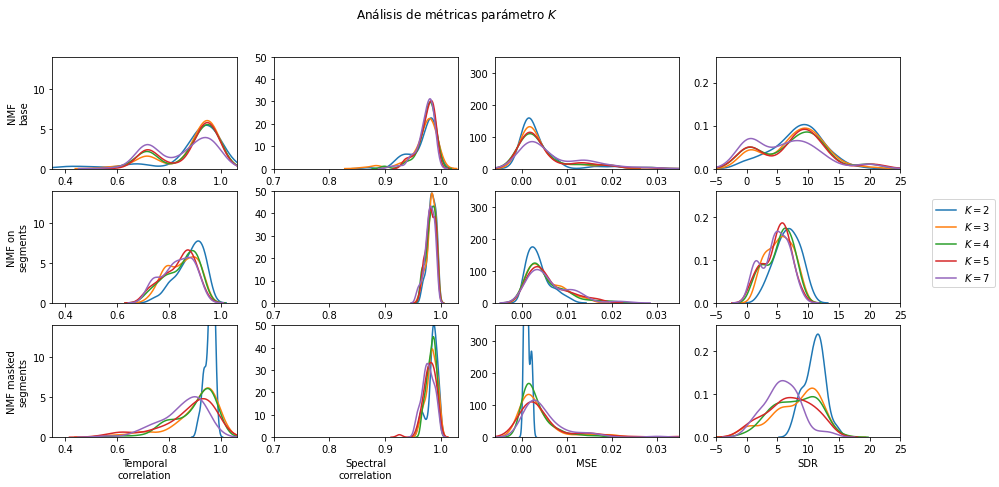

In [54]:
interest_parameter = 'n_components'
N_list = [1024]
ncomps_list = [2,3,4,5,7]

temp_all, spec_all, mse_all, sdr_all = \
        get_results_filtered(N_list=N_list, ncomps_list=ncomps_list, 
                             interest_parameter=interest_parameter, nmf_method='to_all')
temp_seg, spec_seg, mse_seg, sdr_seg = \
        get_results_filtered(N_list=N_list, ncomps_list=ncomps_list, 
                             interest_parameter=interest_parameter, nmf_method='on_segments')
temp_mask, spec_mask, mse_mask, sdr_mask = \
        get_results_filtered(N_list=N_list, ncomps_list=ncomps_list, 
                             interest_parameter=interest_parameter, nmf_method='masked_segments')

if interest_parameter == 'beta':
    density_plots_beta_nofill()

elif interest_parameter == 'n_components':
    density_plots_comps_nofill()
    
elif interest_parameter == 'noverlap':
    density_plots_nov_nofill()
    
elif interest_parameter == 'N':
    density_plots_N_nofill()